# Comprehensive Wrapper Functions Demo

This notebook demonstrates and tests all the existing wrapper functions from the autoencoder_lib package:

1. **Data Generation Wrapper** - Generate datasets with visualization
2. **Data Visualization Wrapper** - t-SNE projection and dataset analysis  
3. **Training Wrapper** - Systematic exploration across multiple architectures and latent spaces

## Objectives

- Test all existing wrapper functions for correctness
- Identify any bugs or inconsistencies  
- Validate integration between modules
- Ensure reproducibility and proper error handling
- Generate comprehensive results for multiple configurations

This will serve as our validation before implementing the results loading wrapper.

In [1]:
# Import necessary libraries and modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings('ignore')

# Import autoencoder_lib wrapper functions
from autoencoder_lib.data import generate_dataset, visualize_dataset
from autoencoder_lib.experiment import (
    run_single_experiment, 
    run_systematic_experiments,
    run_latent_analysis_experiment,
    run_optuna_experiment_optimization
)
from autoencoder_lib.models import MODEL_ARCHITECTURES
from autoencoder_lib.utils import set_seed

# Set up environment
print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Current working directory: {os.getcwd()}")

# Set global seed for reproducibility
set_seed(42)
#print("Global seed set to 42 for reproducibility")

Python version: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
PyTorch version: 2.7.0+cpu
CUDA available: False
Current working directory: c:\PycharmProjects\AutoEncoder_Experimentation
Random seed set to 42 for reproducibility


## 1. Data Generation Wrapper Testing

First, let's test the data generation wrapper with different dataset configurations.

=== Testing Data Generation Wrapper ===
Generating dataset with config: {'dataset_type': 'layered_geological', 'image_size': 64, 'num_samples_per_class': 100, 'output_dir': 'demo_wrapper_test_dataset', 'random_seed': 42, 'visualize': True, 'force_regenerate': True, 'create_train_test_split': True}


Generating variable_layers: 100%|██████████| 100/100 [00:00<00:00, 1081.62it/s]


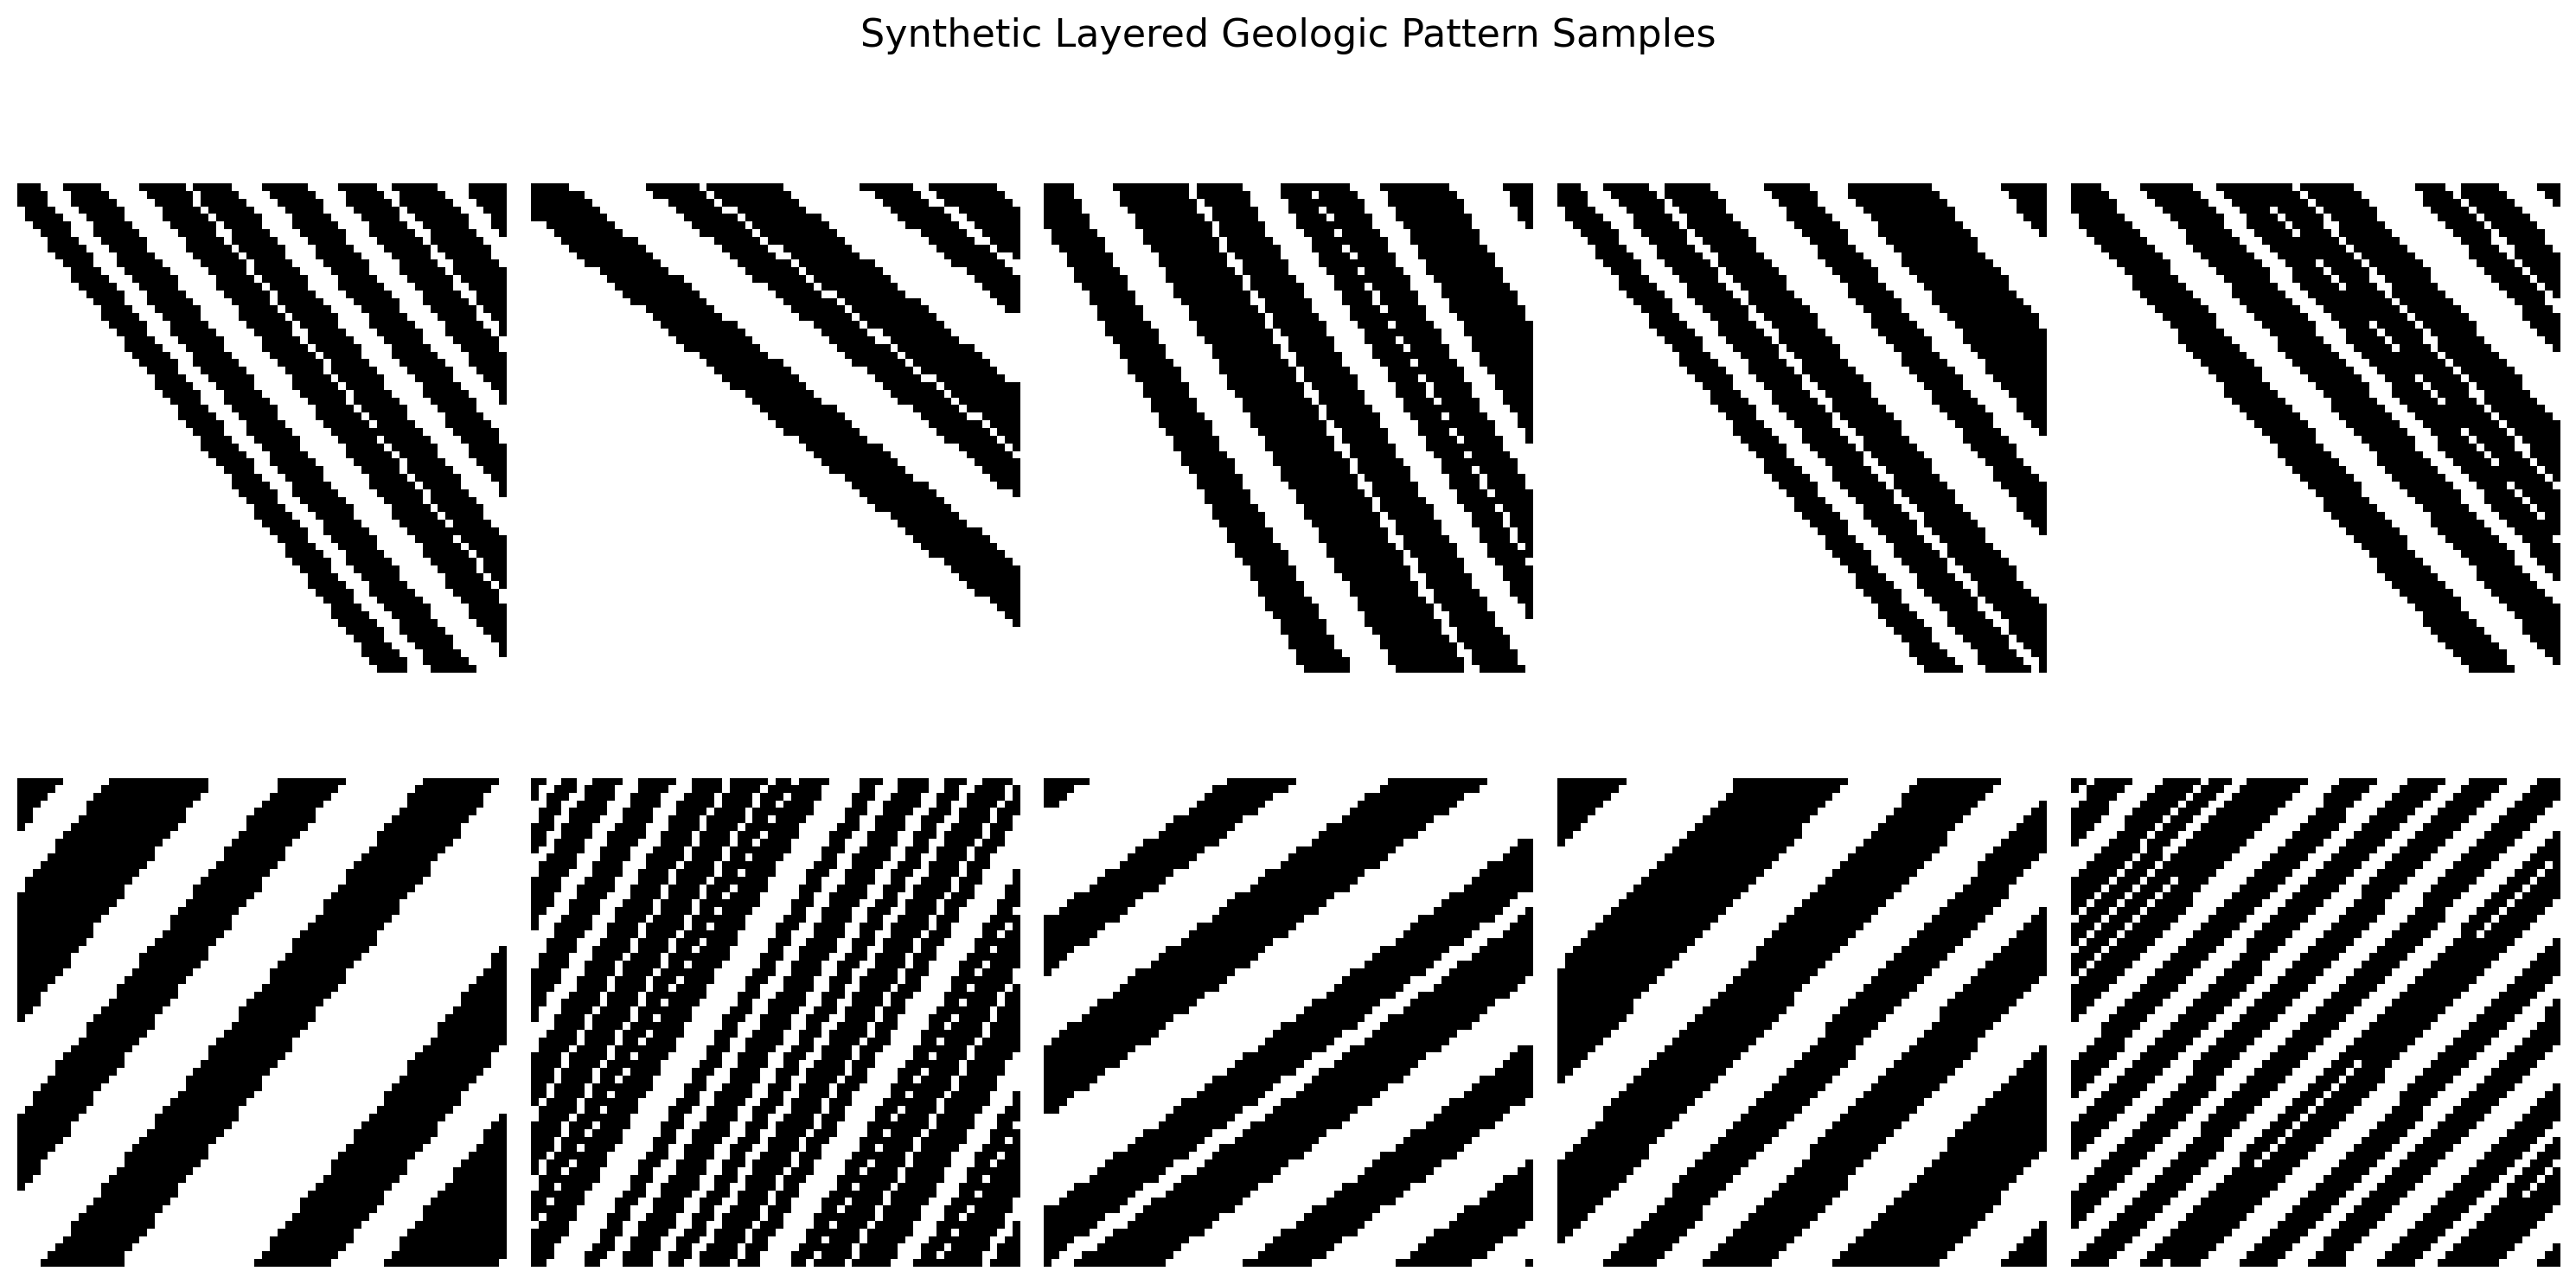


Dataset Statistics:
Total samples: 200
Number of classes: 2
Class distribution: {'consistent_layers': 100, 'variable_layers': 100}
Image size: 64x64

Train/Test Split Created:
Split seed: 42
Train samples: 140 (70.0%)
Test samples: 40 (20.0%)
Validation samples: 20 (10.0%)
✅ Dataset generation successful!
Dataset info keys: ['filenames', 'labels', 'label_names', 'params', 'split_info']
✅ Dataset directory created at: demo_wrapper_test_dataset
  - consistent_layers: 100 images
  - dataset_info.npy: metadata file
  - variable_layers: 100 images


In [2]:
# Test 1: Generate basic geological dataset
print("=== Testing Data Generation Wrapper ===")

# Configuration for demo dataset
dataset_config = {
    'dataset_type': 'layered_geological',
    'image_size': 64,
    'num_samples_per_class': 100,  # Reduced for faster testing
    'output_dir': 'demo_wrapper_test_dataset',
    'random_seed': 42,
    'visualize': True,
    'force_regenerate': True,  # Always regenerate for testing
    'create_train_test_split': True
}

print(f"Generating dataset with config: {dataset_config}")

try:
    # Generate dataset using wrapper function
    dataset_info = generate_dataset(**dataset_config)
    
    print("✅ Dataset generation successful!")
    print(f"Dataset info keys: {list(dataset_info.keys()) if dataset_info else 'None'}")
    
    # Verify dataset was created
    if os.path.exists(dataset_config['output_dir']):
        print(f"✅ Dataset directory created at: {dataset_config['output_dir']}")
        
        # Check directory structure
        for class_dir in os.listdir(dataset_config['output_dir']):
            class_path = os.path.join(dataset_config['output_dir'], class_dir)
            if os.path.isdir(class_path):
                num_images = len([f for f in os.listdir(class_path) if f.endswith('.png')])
                print(f"  - {class_dir}: {num_images} images")
            elif class_dir.endswith('.npy') or class_dir.endswith('.json'):
                print(f"  - {class_dir}: metadata file")
    else:
        print("❌ Dataset directory not found")
        
except Exception as e:
    print(f"❌ Error in dataset generation: {e}")
    import traceback
    traceback.print_exc()

## 2. Data Visualization Wrapper Testing

Now let's test the data visualization wrapper with t-SNE analysis.

=== Testing Data Visualization Wrapper ===
Running dataset visualization with dataset_info from previous step


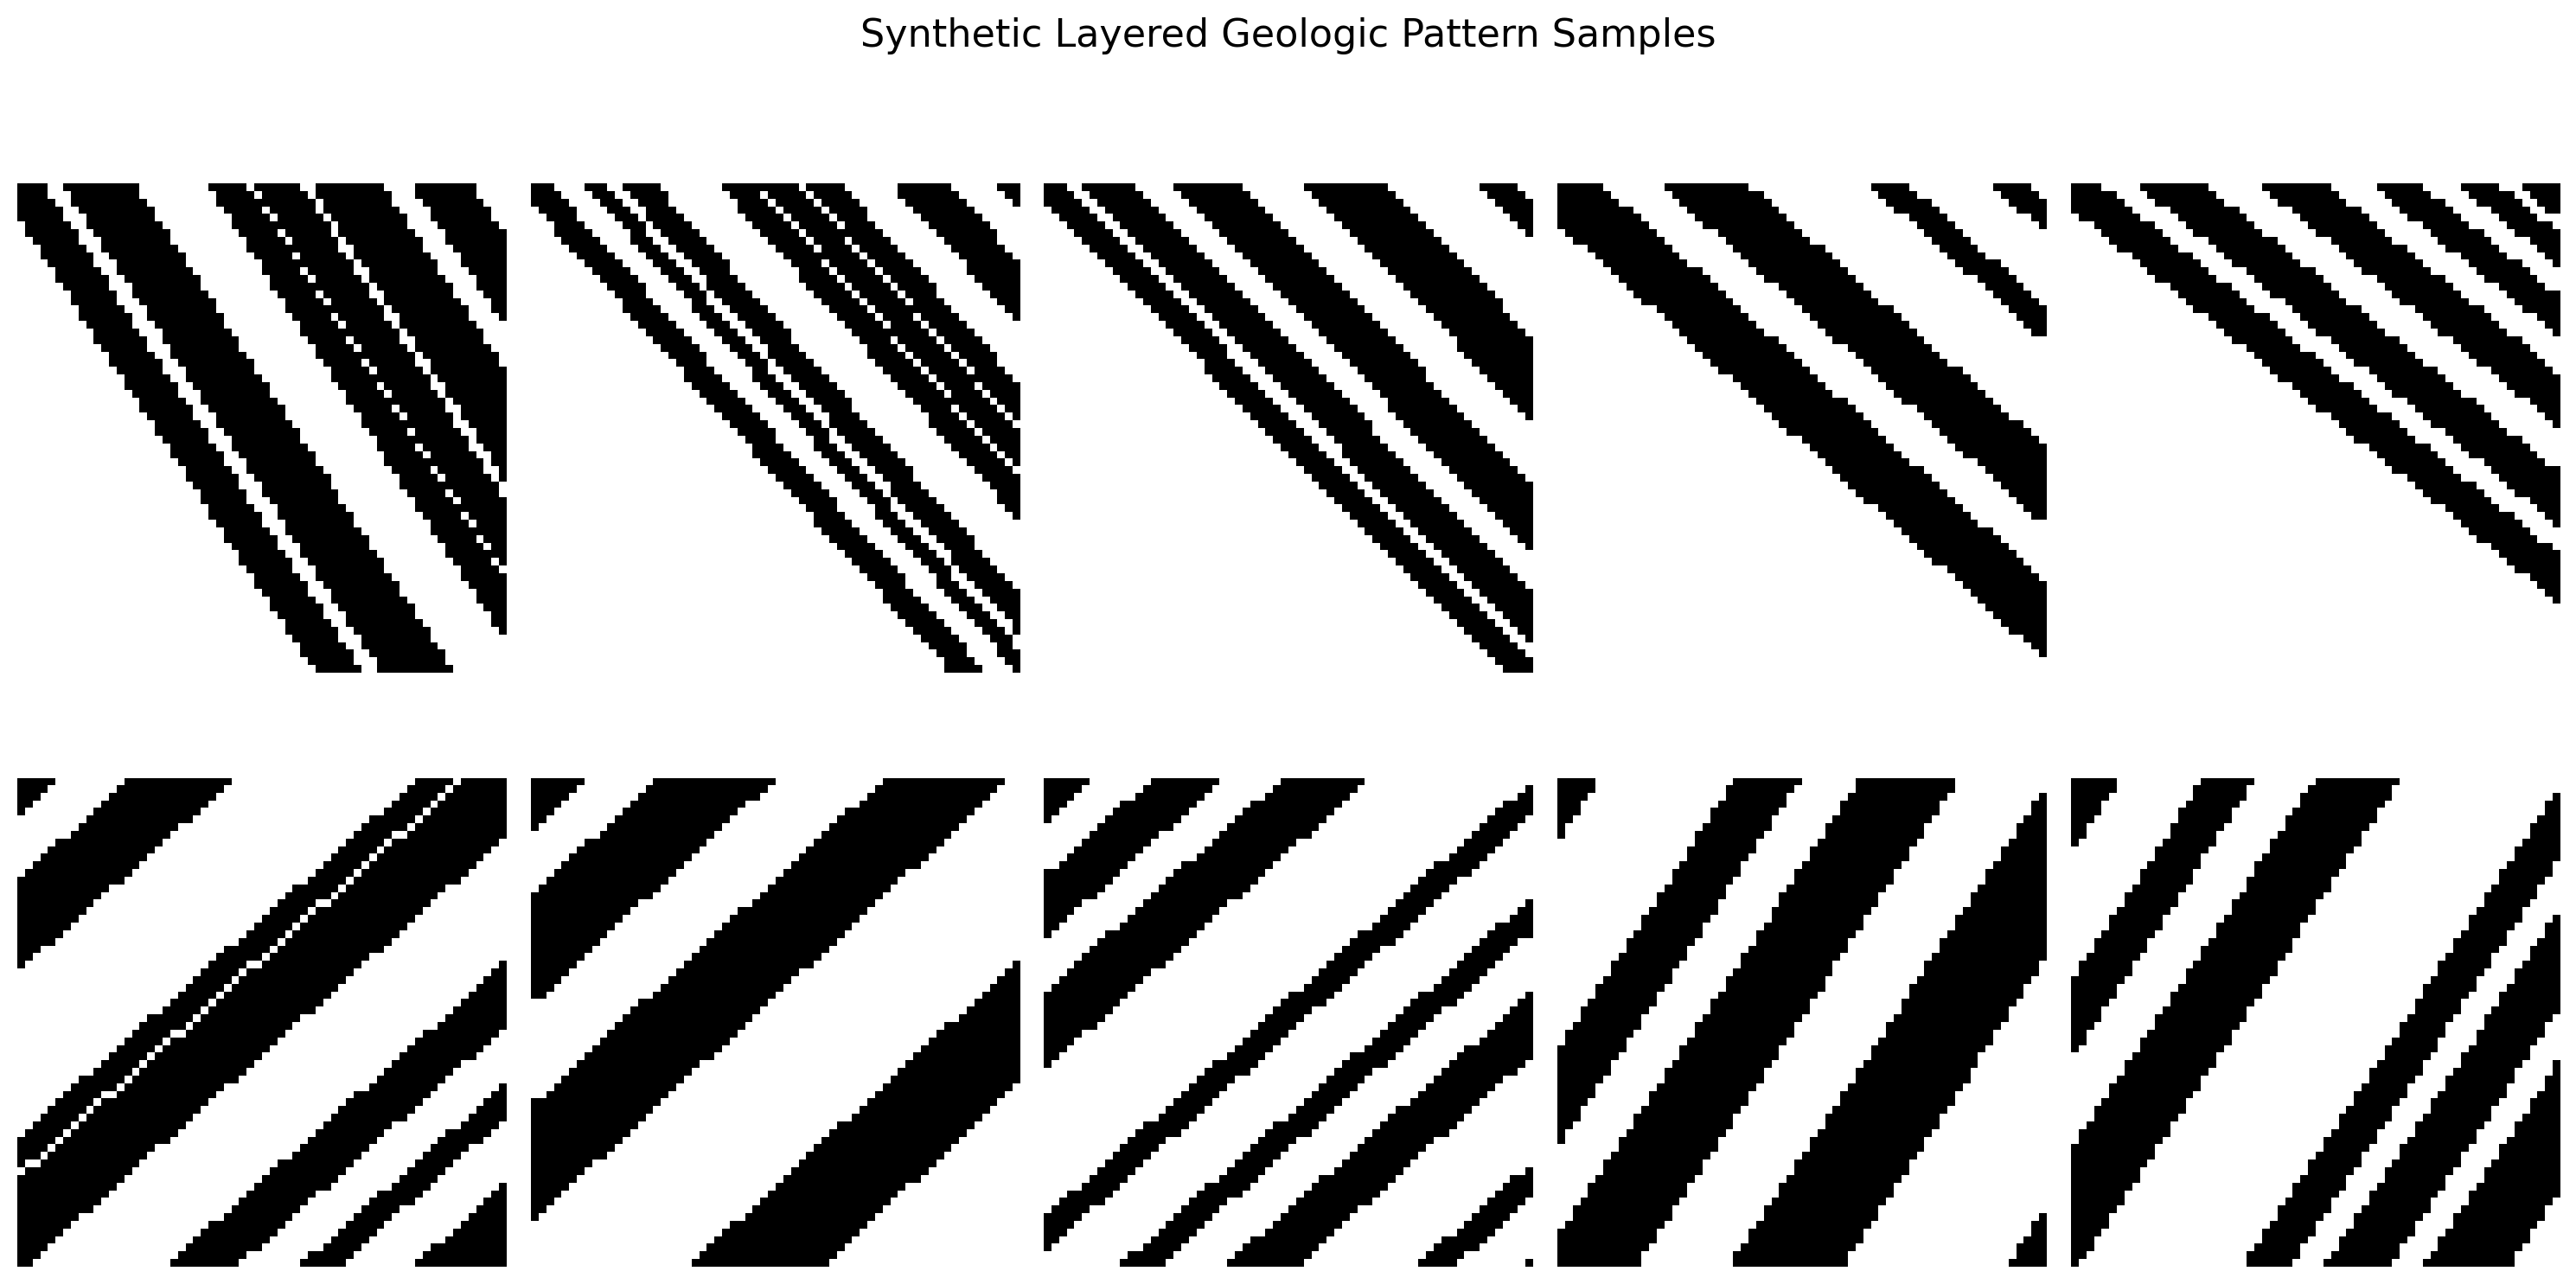

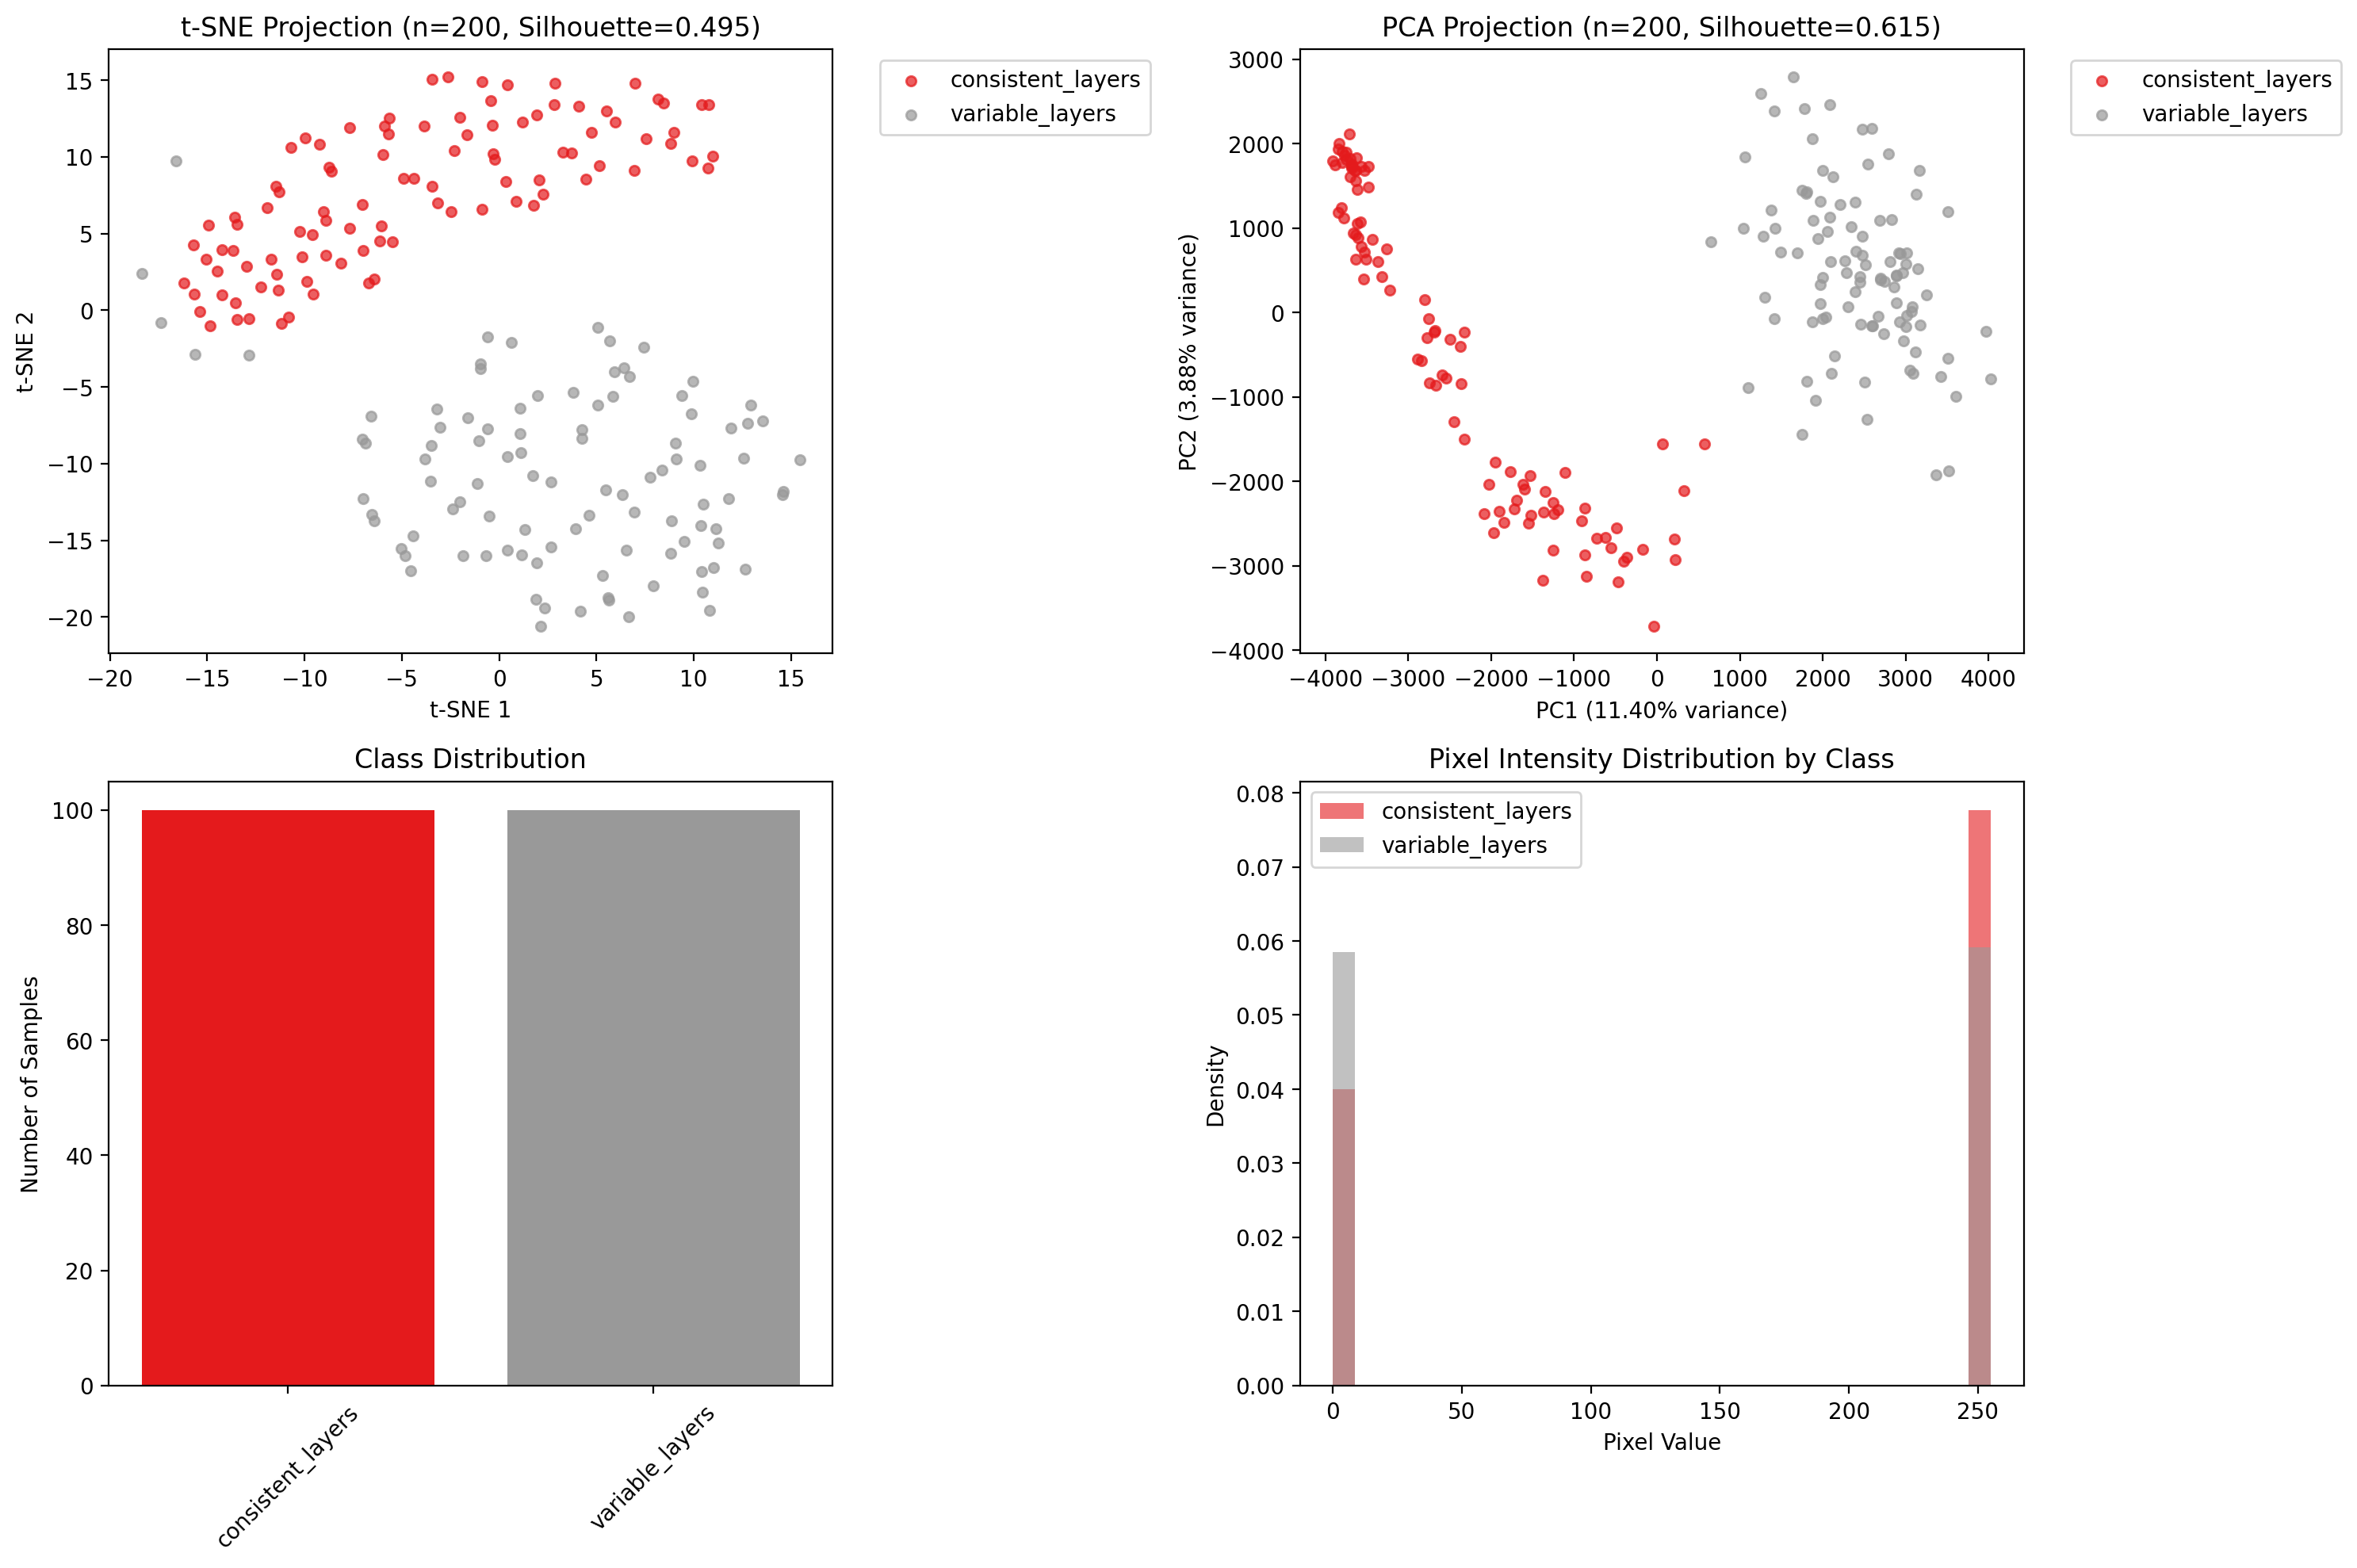


DATASET ANALYSIS SUMMARY
Dataset Type: layered_geological
Total Samples: 200
Number of Classes: 2
Image Size: 64x64
Class Distribution: {'consistent_layers': 100, 'variable_layers': 100}
Pixel Value Range: [0.000, 255.000]
Mean Pixel Value: 148.254
Std Pixel Value: 125.800
PCA Explained Variance: [0.11400724 0.03879372]
t-SNE Silhouette Score: 0.495
PCA Silhouette Score: 0.615
✅ Dataset visualization successful!
Visualization result keys: ['tsne_projection', 'pca_projection', 'class_distribution', 'statistics', 'pca_explained_variance', 'silhouette_scores', 'pixel_statistics']


In [3]:
# Test 2: Visualize dataset with t-SNE
print("=== Testing Data Visualization Wrapper ===")

try:
    # Test dataset visualization wrapper
    # Use the dataset_info from the previous generation step
    if 'dataset_info' in locals():
        print(f"Running dataset visualization with dataset_info from previous step")
        
        # Run visualization wrapper using dataset_info directly
        viz_result = visualize_dataset(
            dataset_info=dataset_info,
            tsne_perplexity=30,
            tsne_random_state=42,
            max_samples_for_tsne=500,
            show_statistics=True,
            figure_size=(15, 10)
        )
        
        print("✅ Dataset visualization successful!")
        print(f"Visualization result keys: {list(viz_result.keys()) if viz_result else 'None'}")
        
    else:
        # Fallback: try to visualize using dataset path
        print(f"Running dataset visualization using dataset path: {dataset_config['output_dir']}")
        
        viz_result = visualize_dataset(
            dataset_path=dataset_config['output_dir'],
            dataset_type="auto",
            tsne_perplexity=30,
            tsne_random_state=42,
            max_samples_for_tsne=500,
            show_statistics=True,
            figure_size=(15, 10)
        )
        
        print("✅ Dataset visualization successful!")
        print(f"Visualization result keys: {list(viz_result.keys()) if viz_result else 'None'}")
        
except Exception as e:
    print(f"❌ Error in dataset visualization: {e}")
    import traceback
    traceback.print_exc()

## 3. Single Experiment Testing

Before running systematic experiments, let's test a single experiment to verify the training wrapper works correctly.

=== Testing Single Experiment Wrapper ===
Running single experiment with config:
  dataset_path: demo_wrapper_test_dataset
  architecture_name: simple_linear
  latent_dim: 16
  epochs: 3
  batch_size: 32
  learning_rate: 0.001
  output_dir: demo_single_experiment_results
  save_model: True
  random_seed: 42
  verbose: True

=== Running Single Experiment ===
Architecture: simple_linear, Latent Dim: 16
Random seed set to 42 for reproducibility
Loading dataset from: demo_wrapper_test_dataset
✅ Loaded existing dataset with 2 classes
  Classes: ['consistent_layers', 'variable_layers']
Creating simple_linear model...
Model created with 1,057,040 parameters
ExperimentRunner initialized - Device: cpu, Output: demo_single_experiment_results\simple_linear_latent16_20250604_173805
Starting training...
Training SimpleLinearAutoencoder for 3 epochs on cpu
Learning rate: 0.001
Selected visualization samples: 4 total (2 per class)
  consistent_layers: indices [0, 1]
  variable_layers: indices [20, 21

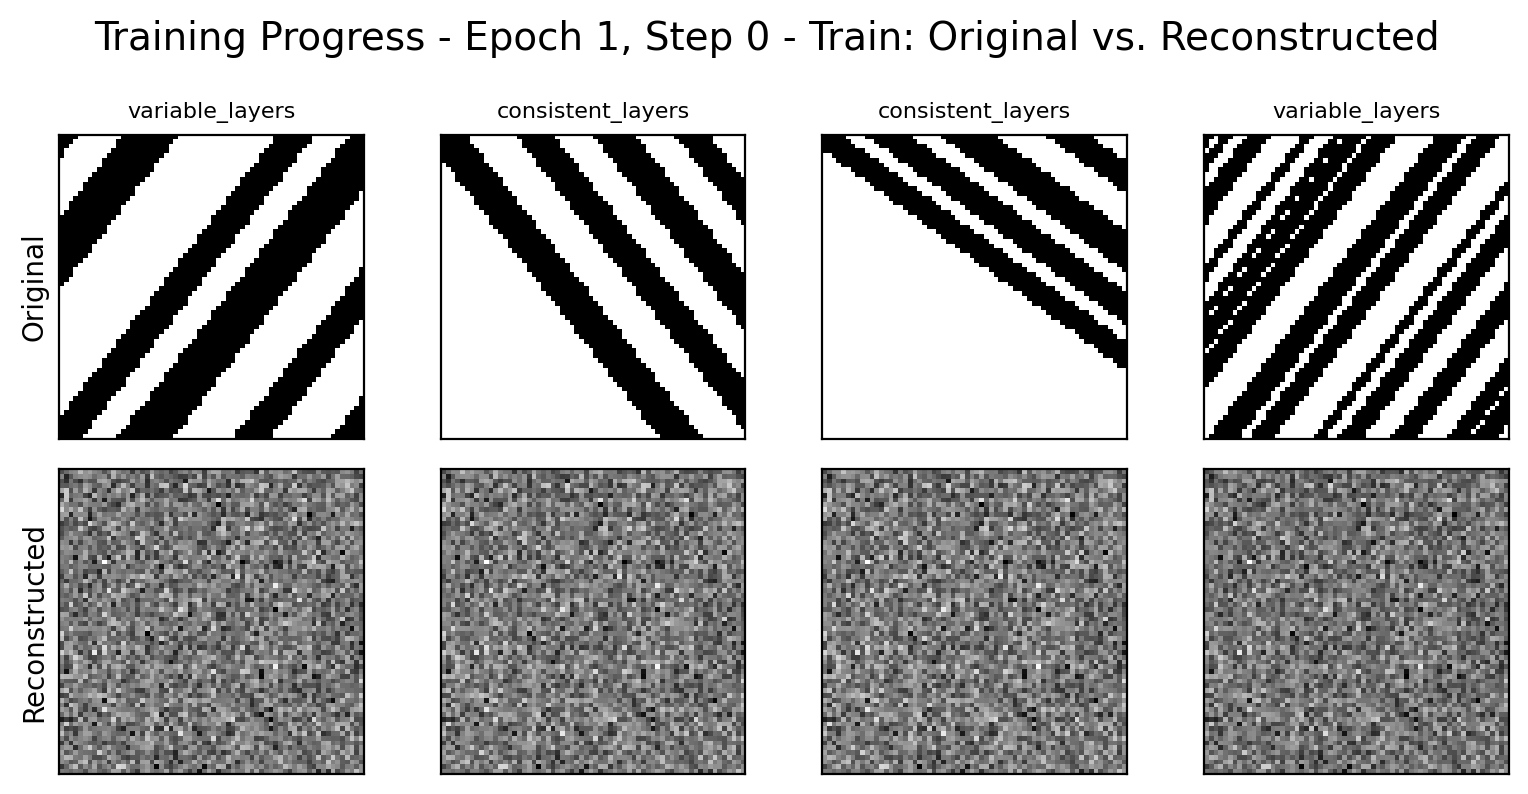

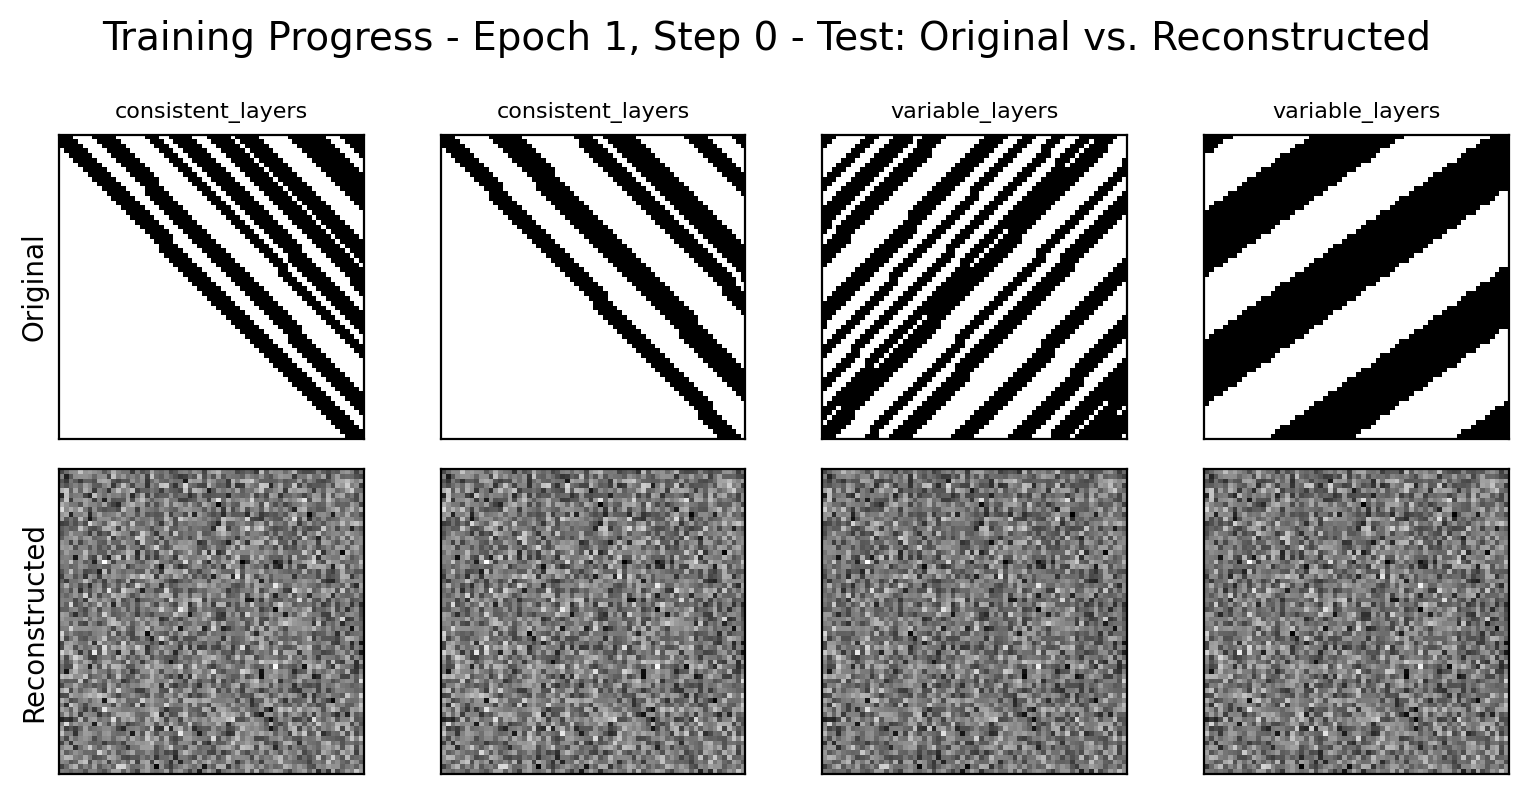

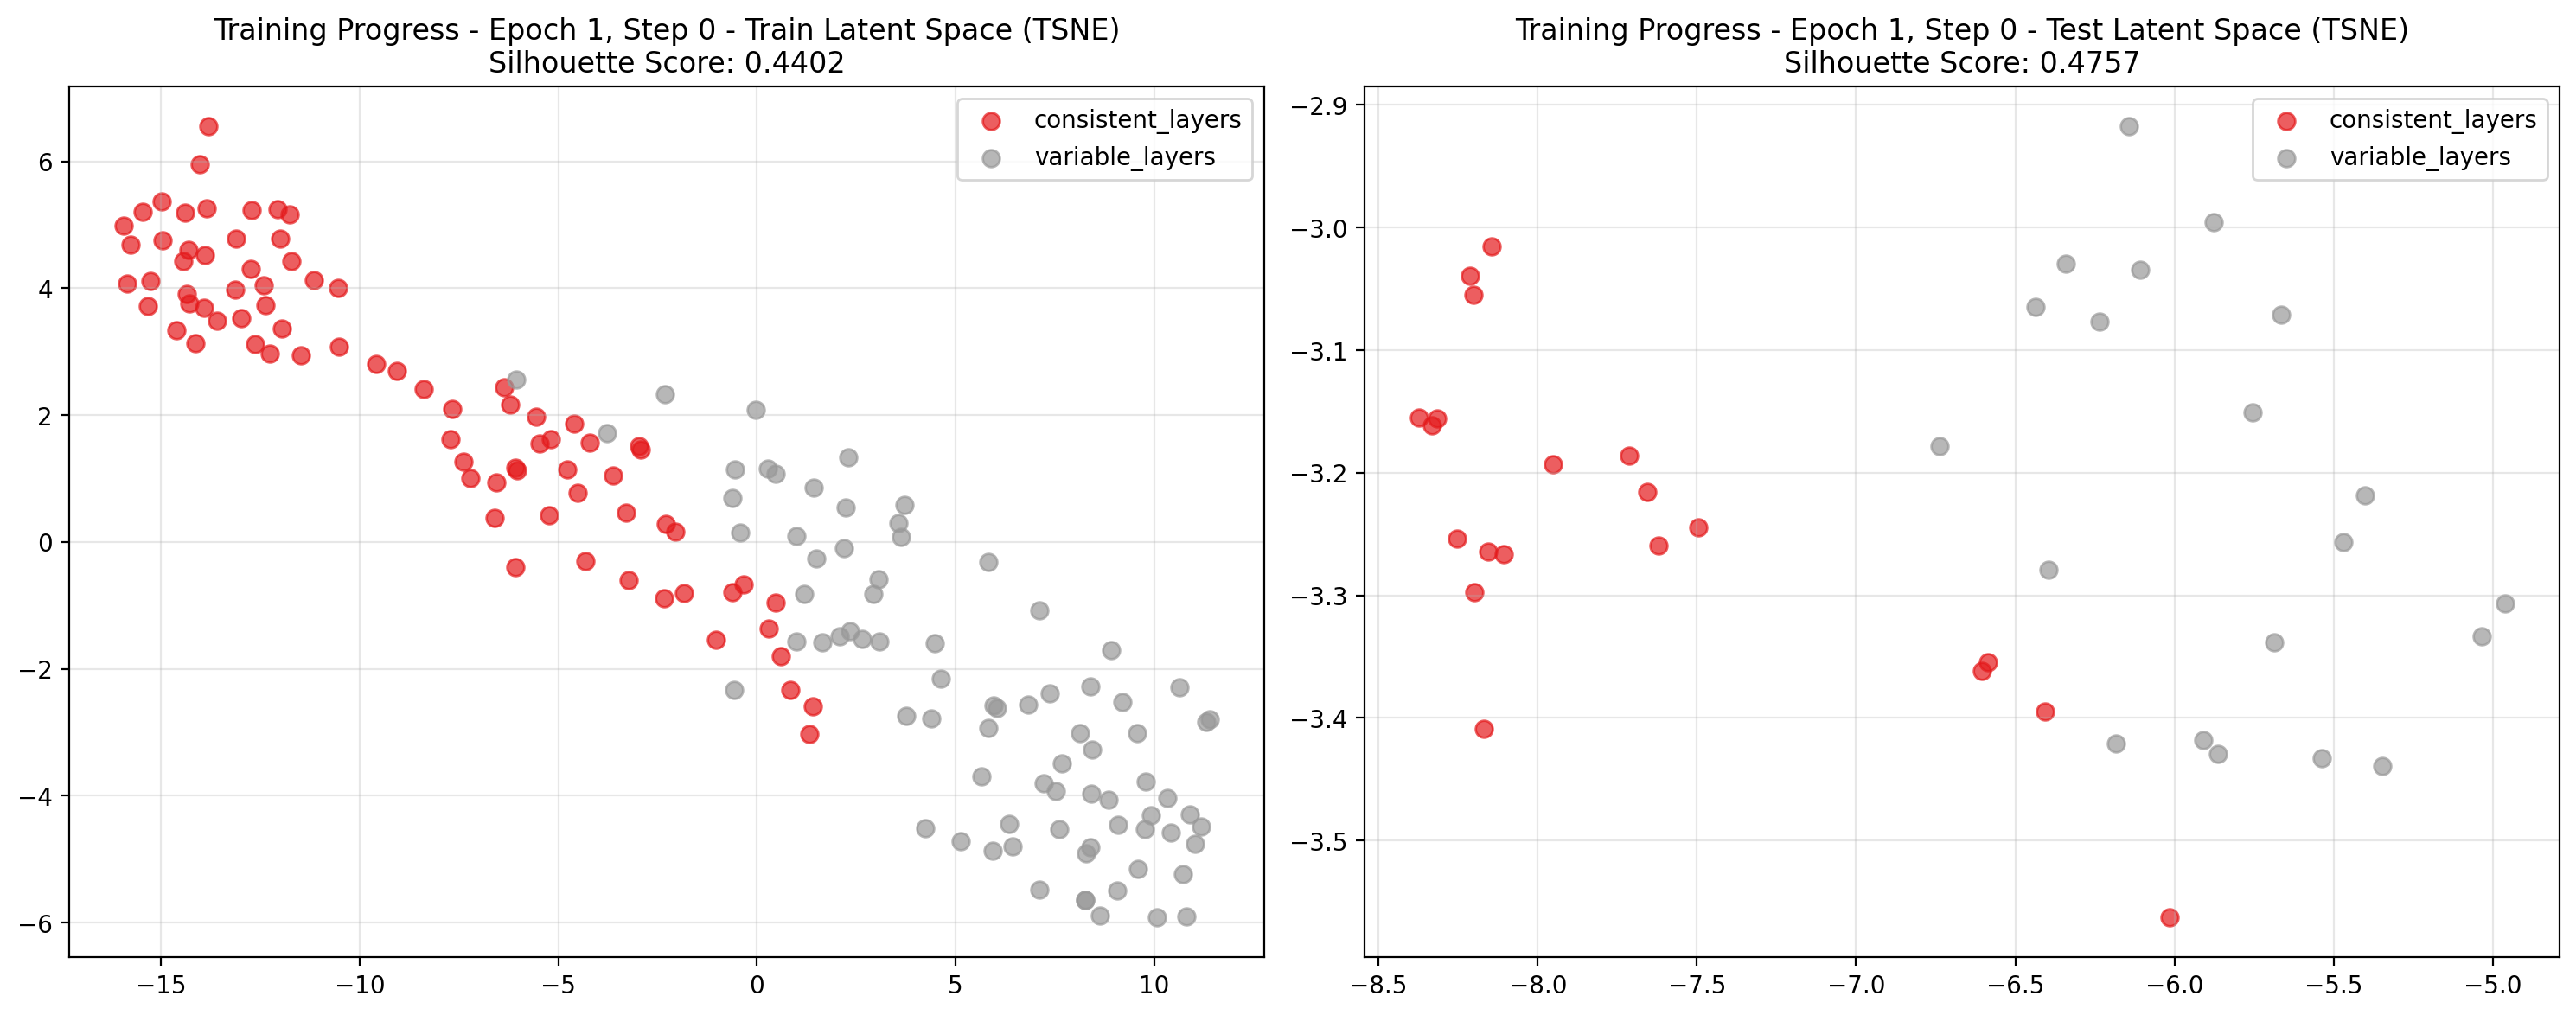

Epoch 1/3 completed | Train loss: 0.2503 | Test loss: 0.2468
Epoch: 2/3, Step: 0 | train loss: 0.2464 | test loss: 0.2452


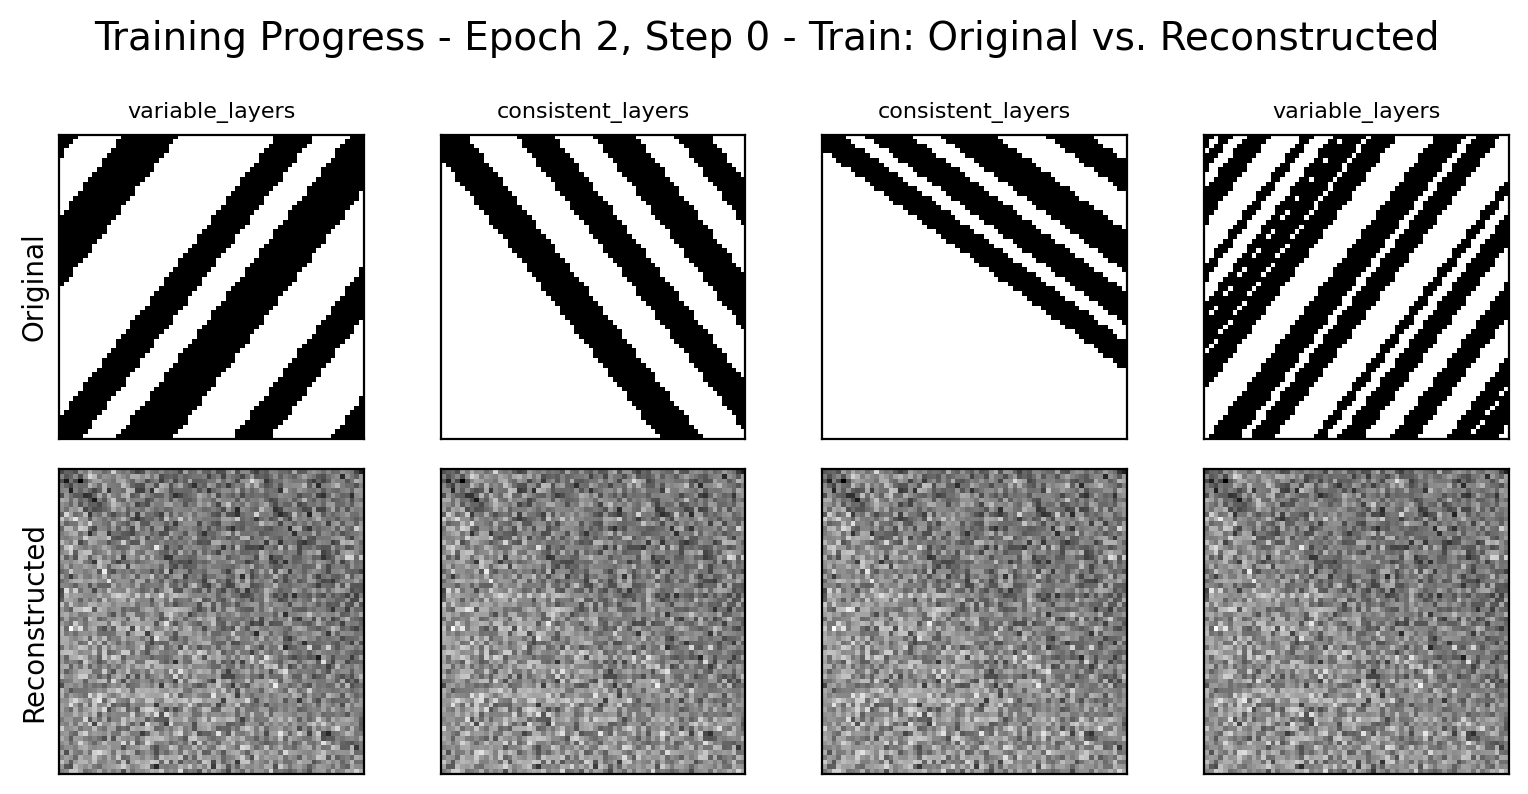

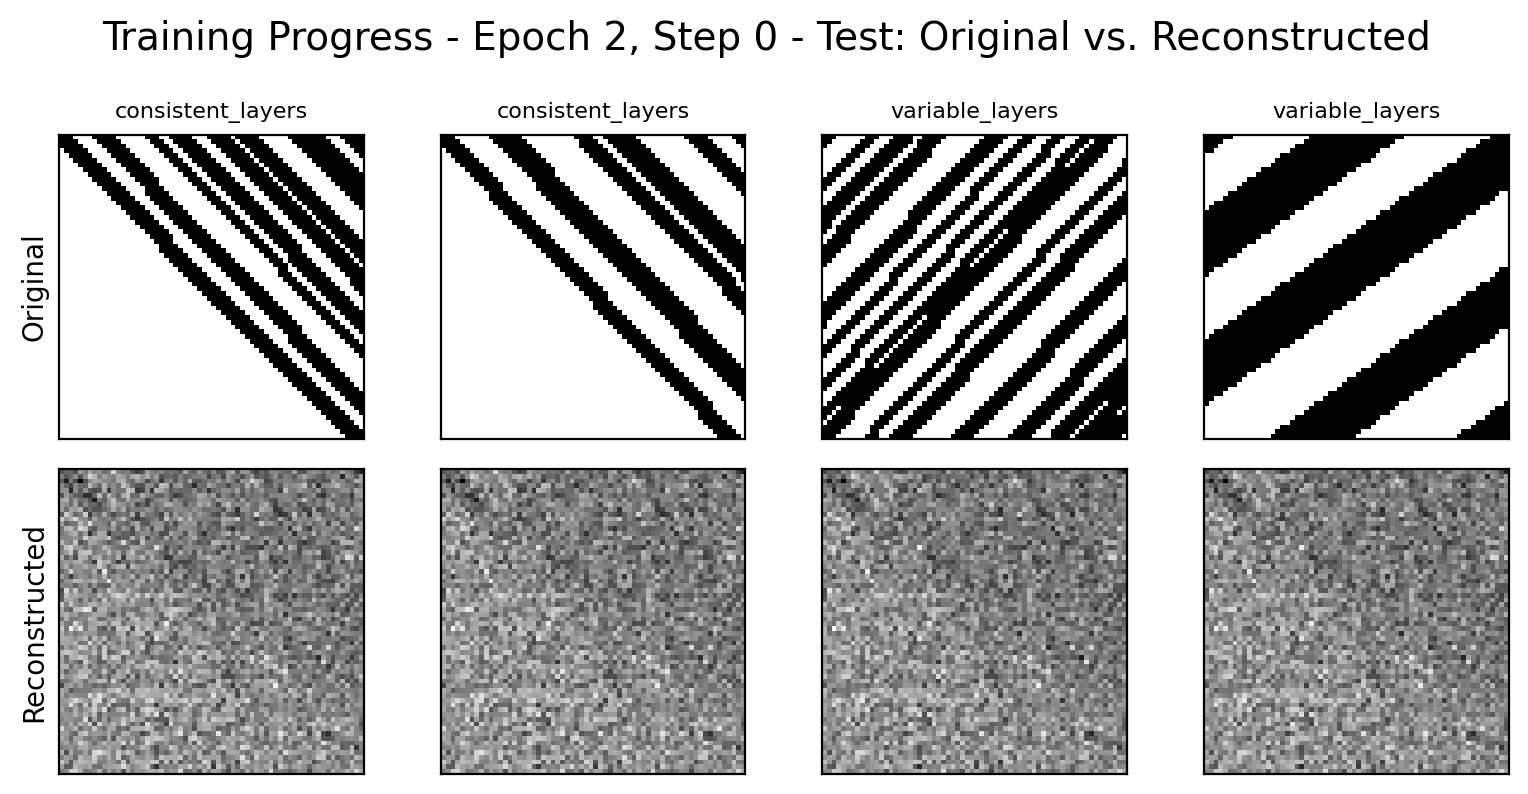

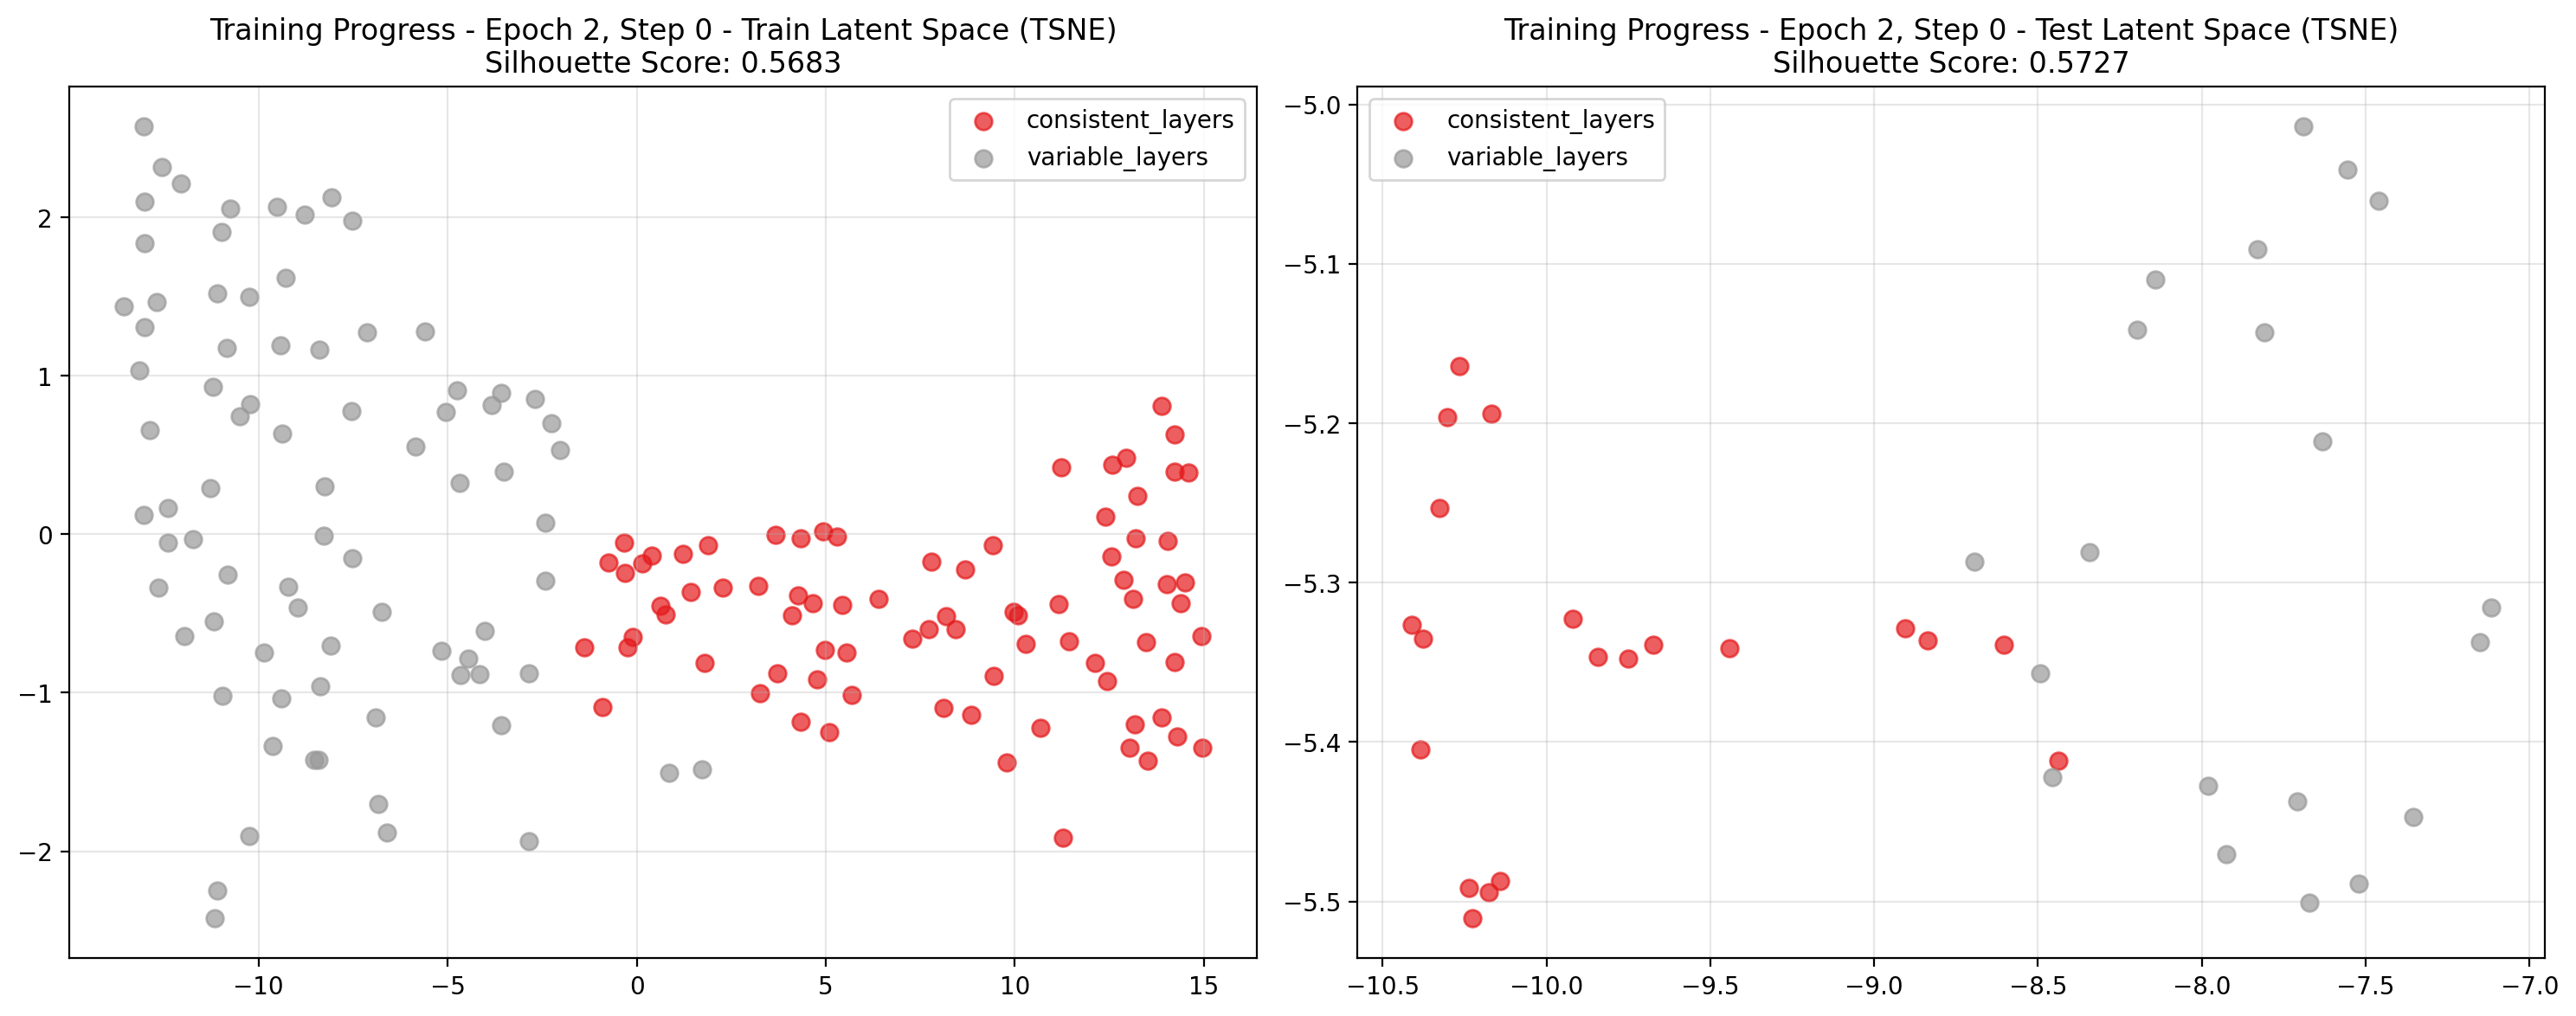

Epoch 2/3 completed | Train loss: 0.2432 | Test loss: 0.2355
Epoch: 3/3, Step: 0 | train loss: 0.2391 | test loss: 0.2329


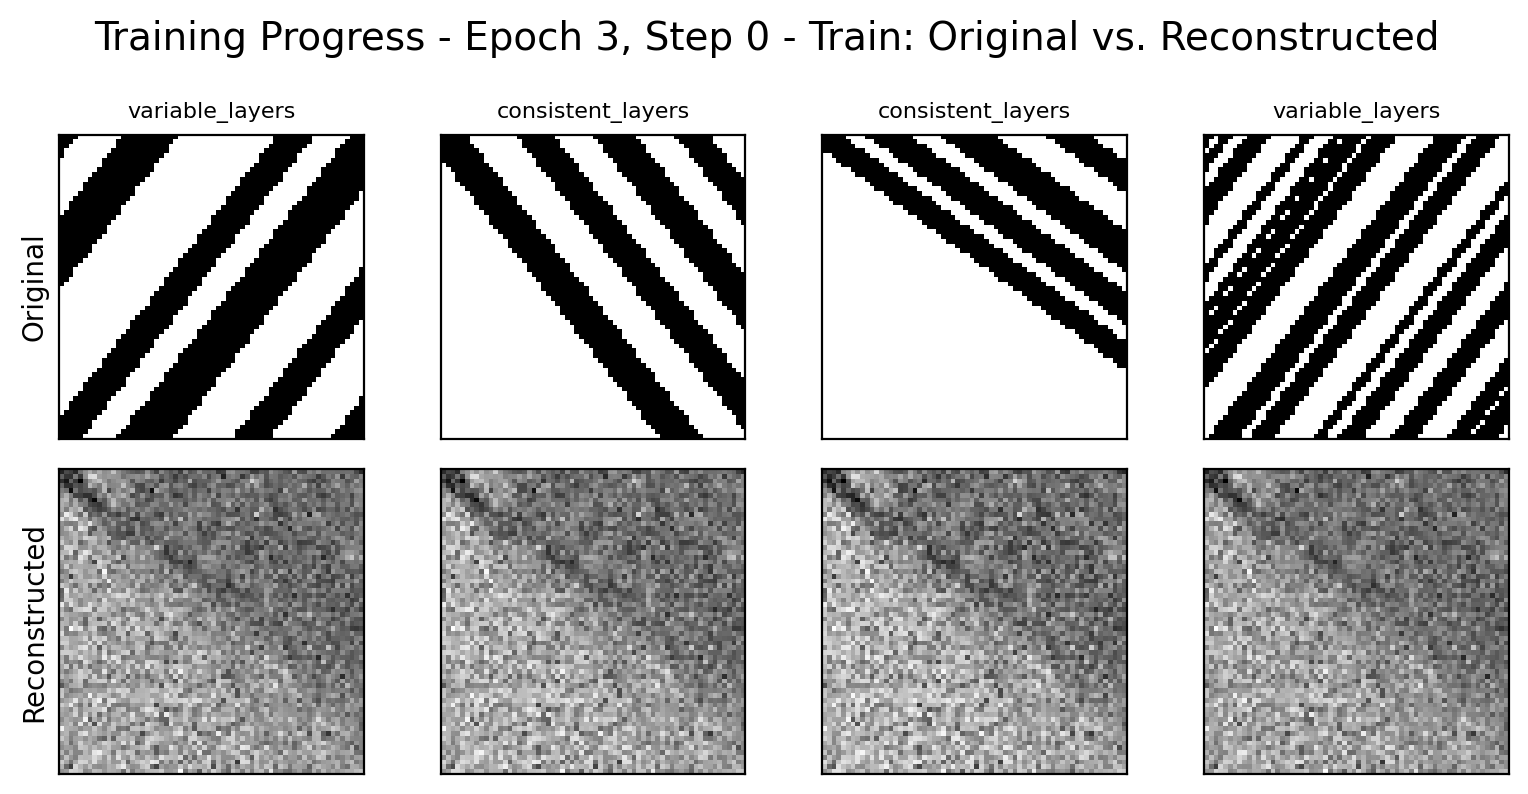

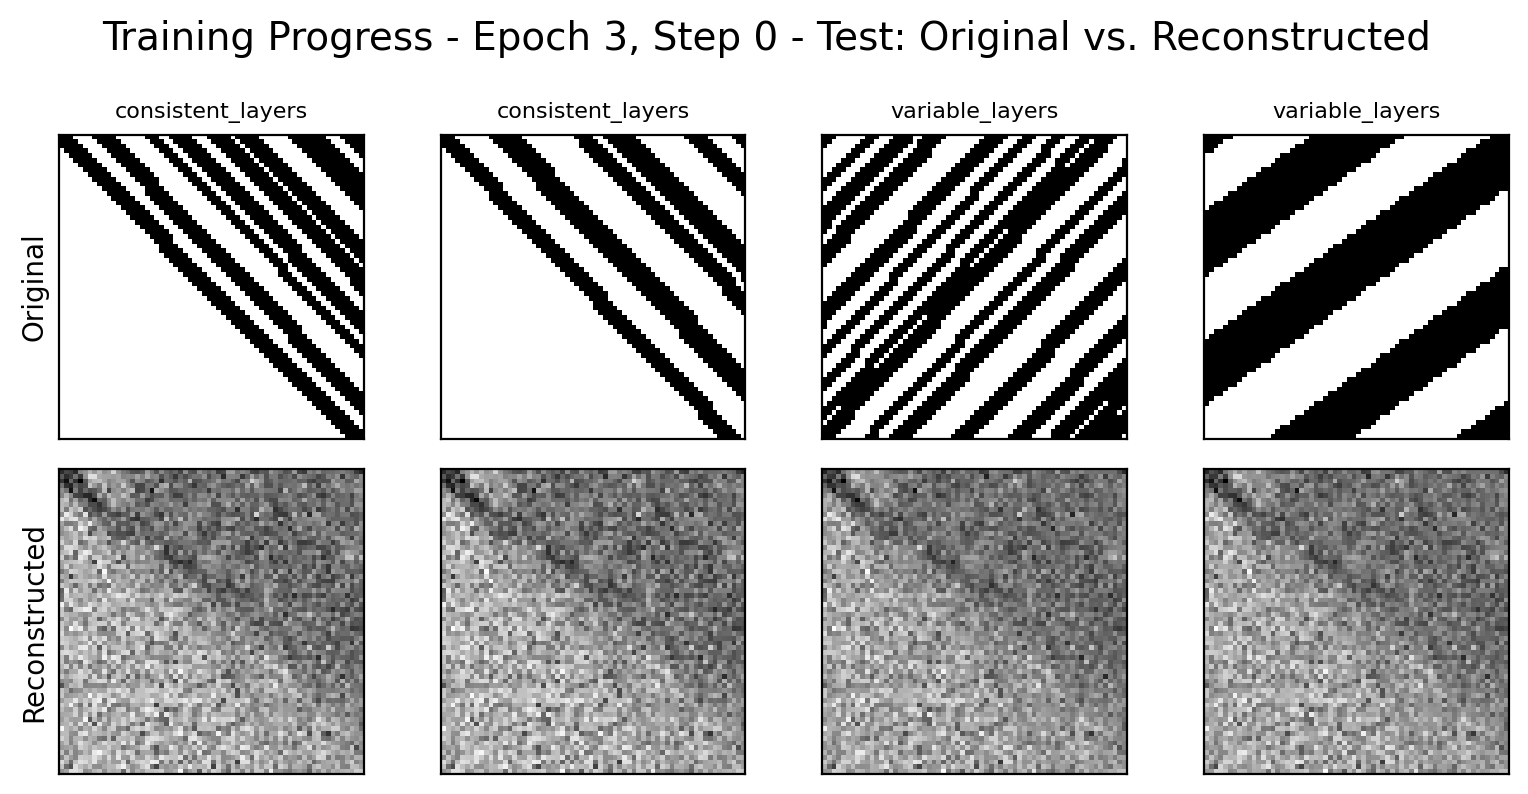

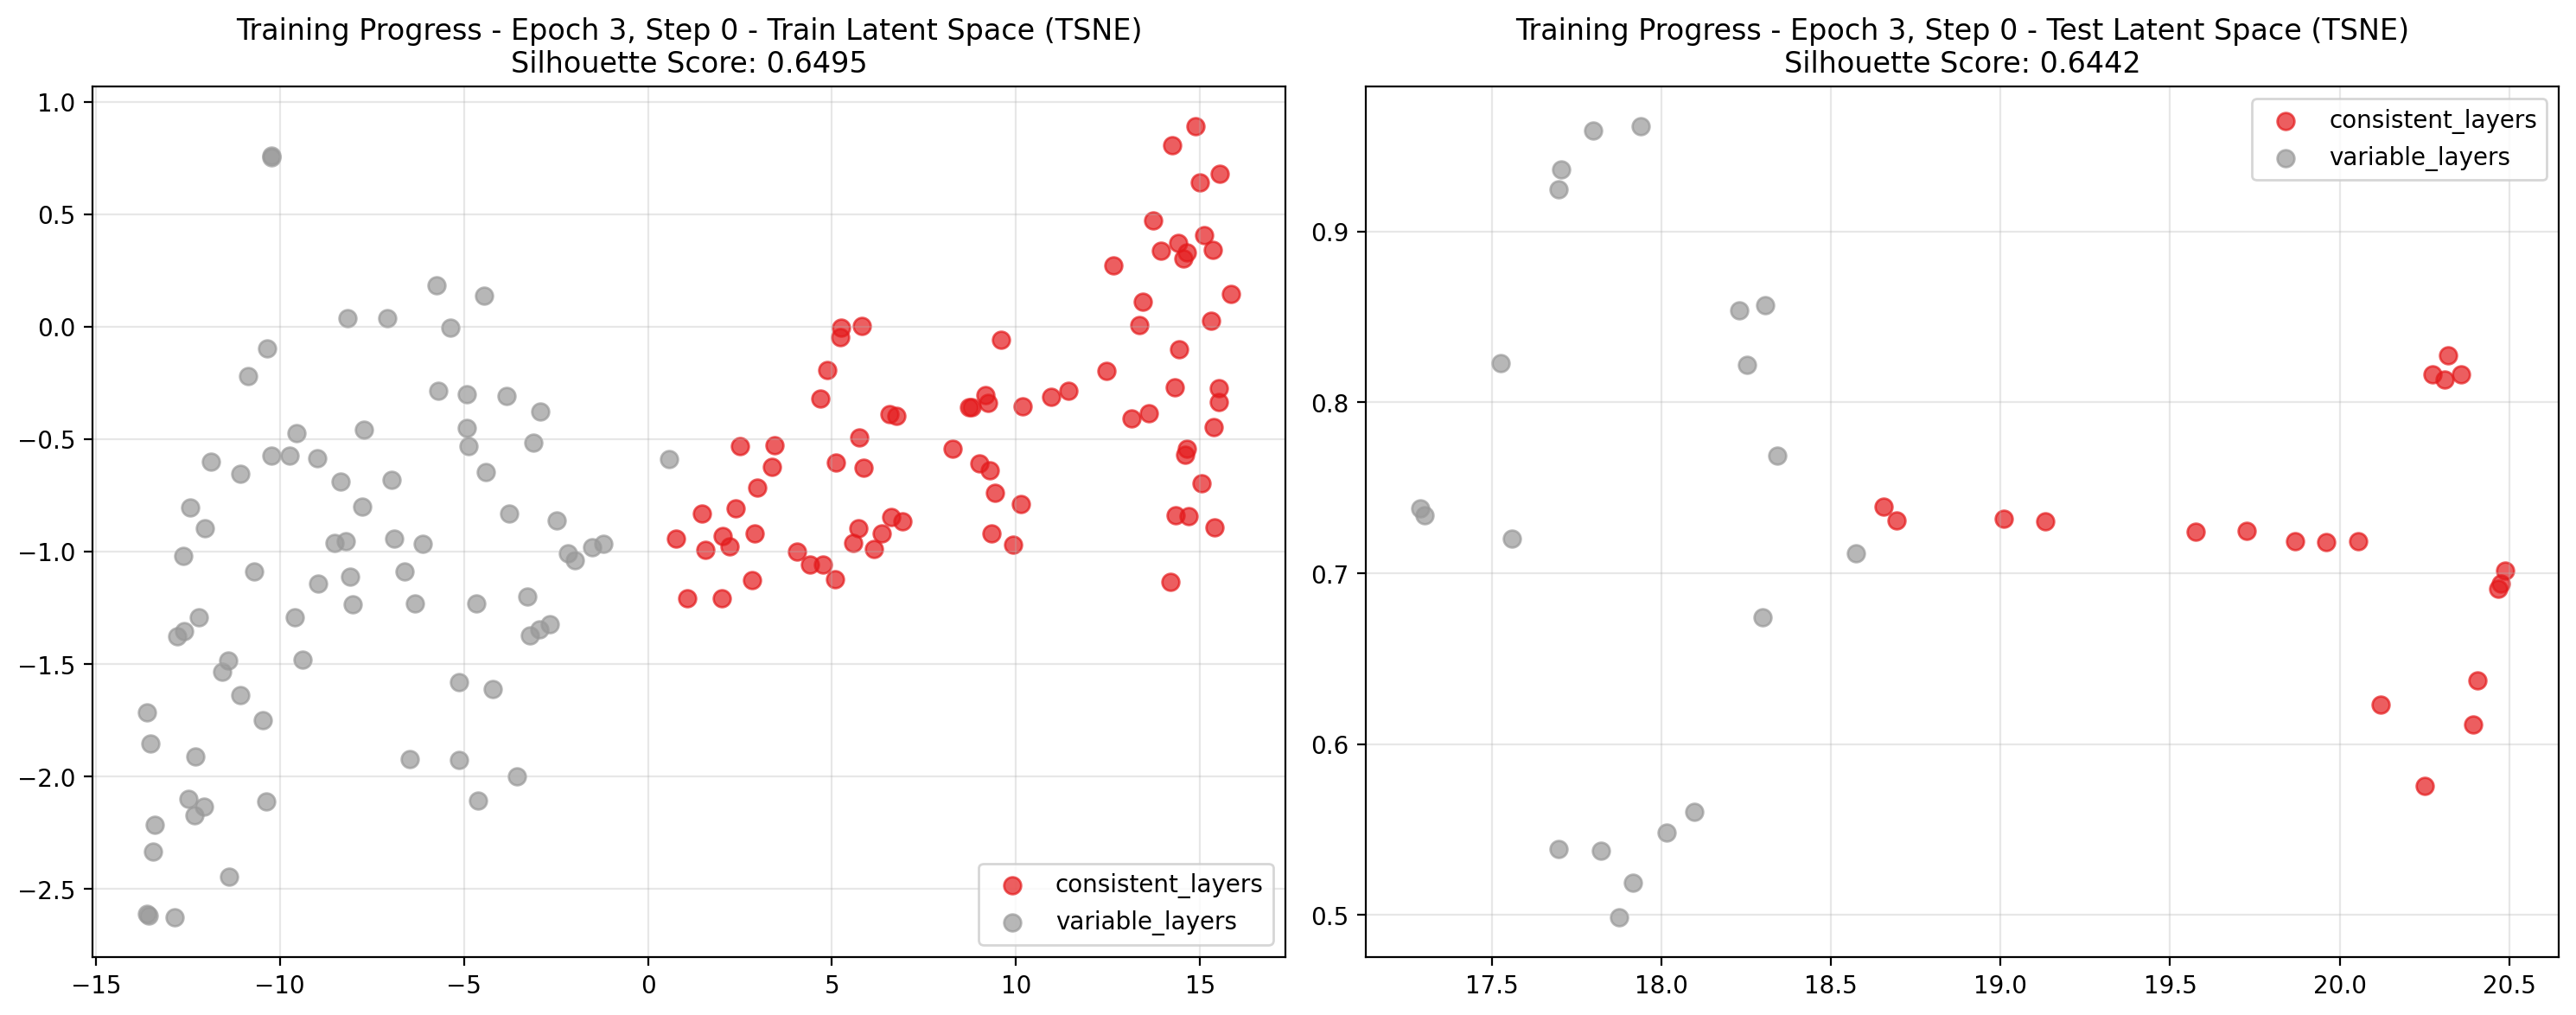

Performing final visualization at epoch 3/3, step 4
Epoch: 3/3, Step: 4 | train loss: 0.2171 | test loss: 0.2228
Epoch 3/3 completed | Train loss: 0.2304 | Test loss: 0.2228
Training completed in 5.43 seconds
Generating final latent space visualization and metrics

📊 FINAL VISUALIZATION GENERATION
Generating final reconstruction visualizations...


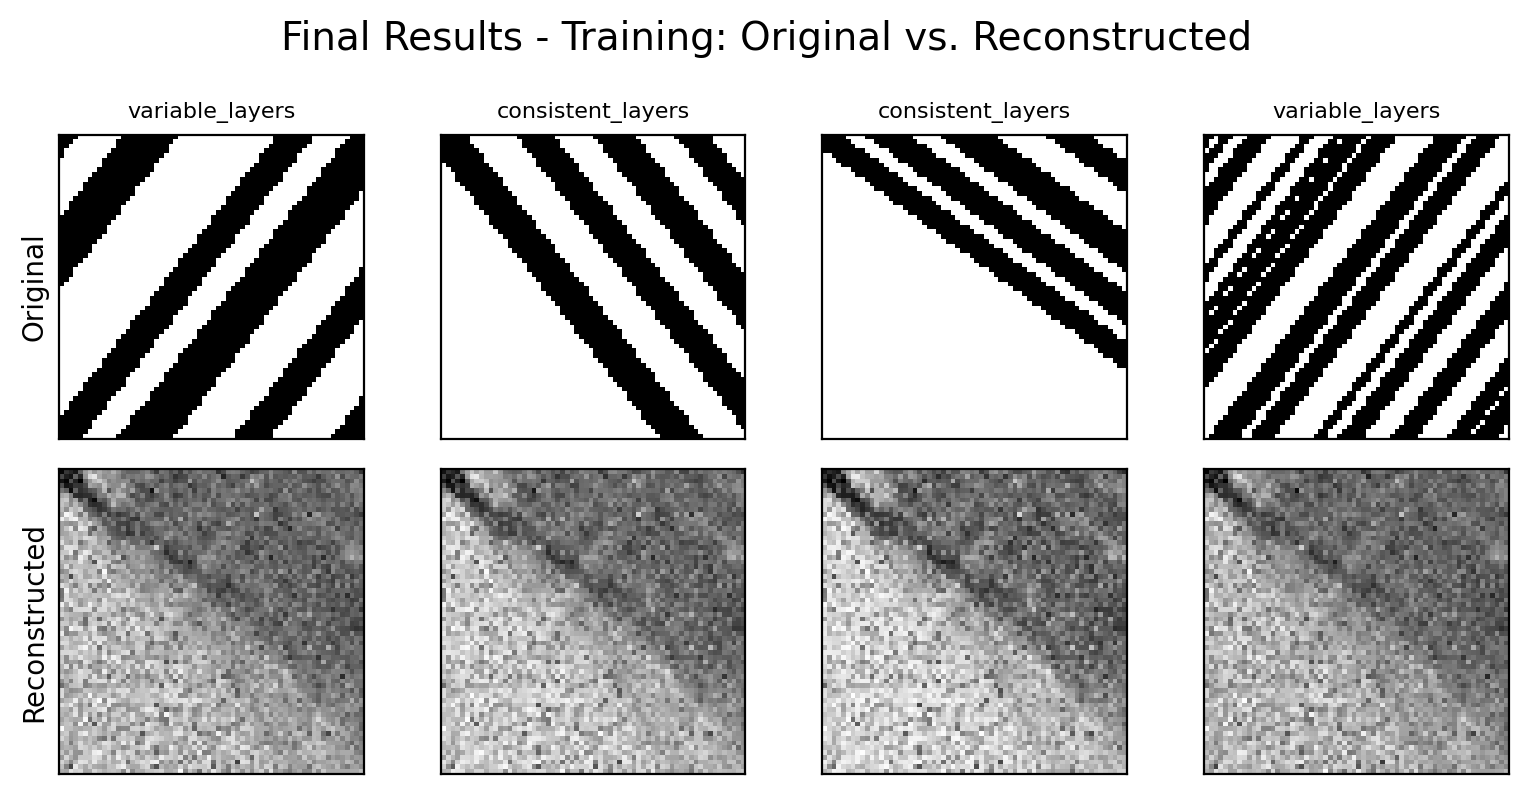

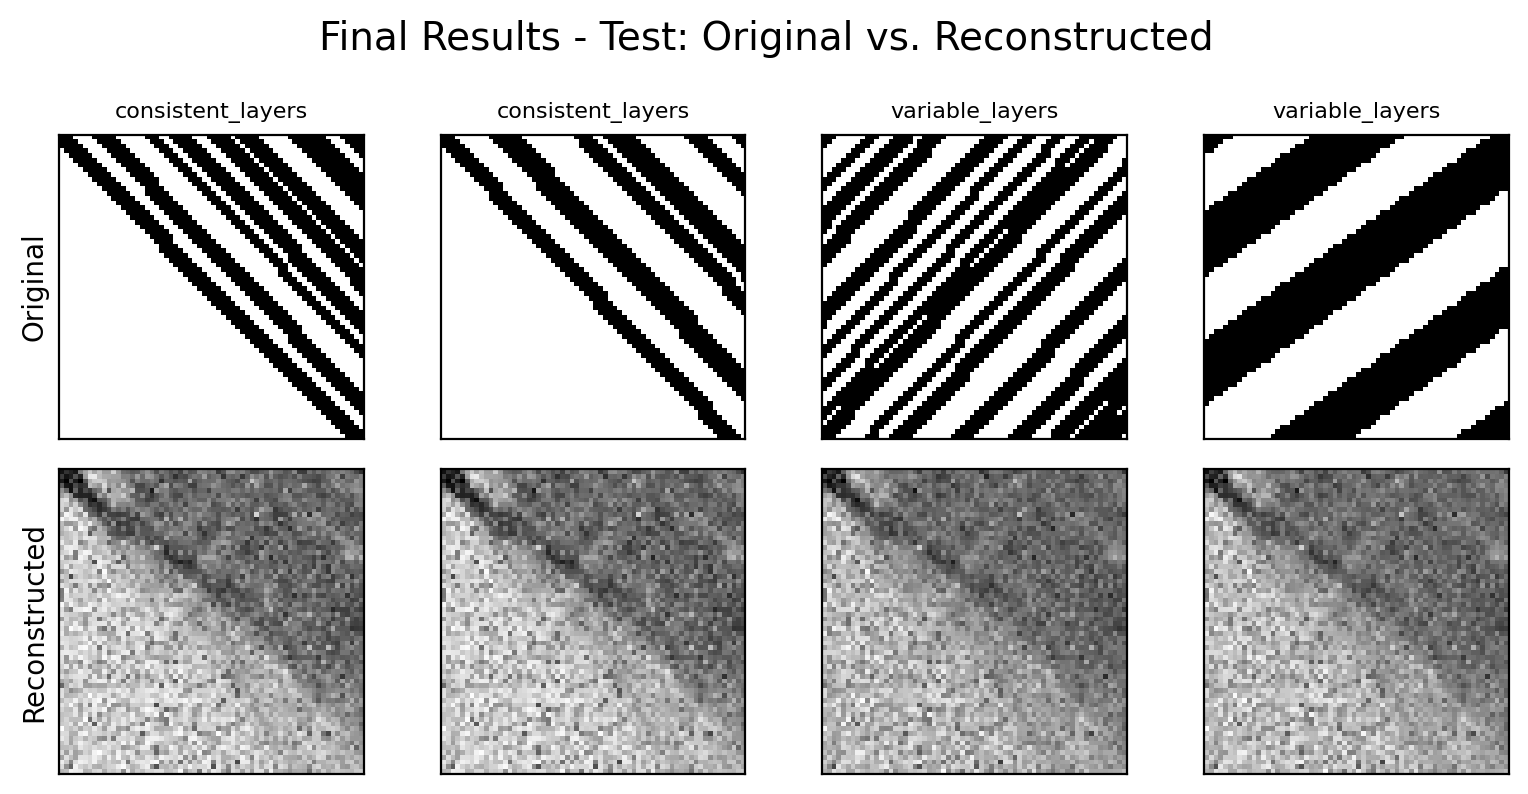

Generating final latent space analysis...


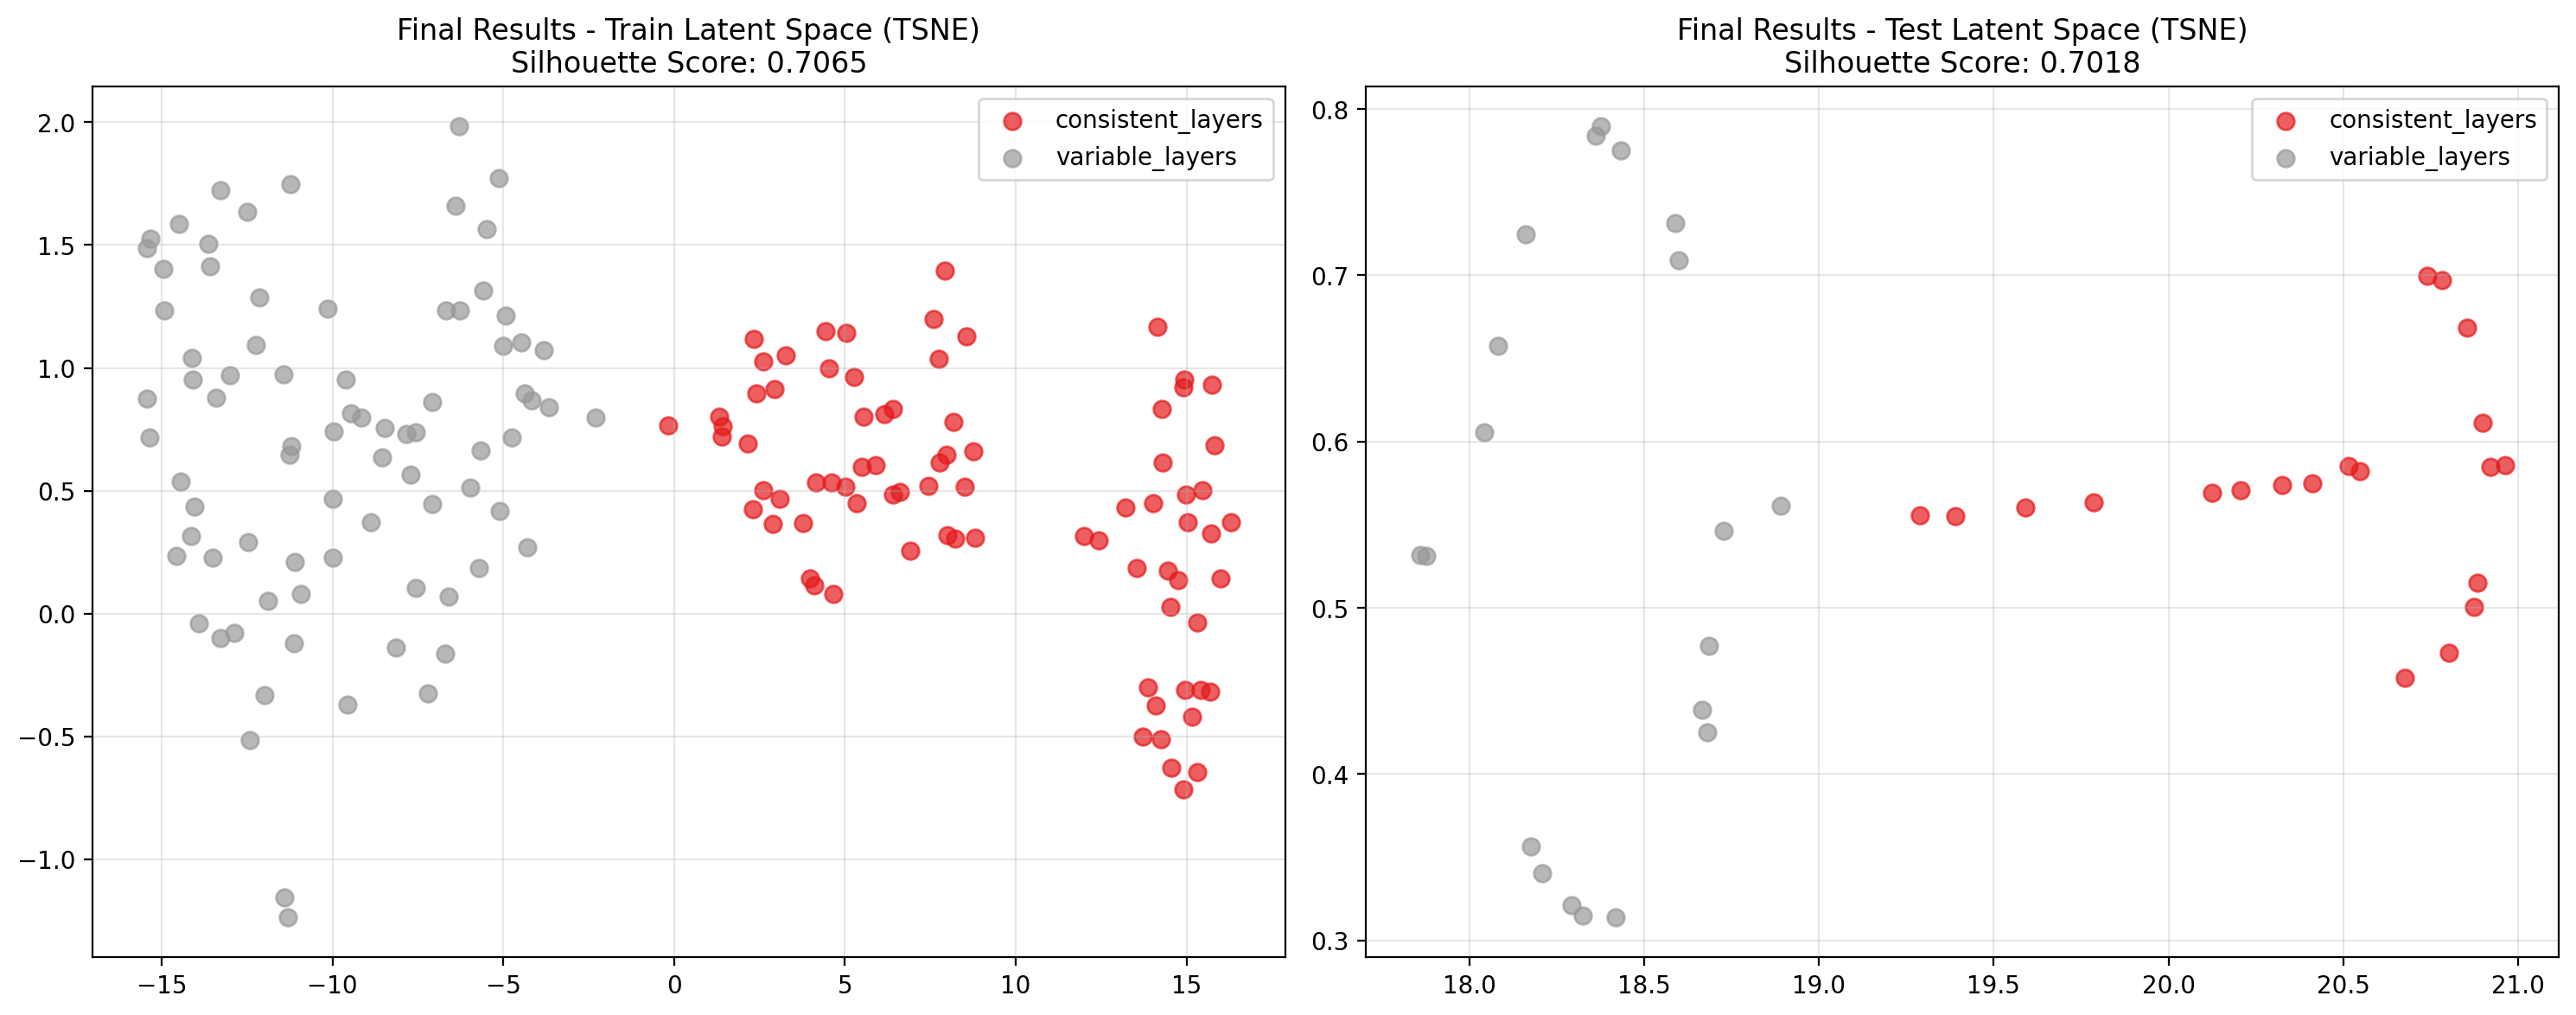

✅ FINAL VISUALIZATION COMPLETE

🎯 FINAL EXPERIMENT RESULTS
📊 Training Summary:
   • Model: SimpleLinearAutoencoder
   • Training Time: 5.43 seconds
   • Total Epochs: 3
   • Learning Rate: 0.001

📈 Final Loss Metrics:
   • Final Train Loss: 0.223047
   • Final Test Loss: 0.222783

🎯 Final Silhouette Scores (Latent Space Quality):
   • Training Data: 0.7065
   • Test Data: 0.7018
✅ Experiment Complete!

Model saved to demo_single_experiment_results\simple_linear_latent16_20250604_173805\simple_linear_latent16_20250604_173805_model.pth
Model saved to: demo_single_experiment_results\simple_linear_latent16_20250604_173805\simple_linear_latent16_20250604_173805_model.pth
Experiment completed successfully! Final test loss: 0.22278325259685516
Results saved to: demo_single_experiment_results\simple_linear_latent16_20250604_173805
✅ Single experiment completed successfully!
Experiment result keys: ['experiment_name', 'architecture', 'latent_dim', 'config', 'history', 'metrics', 'model_path', '

In [4]:
# Test 3: Single experiment training wrapper
print("=== Testing Single Experiment Wrapper ===")

try:
    # Configuration for single experiment
    # Use the existing dataset from our data generation step
    single_experiment_config = {
        'dataset_path': 'demo_wrapper_test_dataset',  # Use existing dataset
        'architecture_name': 'simple_linear',
        'latent_dim': 16,
        'epochs': 3,  # Keep it short for testing
        'batch_size': 32,
        'learning_rate': 0.001,
        'output_dir': 'demo_single_experiment_results',
        'save_model': True,
        'random_seed': 42,
        'verbose': True
    }
    
    print(f"Running single experiment with config:")
    for key, value in single_experiment_config.items():
        print(f"  {key}: {value}")
    
    # Run single experiment
    experiment_result = run_single_experiment(**single_experiment_config)
    
    print("✅ Single experiment completed successfully!")
    print(f"Experiment result keys: {list(experiment_result.keys()) if experiment_result else 'None'}")
    
    # Check if results were saved
    if experiment_result and experiment_result.get('success'):
        output_dir = experiment_result.get('output_dir')
        if output_dir and os.path.exists(output_dir):
            print(f"✅ Experiment results saved to: {output_dir}")
            
            # List result files
            result_files = os.listdir(output_dir)
            print(f"Result files: {result_files}")
            
            # Check for key result files
            expected_files = ['experiment_results.json']
            for expected_file in expected_files:
                if expected_file in result_files:
                    print(f"  ✅ Found {expected_file}")
                else:
                    print(f"  ⚠️  Missing {expected_file}")
        else:
            print("❌ Experiment results directory not found")
    else:
        print("❌ Experiment did not complete successfully")
        if experiment_result:
            print(f"Error: {experiment_result.get('error', 'Unknown error')}")
        
except Exception as e:
    print(f"❌ Error in single experiment: {e}")
    import traceback
    traceback.print_exc()

## 4. Systematic Experiments Testing

Now let's test the systematic experiments wrapper with multiple architectures and latent dimensions.

=== Testing Systematic Experiments Wrapper ===
Running systematic experiments with config:
  dataset_path: demo_wrapper_test_dataset
  architectures: ['simple_linear', 'deeper_linear']
  latent_dims: [8, 16]
  epochs: 2
  batch_size: 32
  learning_rates: [0.001]
  output_dir: demo_systematic_experiments_results
  random_seed: 42
  generate_visualizations: True
  show_plots: True
  verbose: True

This will run 4 experiments...
🚀 Starting Systematic Autoencoder Experiments
📊 Architectures: ['simple_linear', 'deeper_linear']
🔢 Latent dimensions: [8, 16]
📈 Learning rates: [0.001]
⏰ Epochs: 2
📁 Output directory: demo_systematic_experiments_results
Random seed set to 42 for reproducibility
📊 Preparing dataset...
Loading dataset from: demo_wrapper_test_dataset
✅ Loaded existing dataset with 2 classes
  Classes: ['consistent_layers', 'variable_layers']

🏗️ Testing architecture: simple_linear
----------------------------------------
🧪 Experiment 1/4: simple_linear (dim=8, lr=0.001)
Random seed 

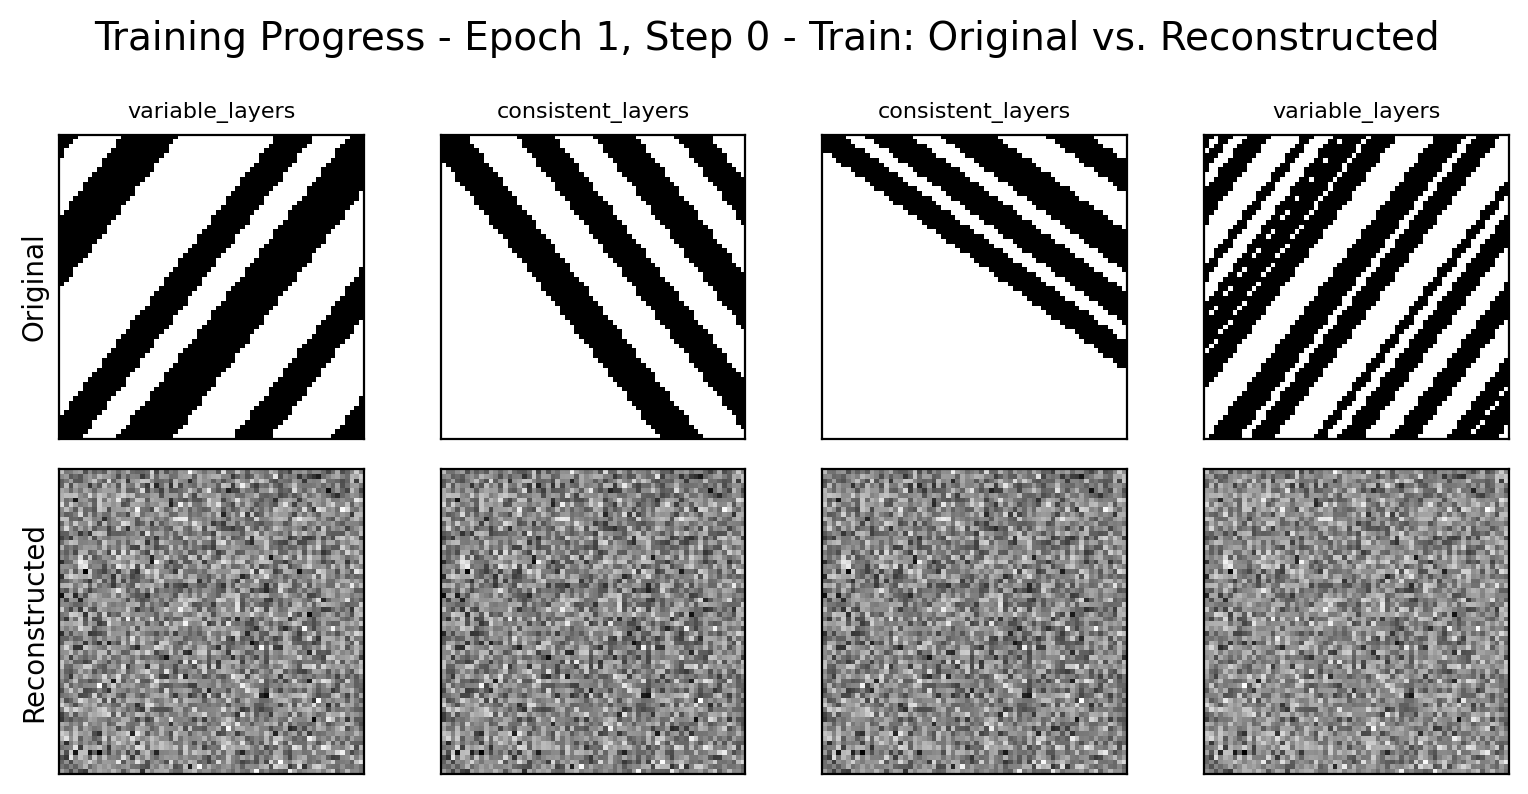

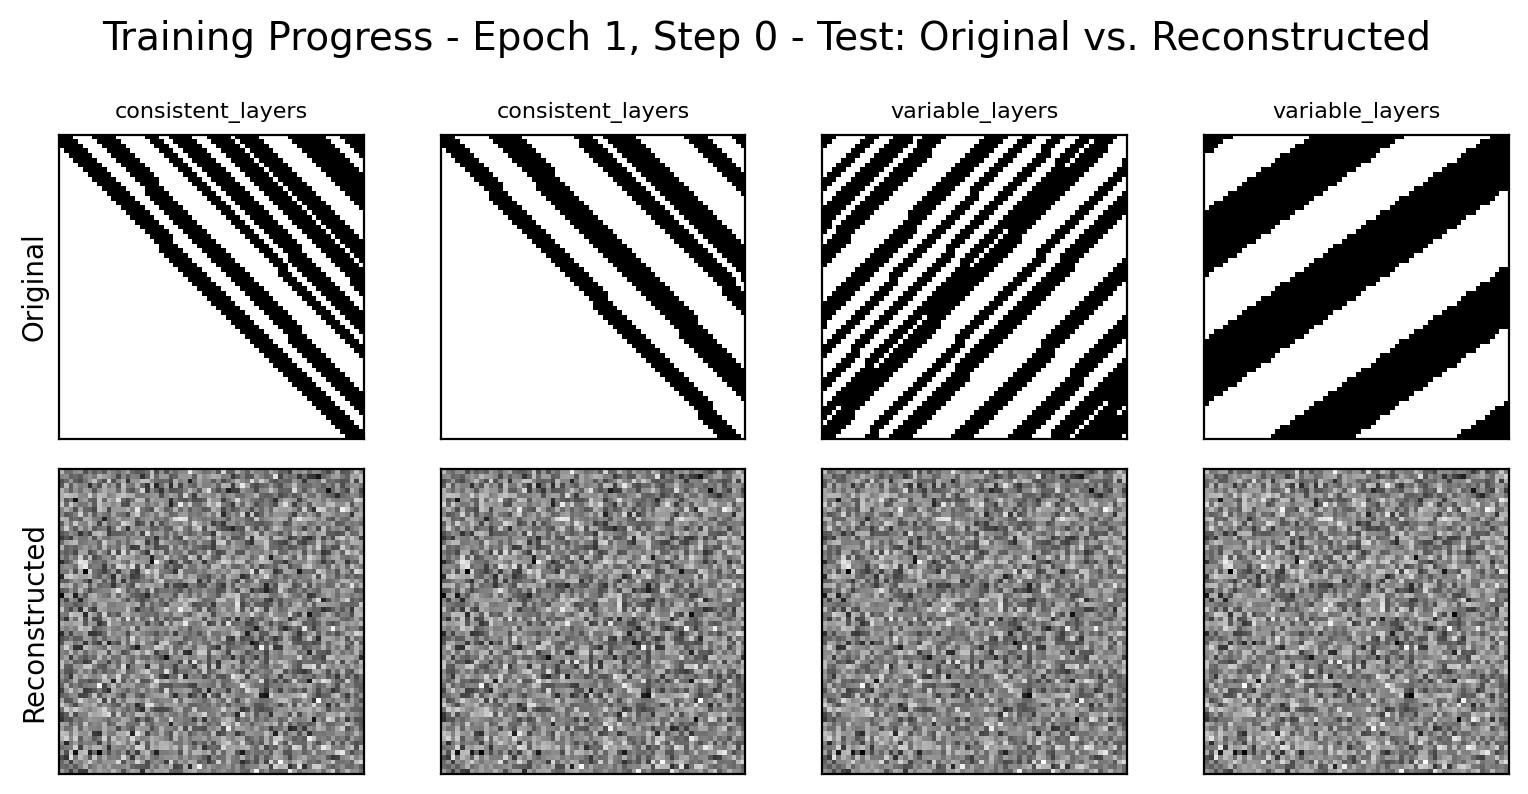

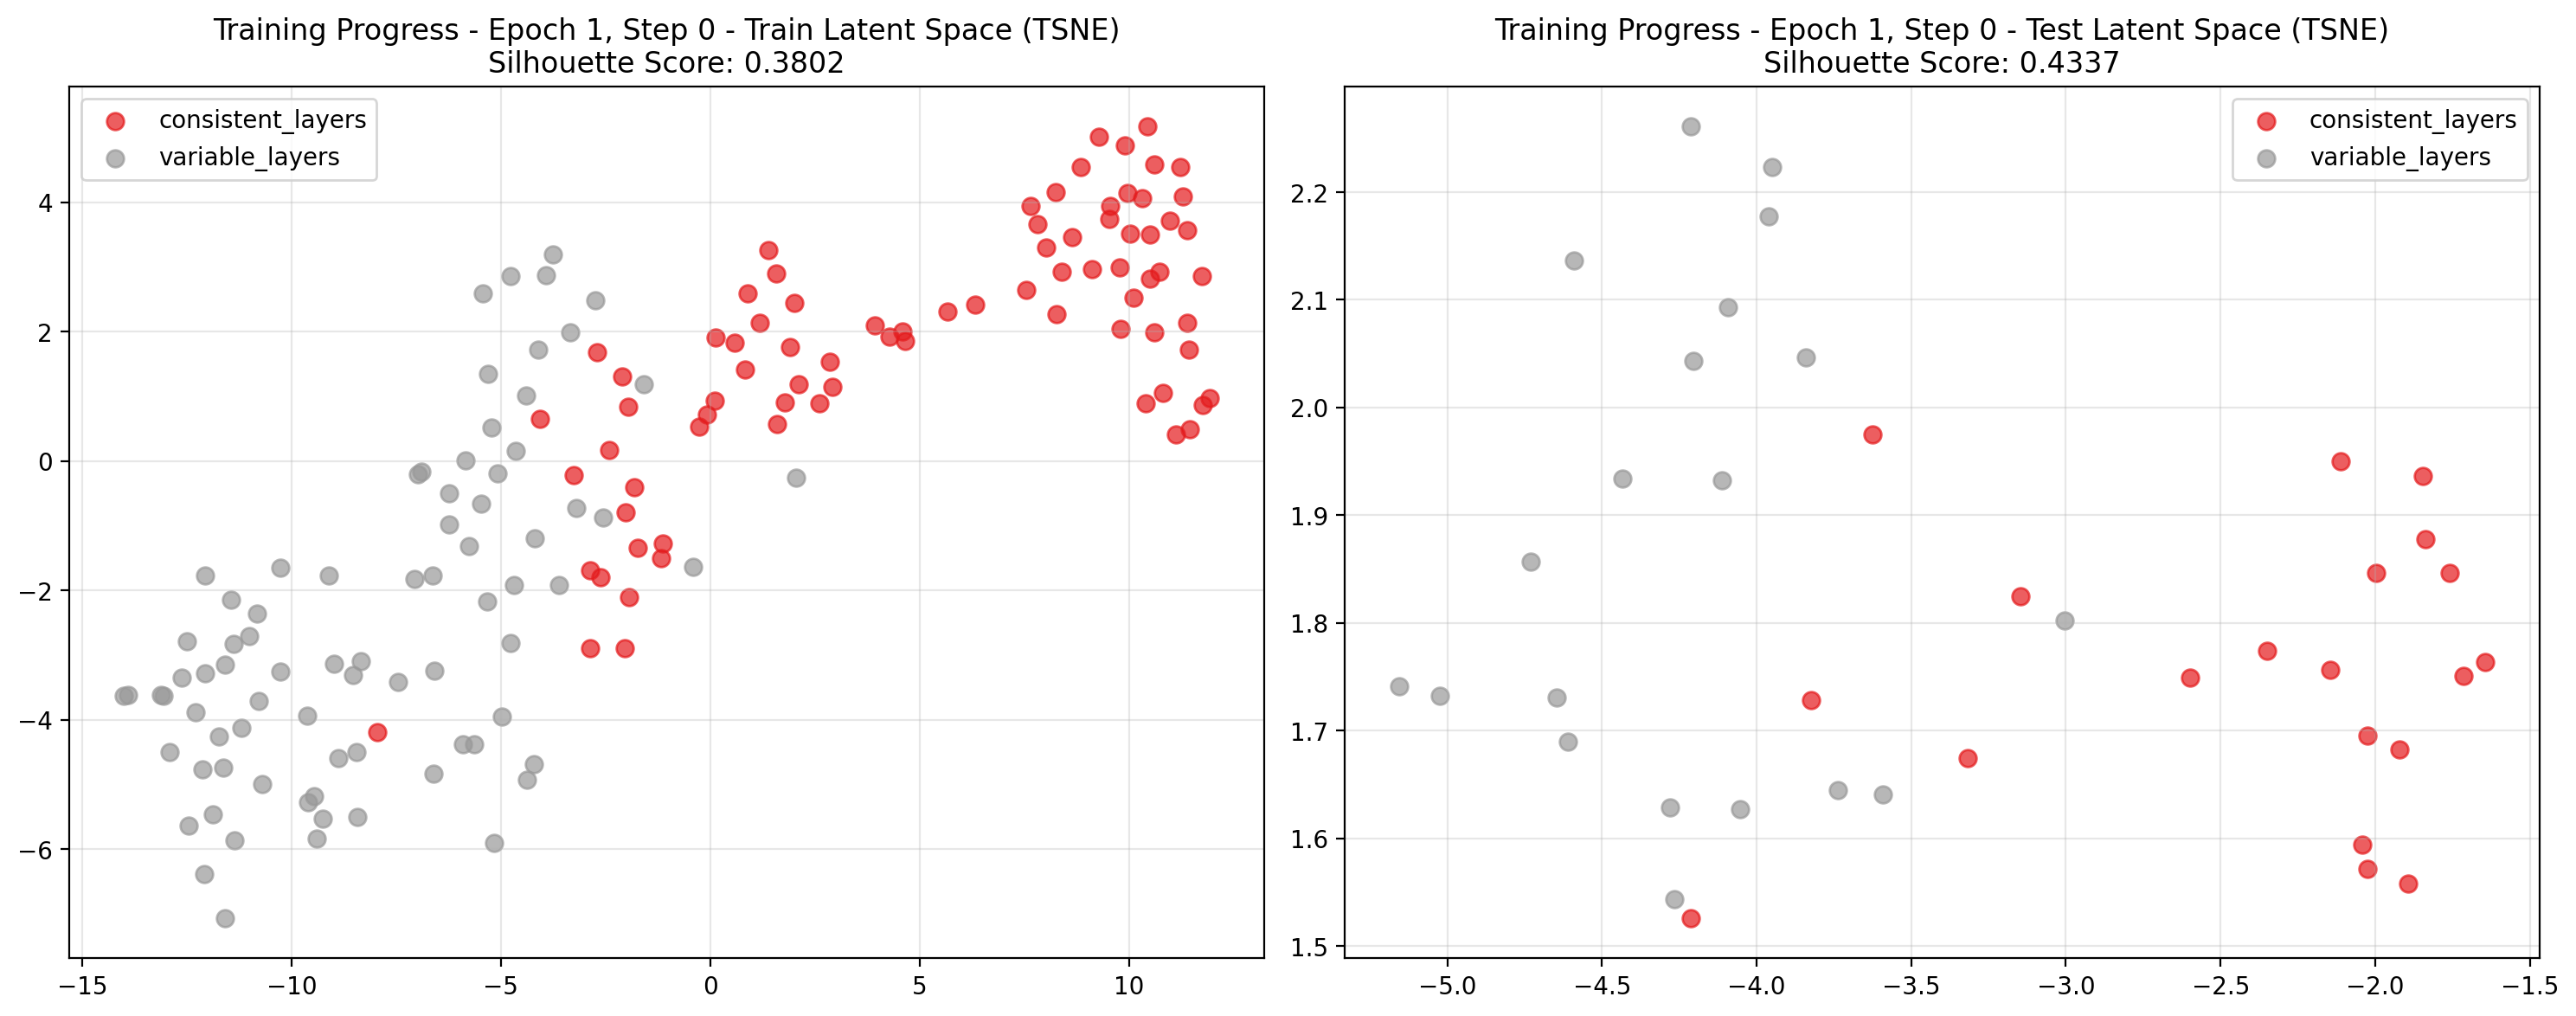

Epoch 1/2 completed | Train loss: 0.2509 | Test loss: 0.2473
Epoch: 2/2, Step: 0 | train loss: 0.2470 | test loss: 0.2457


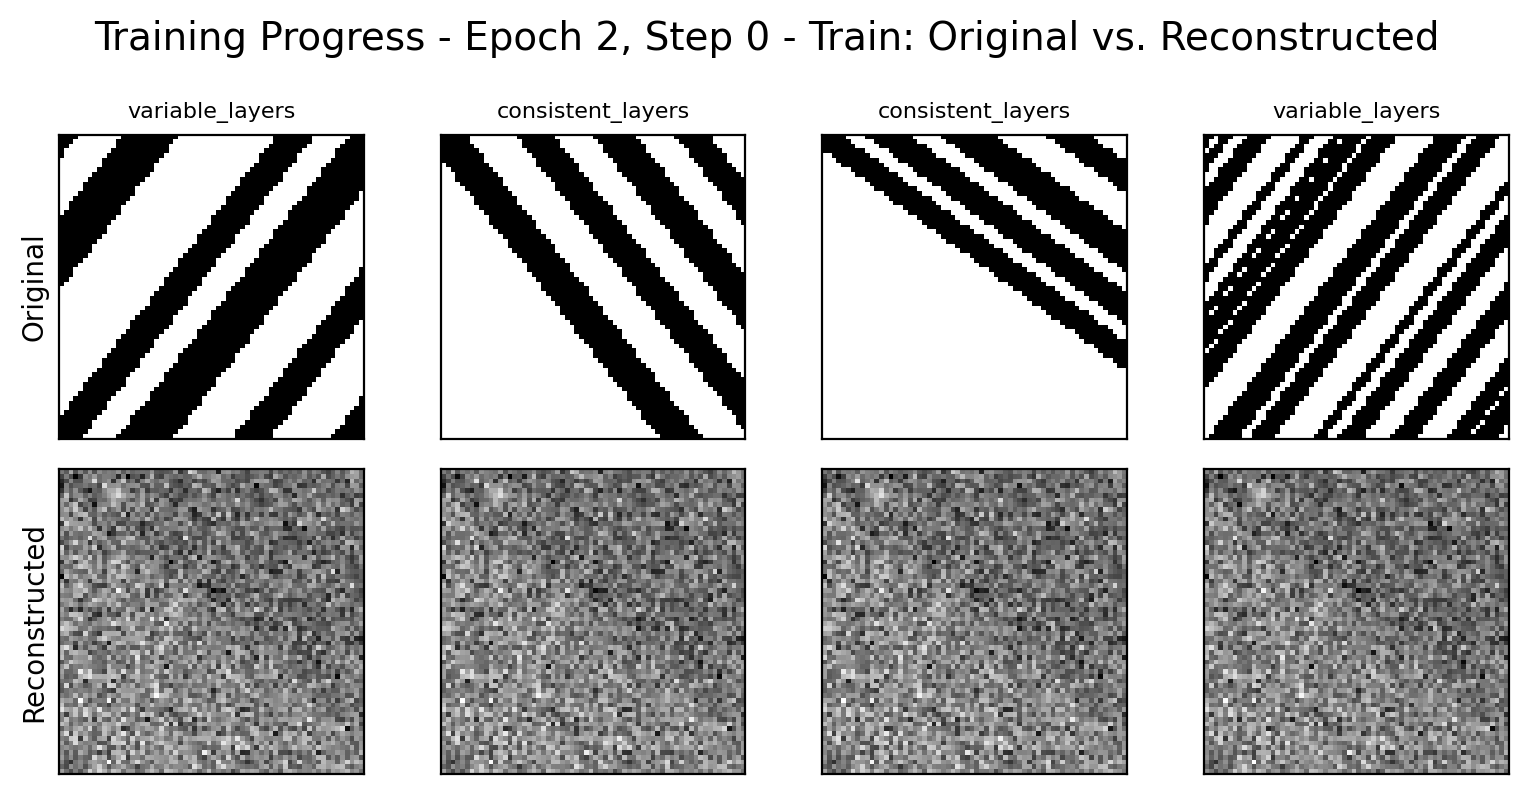

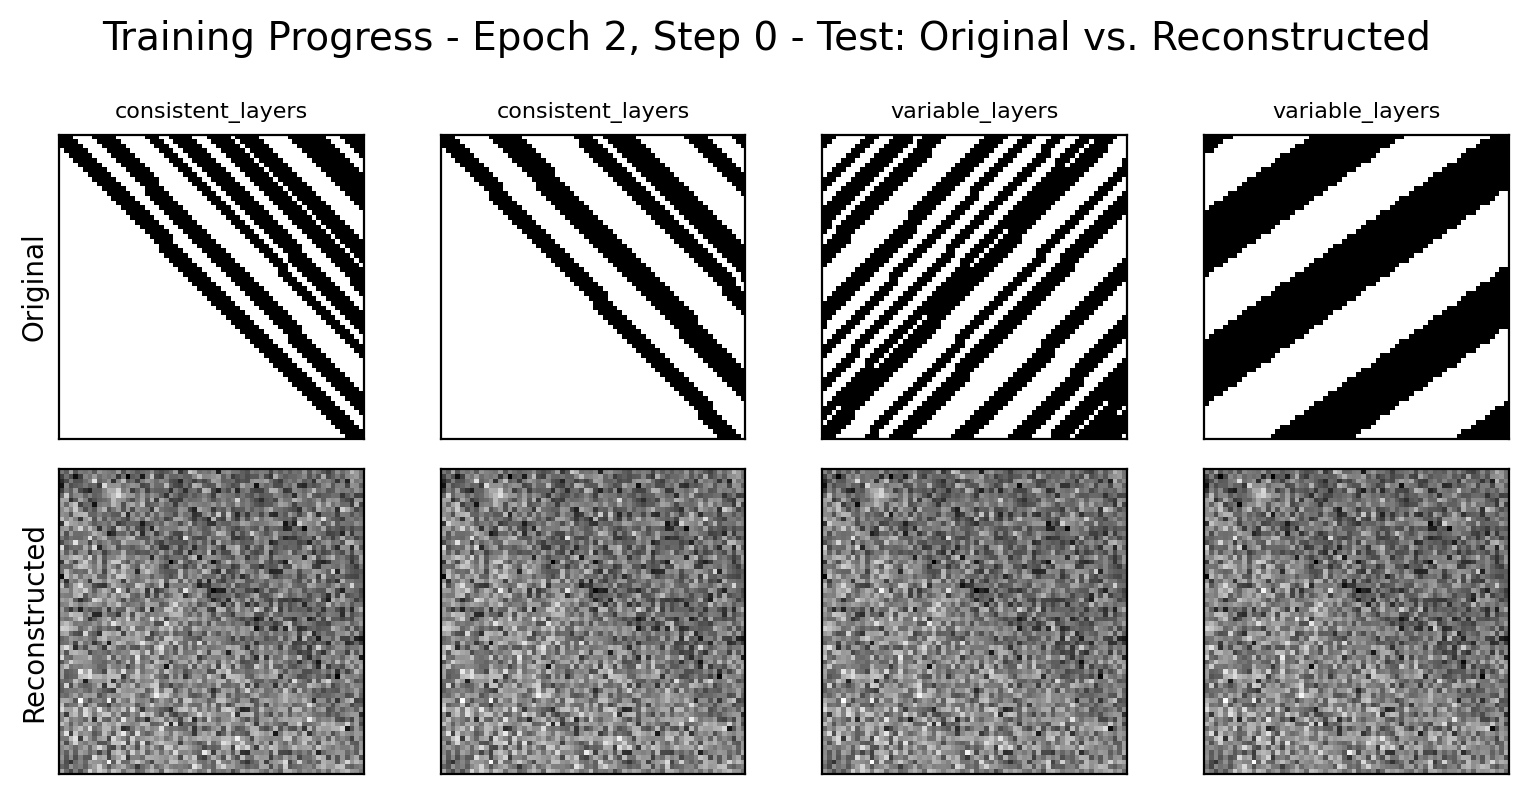

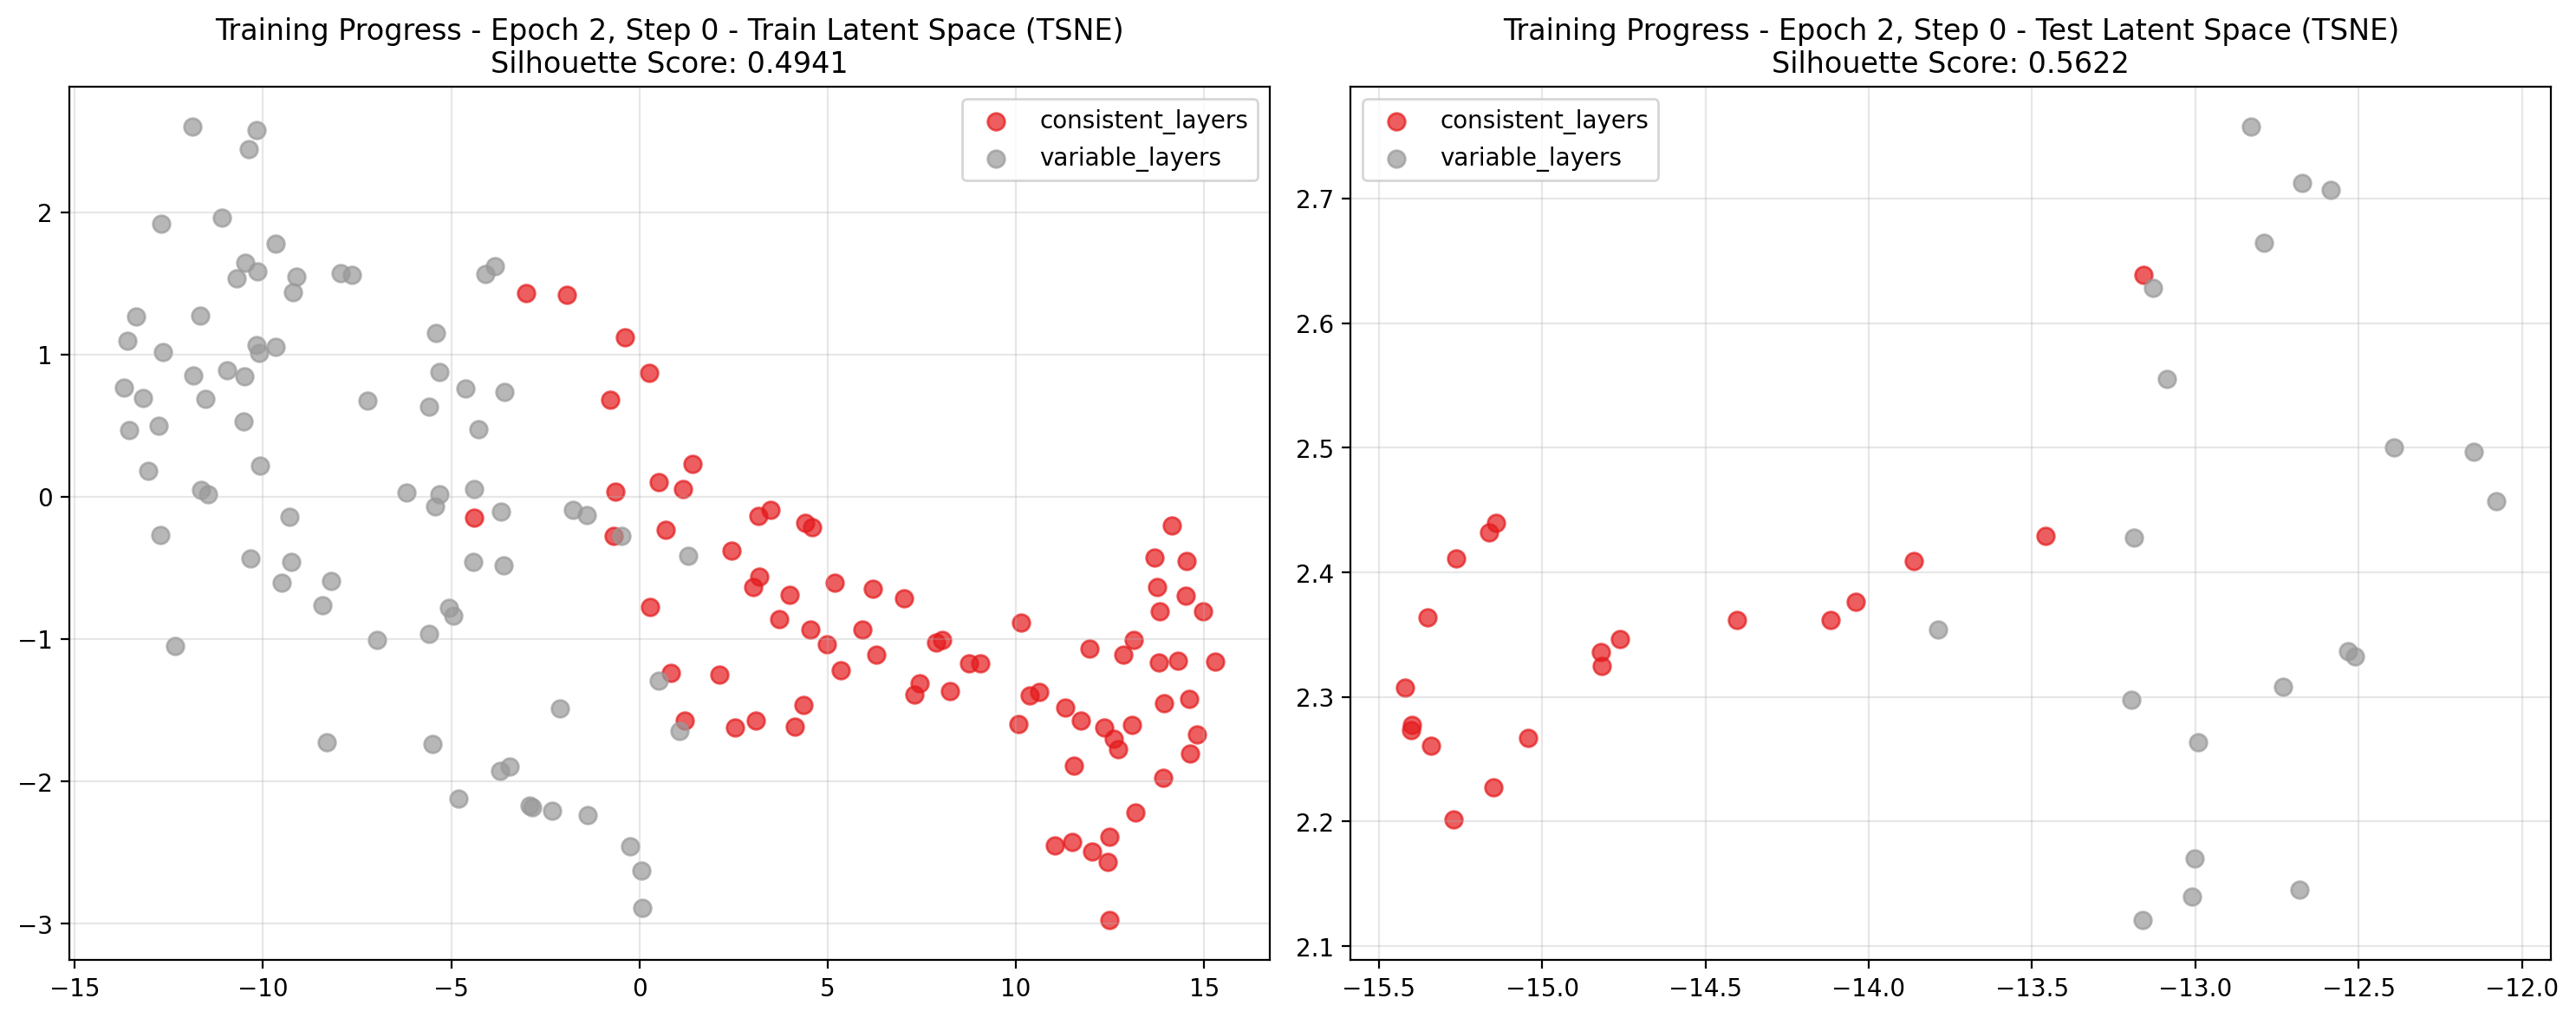

Performing final visualization at epoch 2/2, step 4
Epoch: 2/2, Step: 4 | train loss: 0.2413 | test loss: 0.2368
Epoch 2/2 completed | Train loss: 0.2439 | Test loss: 0.2368
Training completed in 3.69 seconds
Generating final latent space visualization and metrics

📊 FINAL VISUALIZATION GENERATION
Generating final reconstruction visualizations...


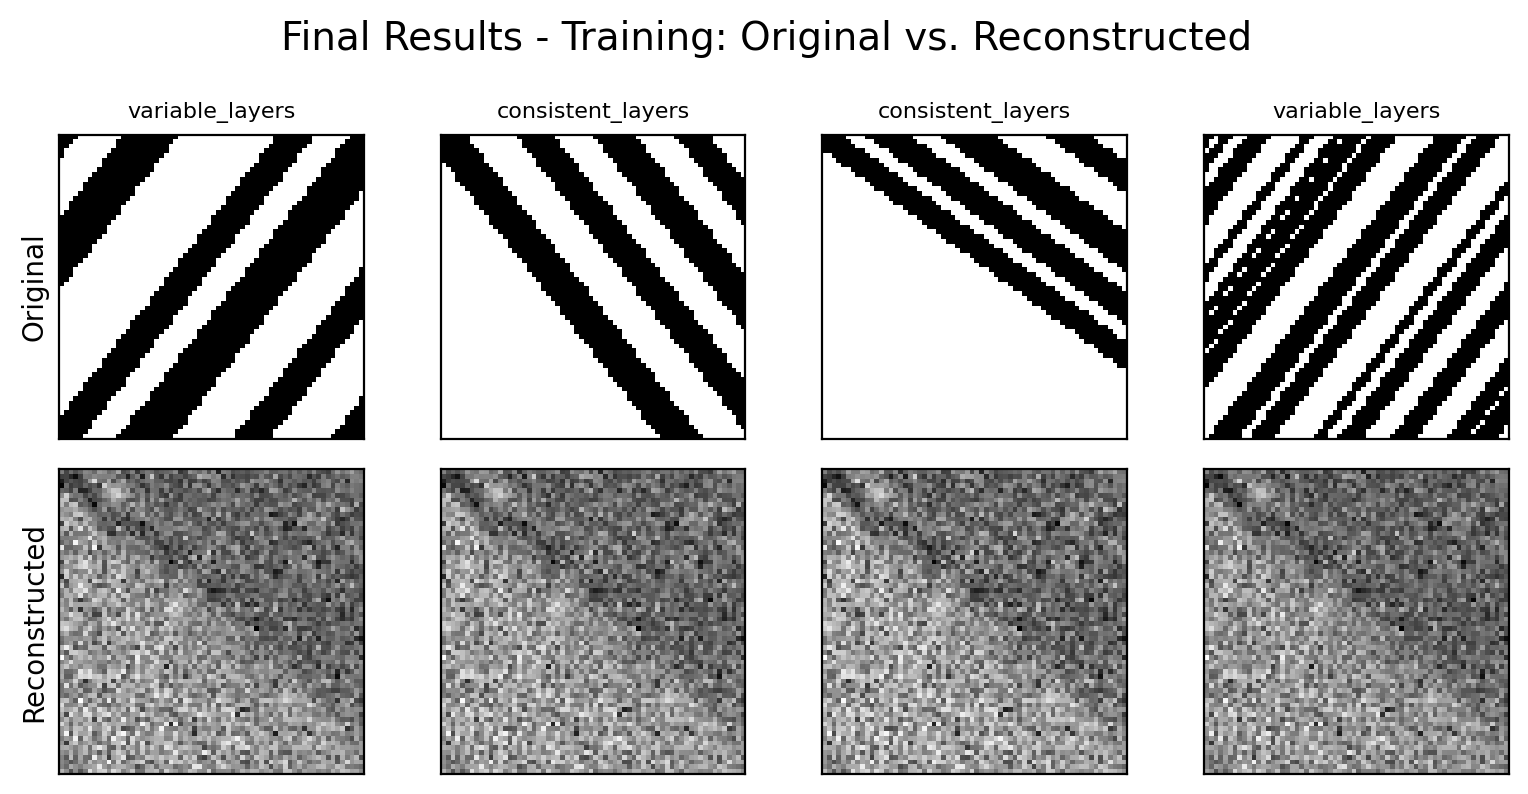

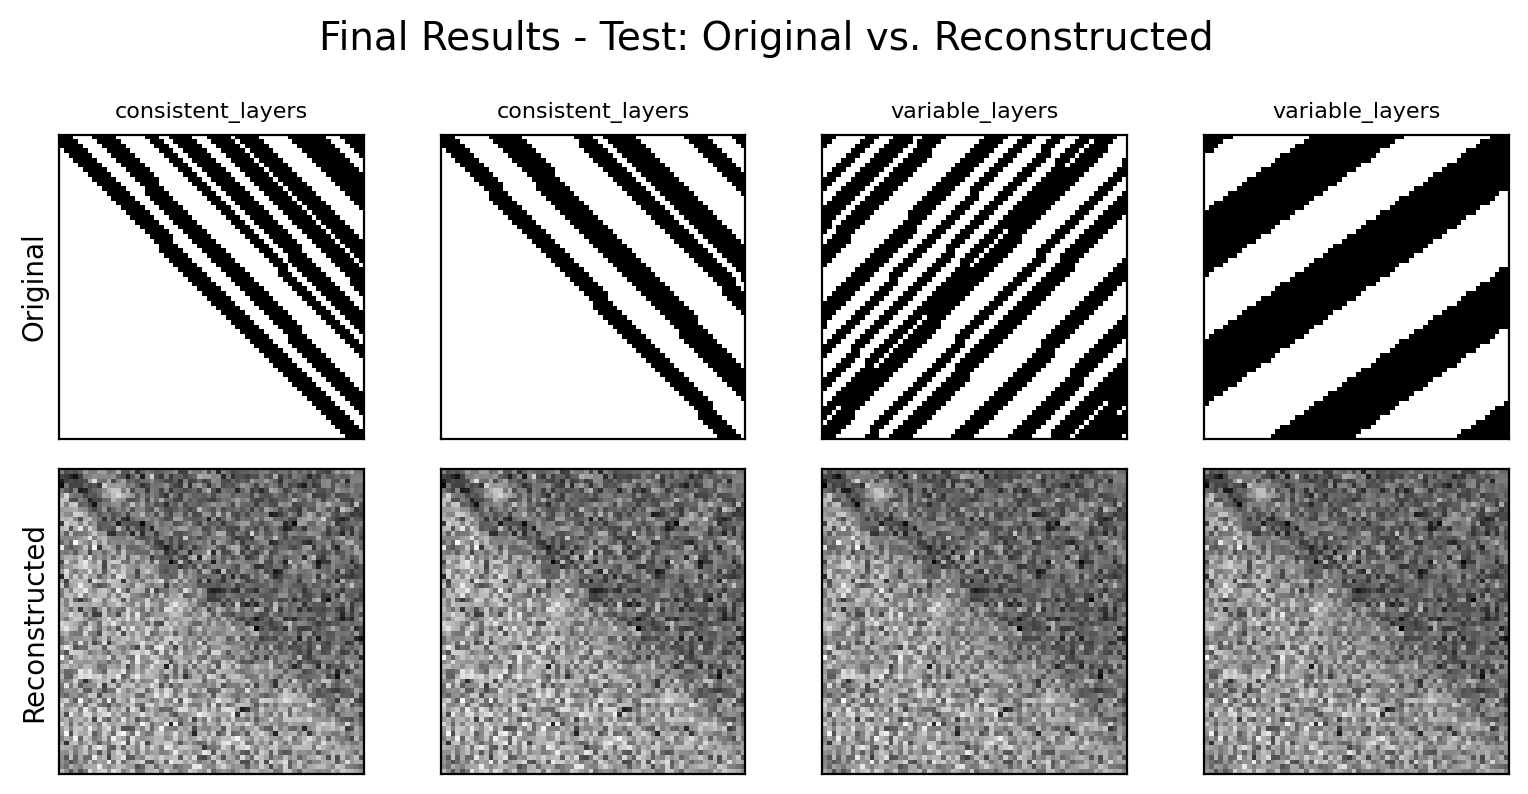

Generating final latent space analysis...


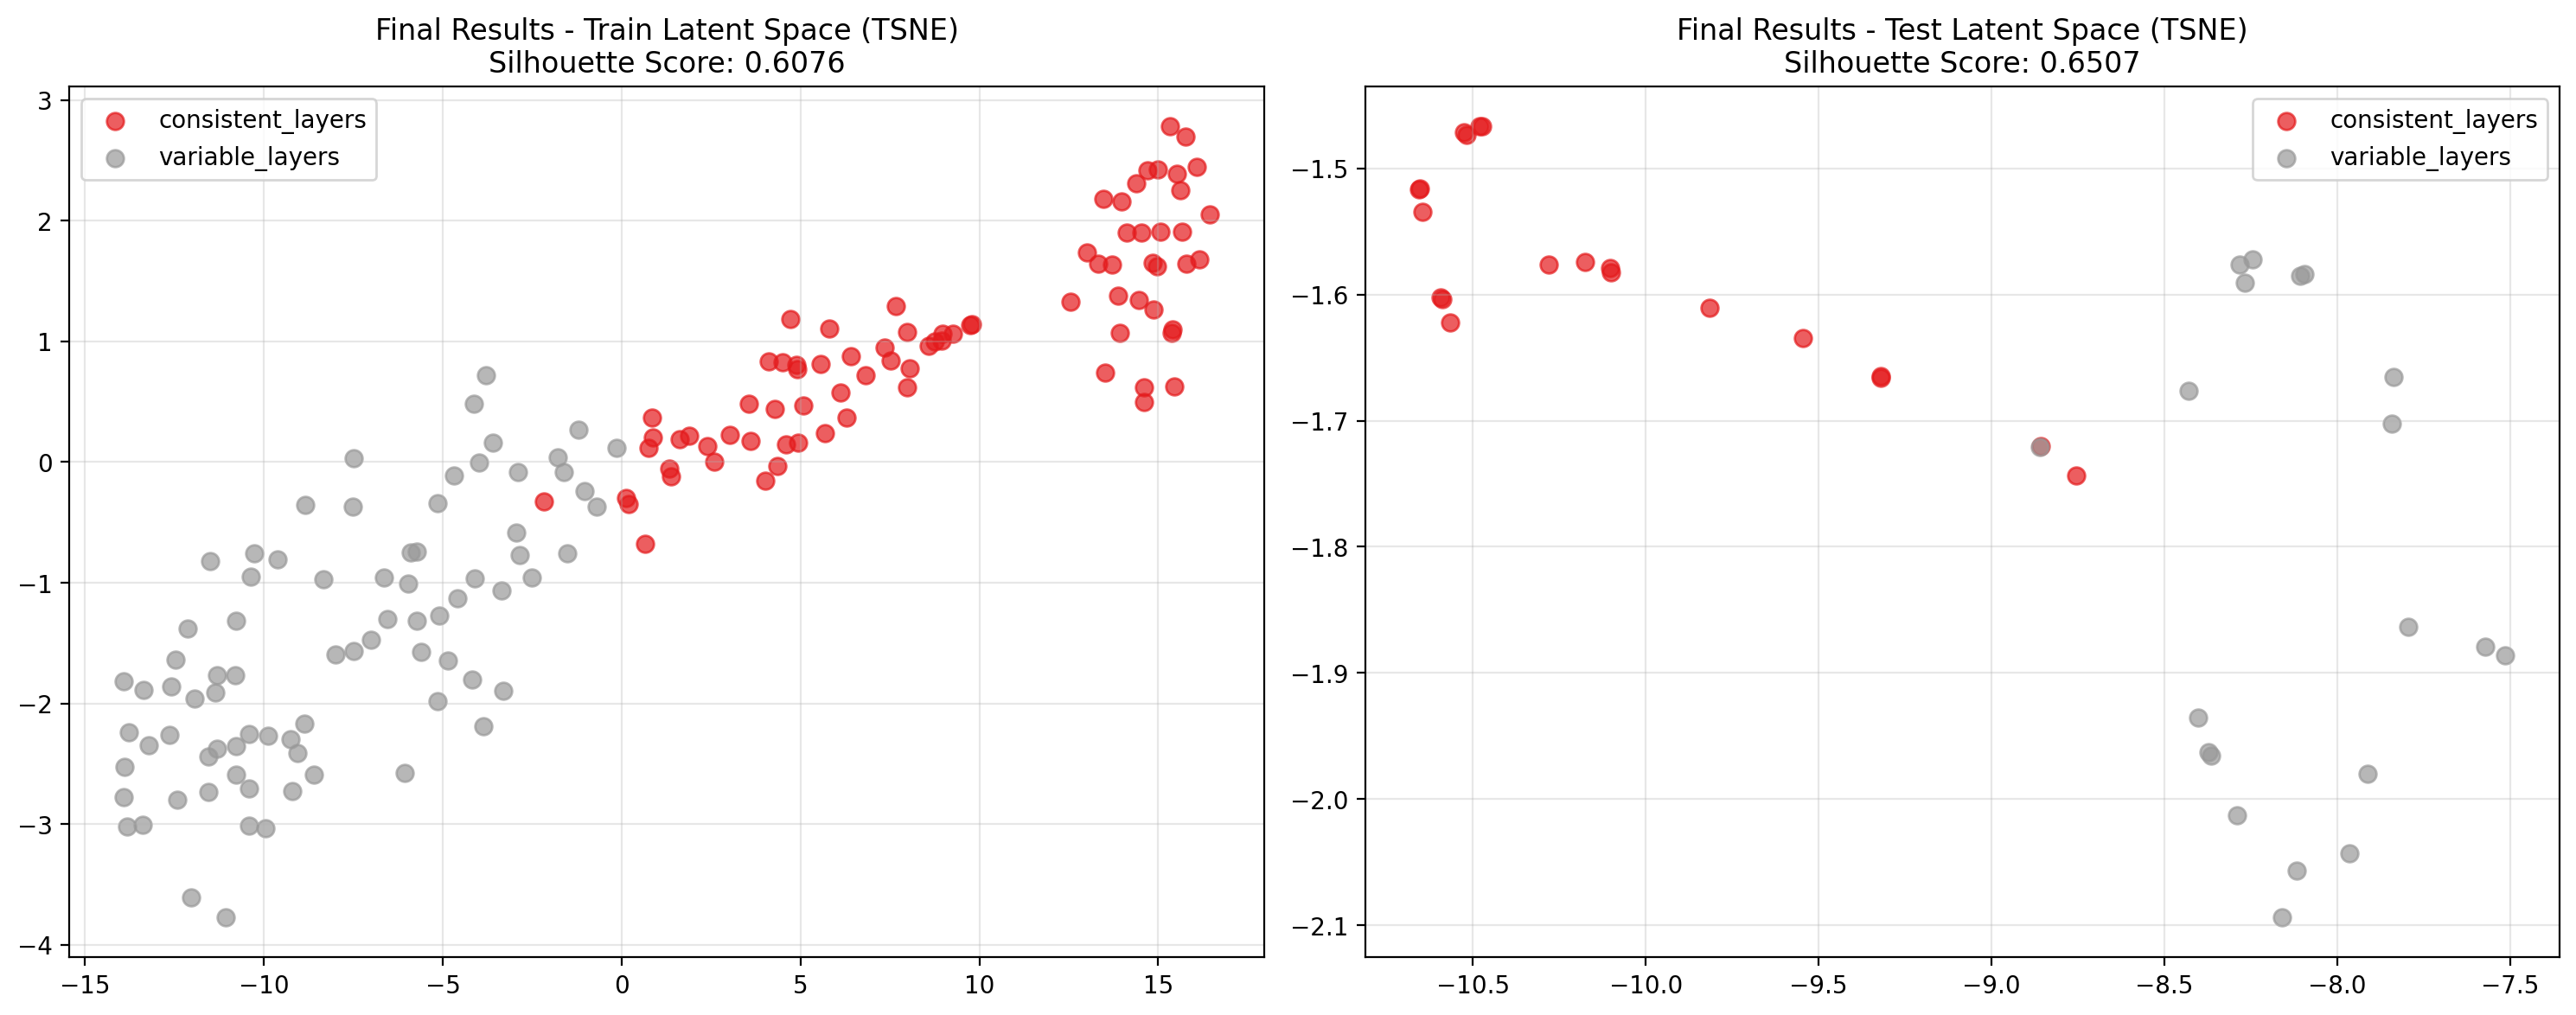

✅ FINAL VISUALIZATION COMPLETE

🎯 FINAL EXPERIMENT RESULTS
📊 Training Summary:
   • Model: SimpleLinearAutoencoder
   • Training Time: 3.69 seconds
   • Total Epochs: 2
   • Learning Rate: 0.001

📈 Final Loss Metrics:
   • Final Train Loss: 0.237204
   • Final Test Loss: 0.236807

🎯 Final Silhouette Scores (Latent Space Quality):
   • Training Data: 0.6076
   • Test Data: 0.6507
✅ Experiment Complete!

Model saved to demo_systematic_experiments_results\simple_linear_latent8_20250604_173830\simple_linear_latent8_20250604_173830_model.pth
🧪 Experiment 2/4: simple_linear (dim=16, lr=0.001)
Random seed set to 42 for reproducibility
Random seed set to 42 for reproducibility
ExperimentRunner initialized - Device: cpu, Output: demo_systematic_experiments_results\simple_linear_latent16_20250604_173836
Training SimpleLinearAutoencoder for 2 epochs on cpu
Learning rate: 0.001
Selected visualization samples: 4 total (2 per class)
  consistent_layers: indices [0, 1]
  variable_layers: indices [20,

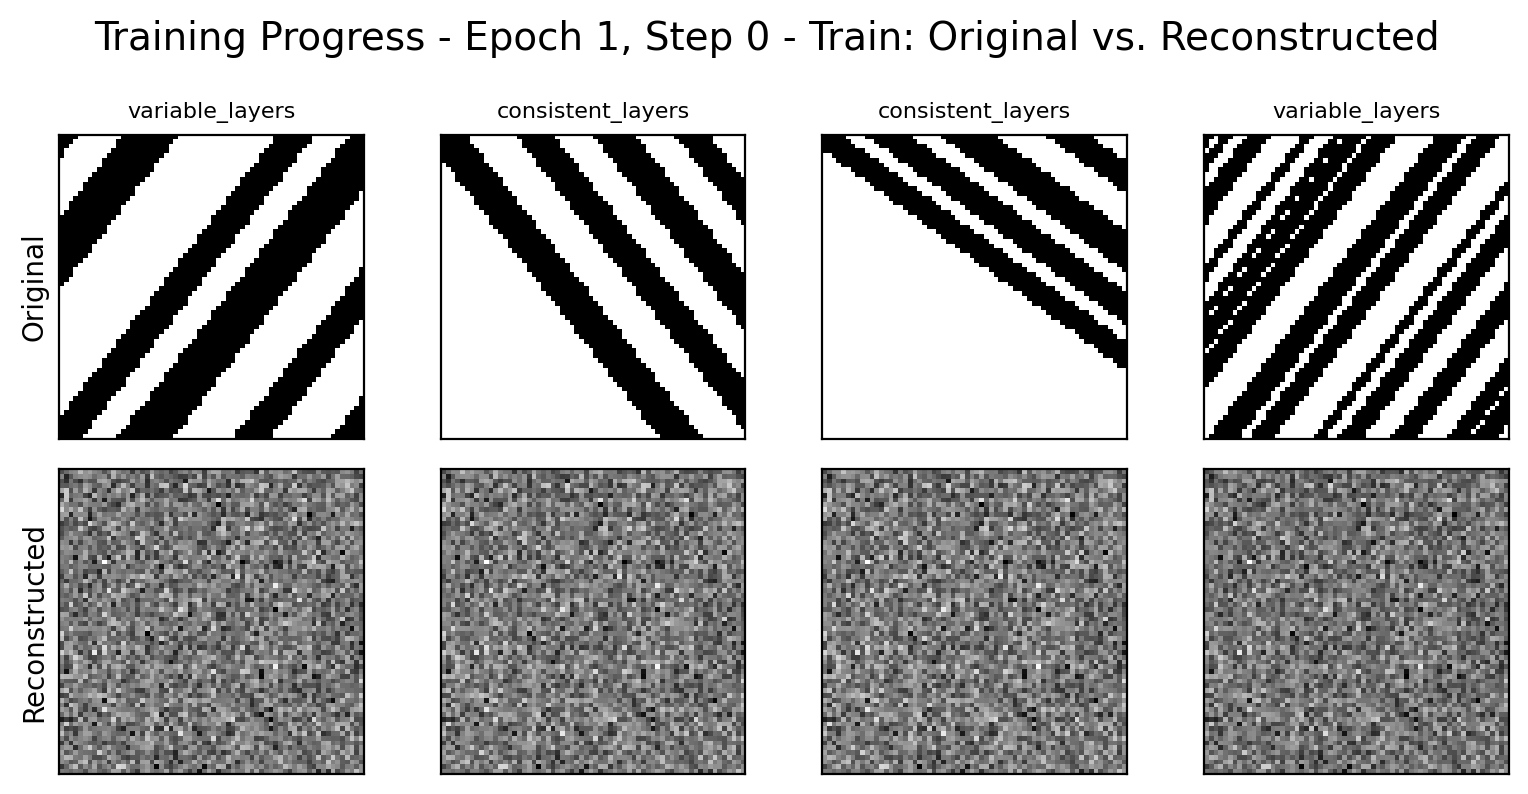

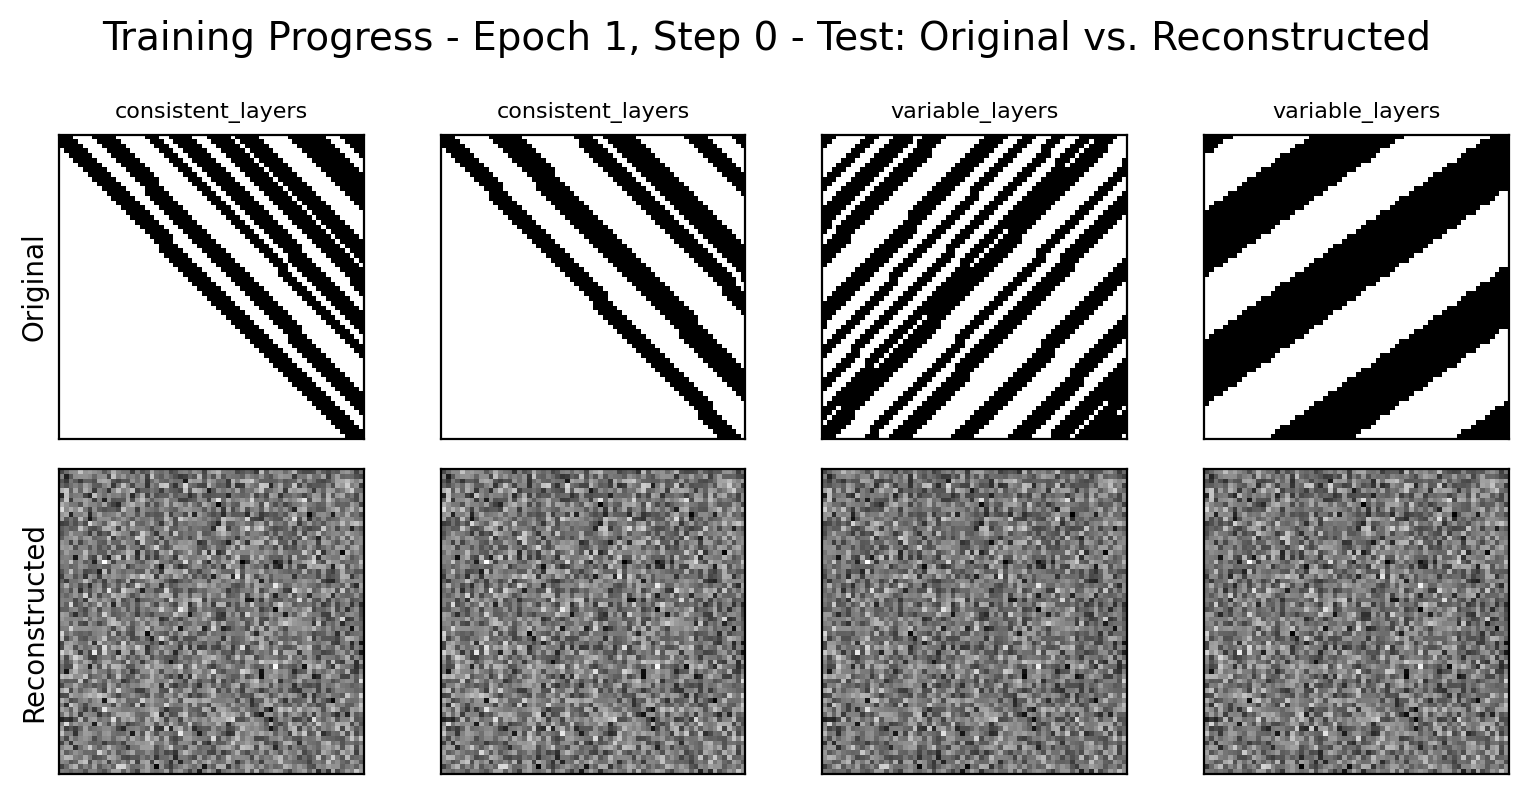

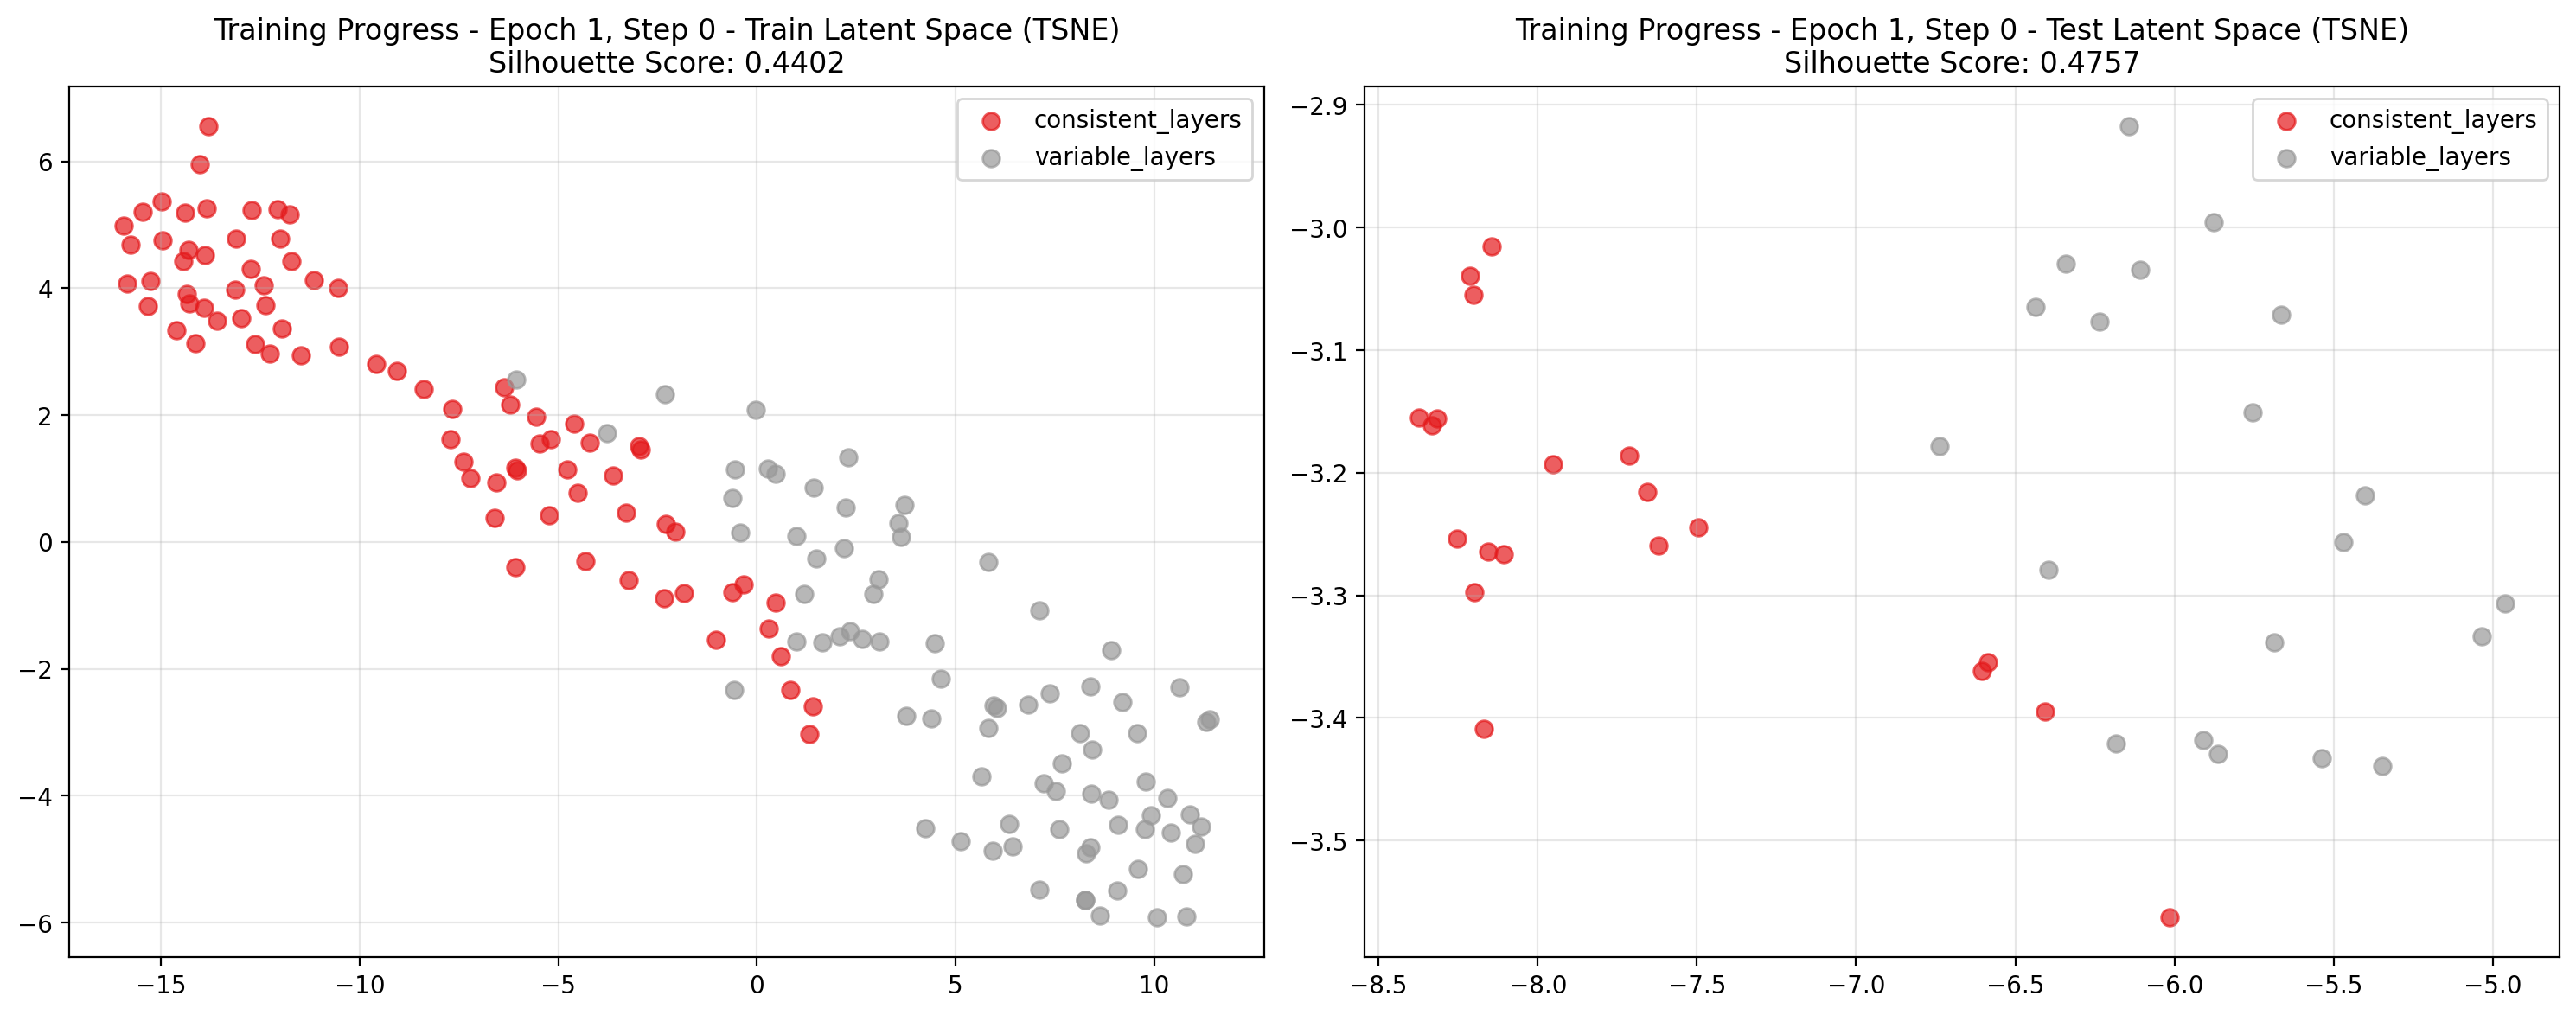

Epoch 1/2 completed | Train loss: 0.2503 | Test loss: 0.2468
Epoch: 2/2, Step: 0 | train loss: 0.2464 | test loss: 0.2452


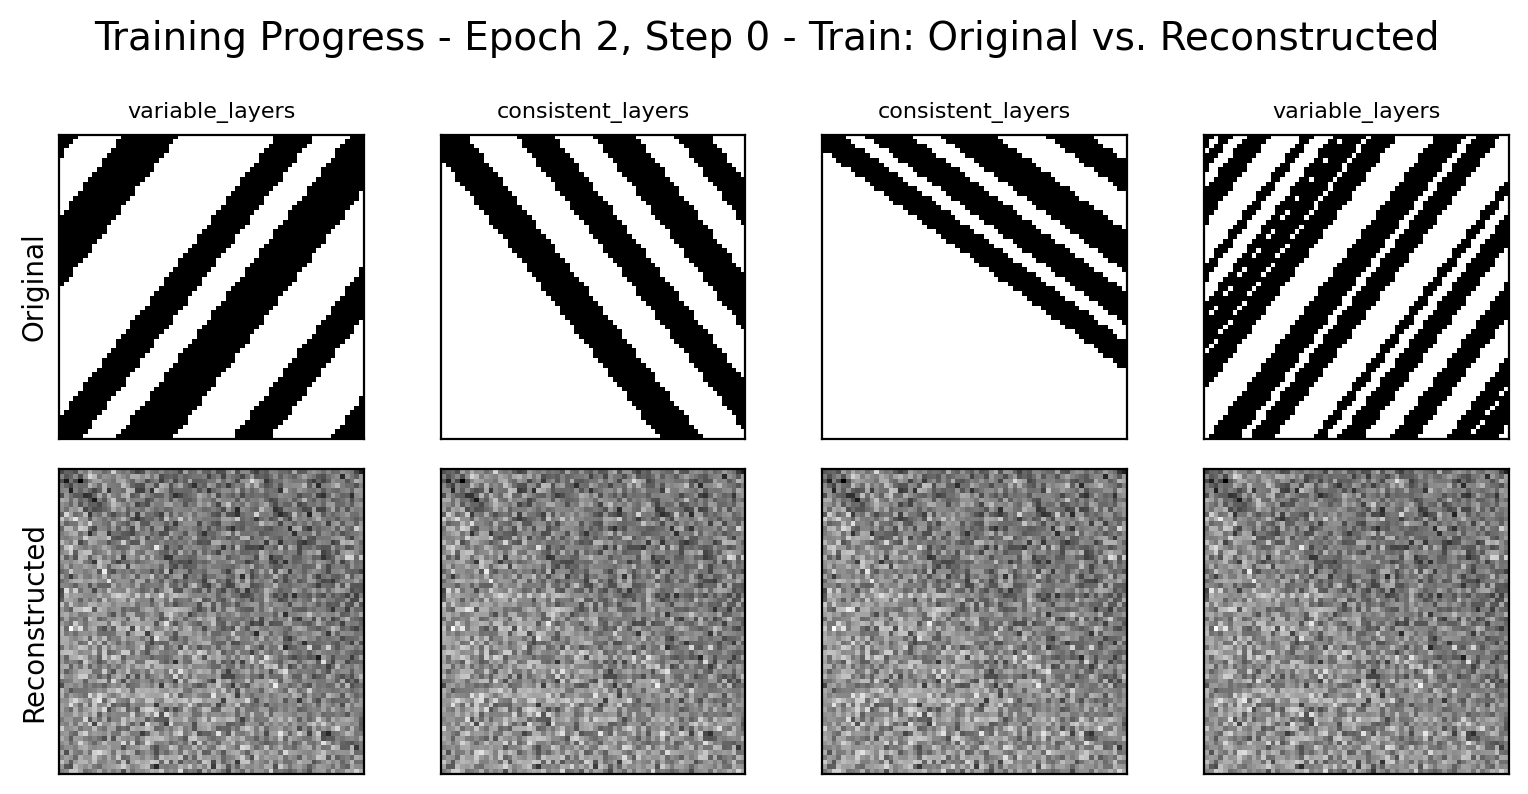

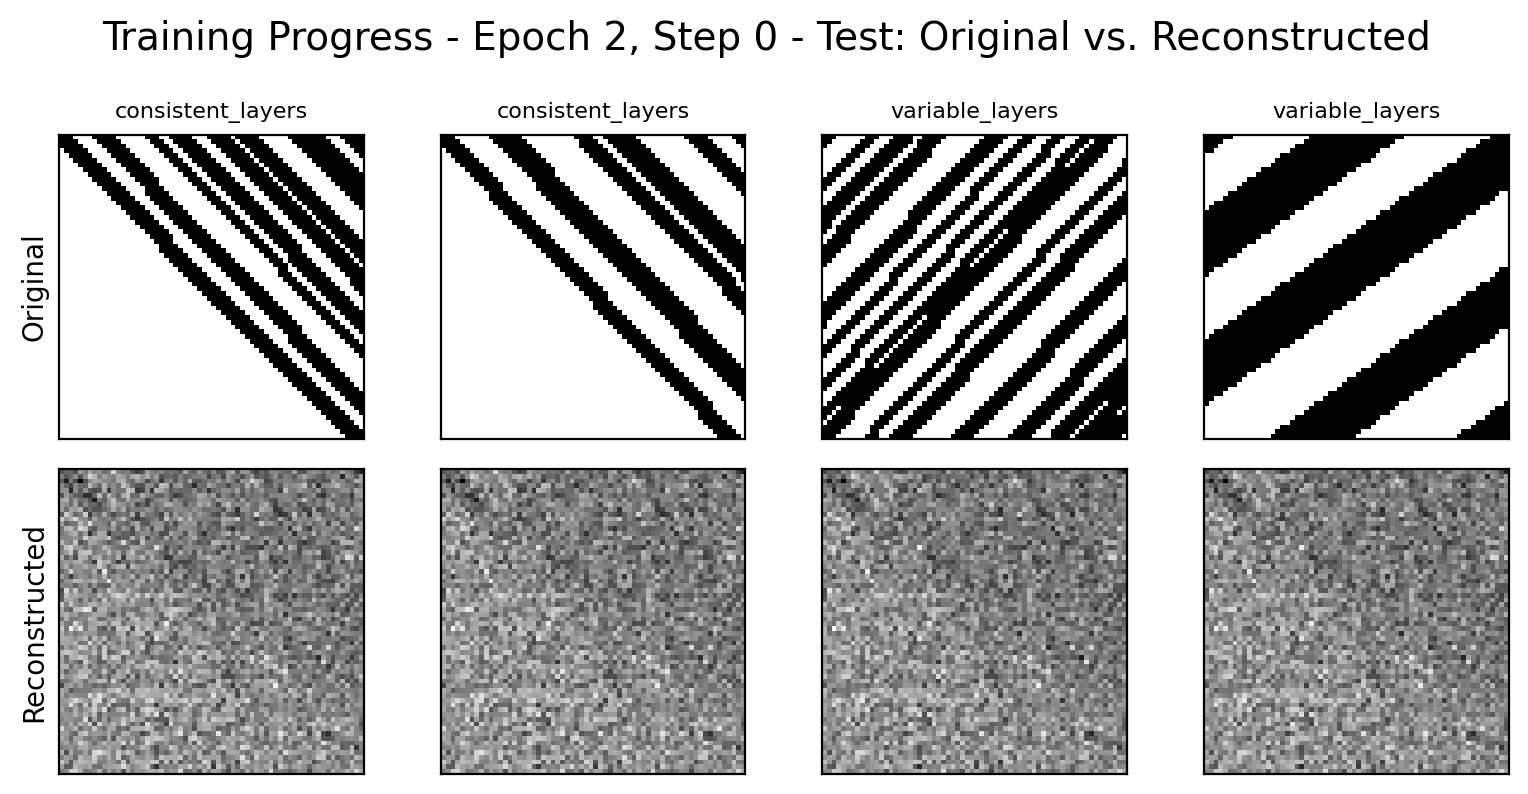

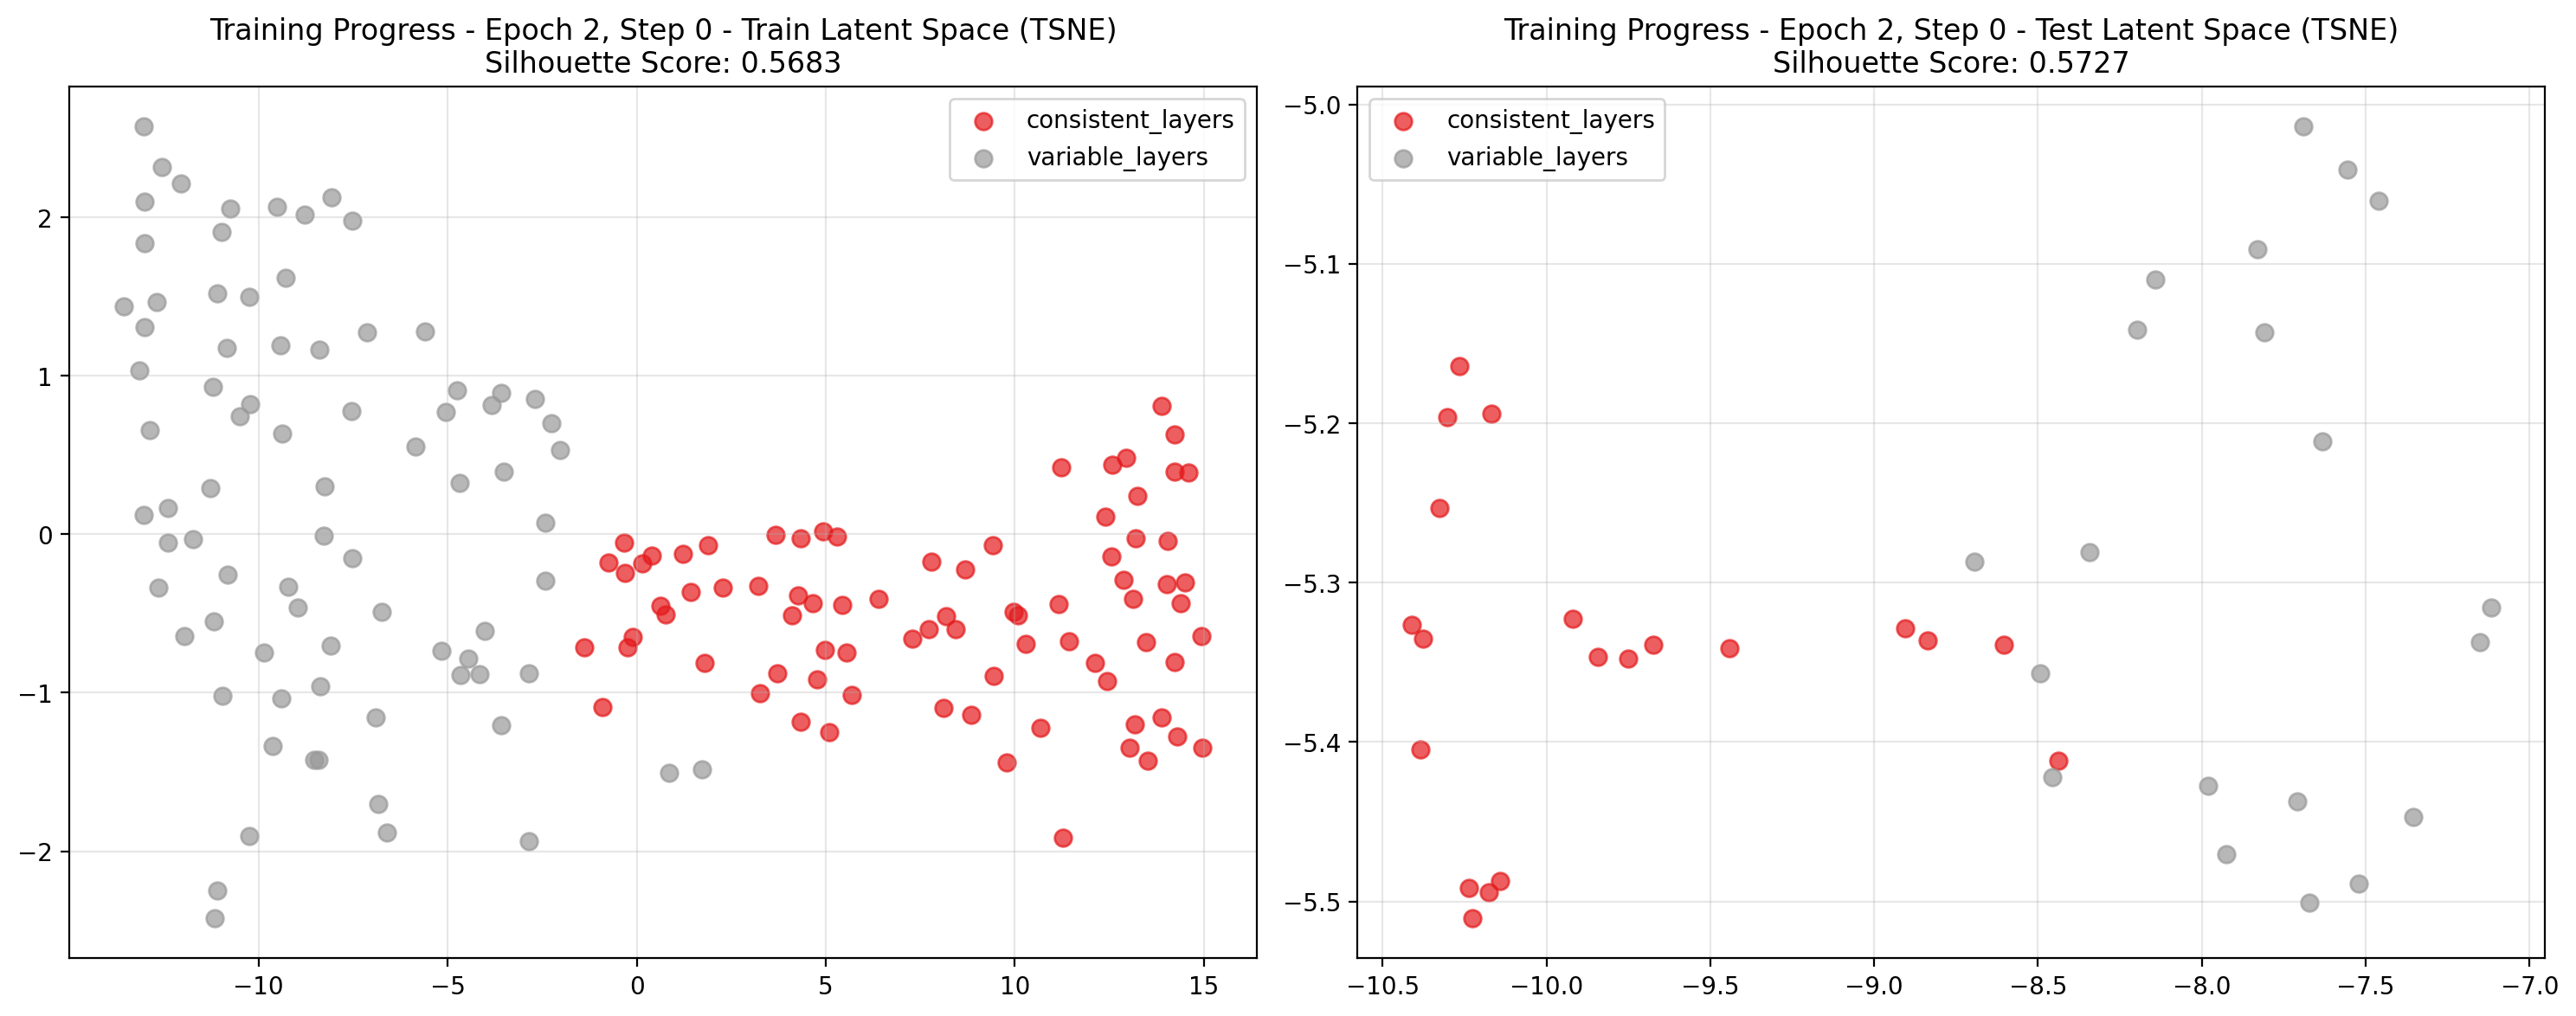

Performing final visualization at epoch 2/2, step 4
Epoch: 2/2, Step: 4 | train loss: 0.2402 | test loss: 0.2355
Epoch 2/2 completed | Train loss: 0.2432 | Test loss: 0.2355
Training completed in 4.03 seconds
Generating final latent space visualization and metrics

📊 FINAL VISUALIZATION GENERATION
Generating final reconstruction visualizations...


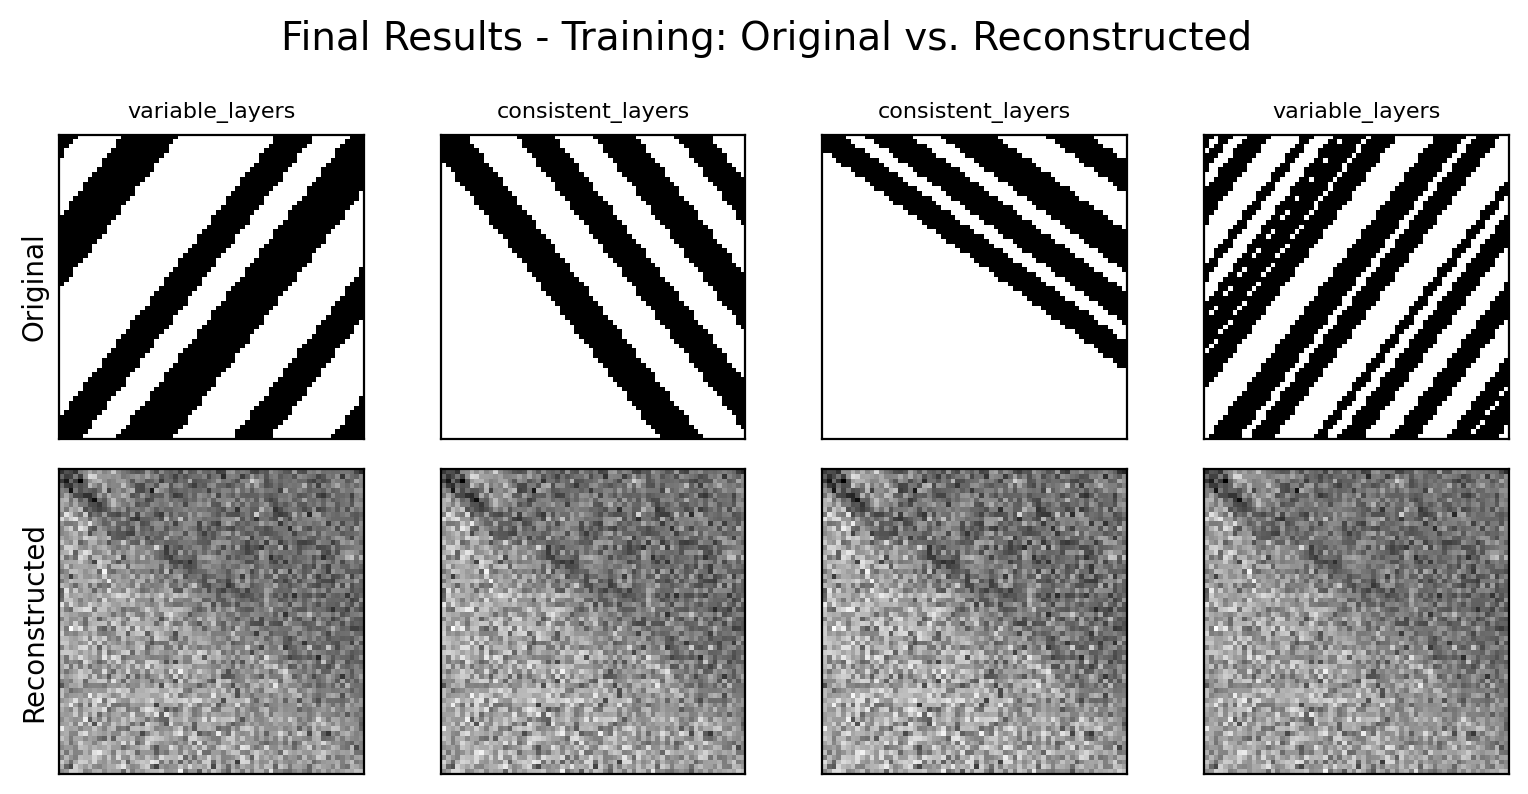

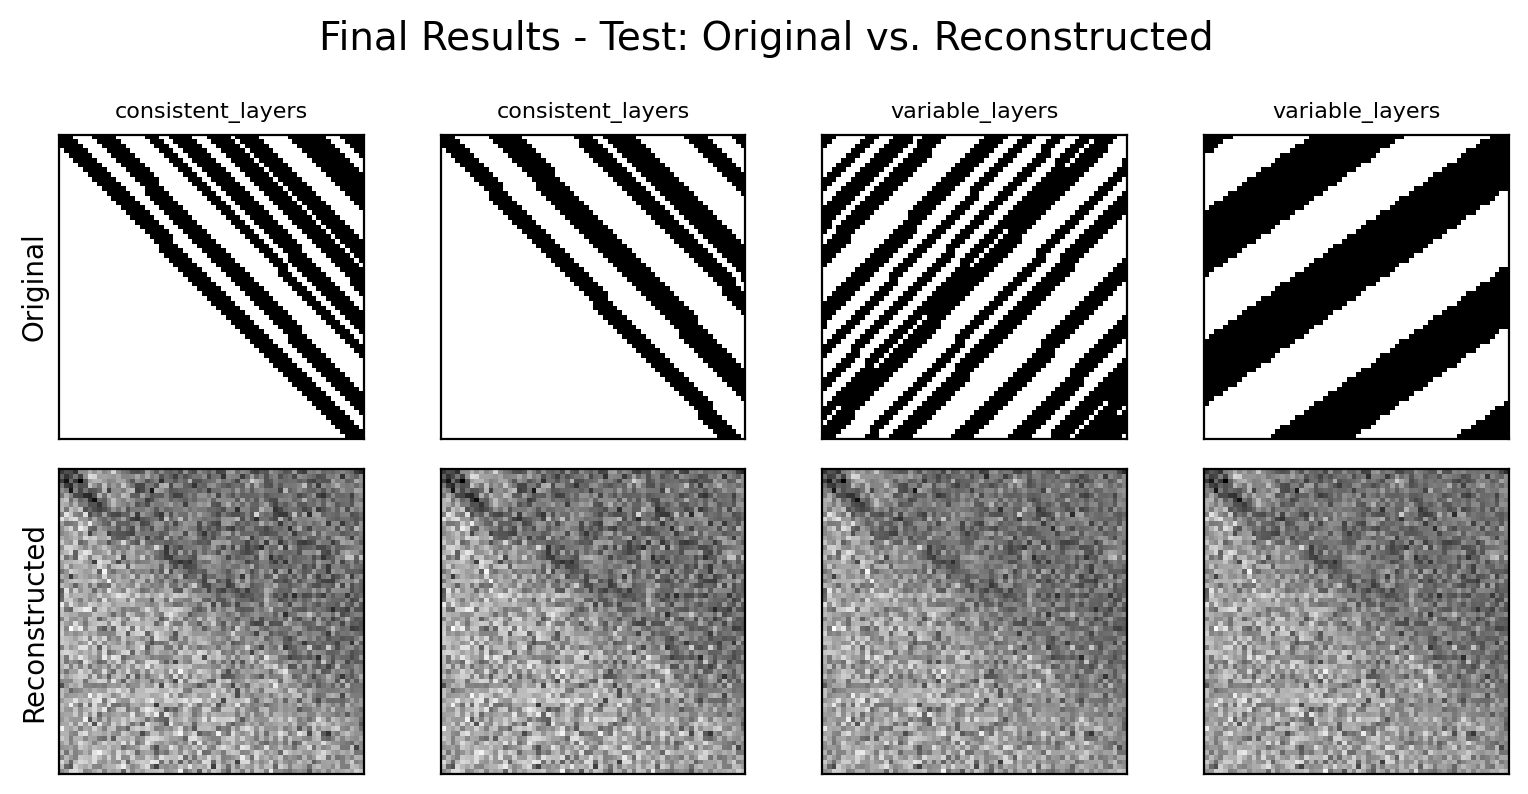

Generating final latent space analysis...


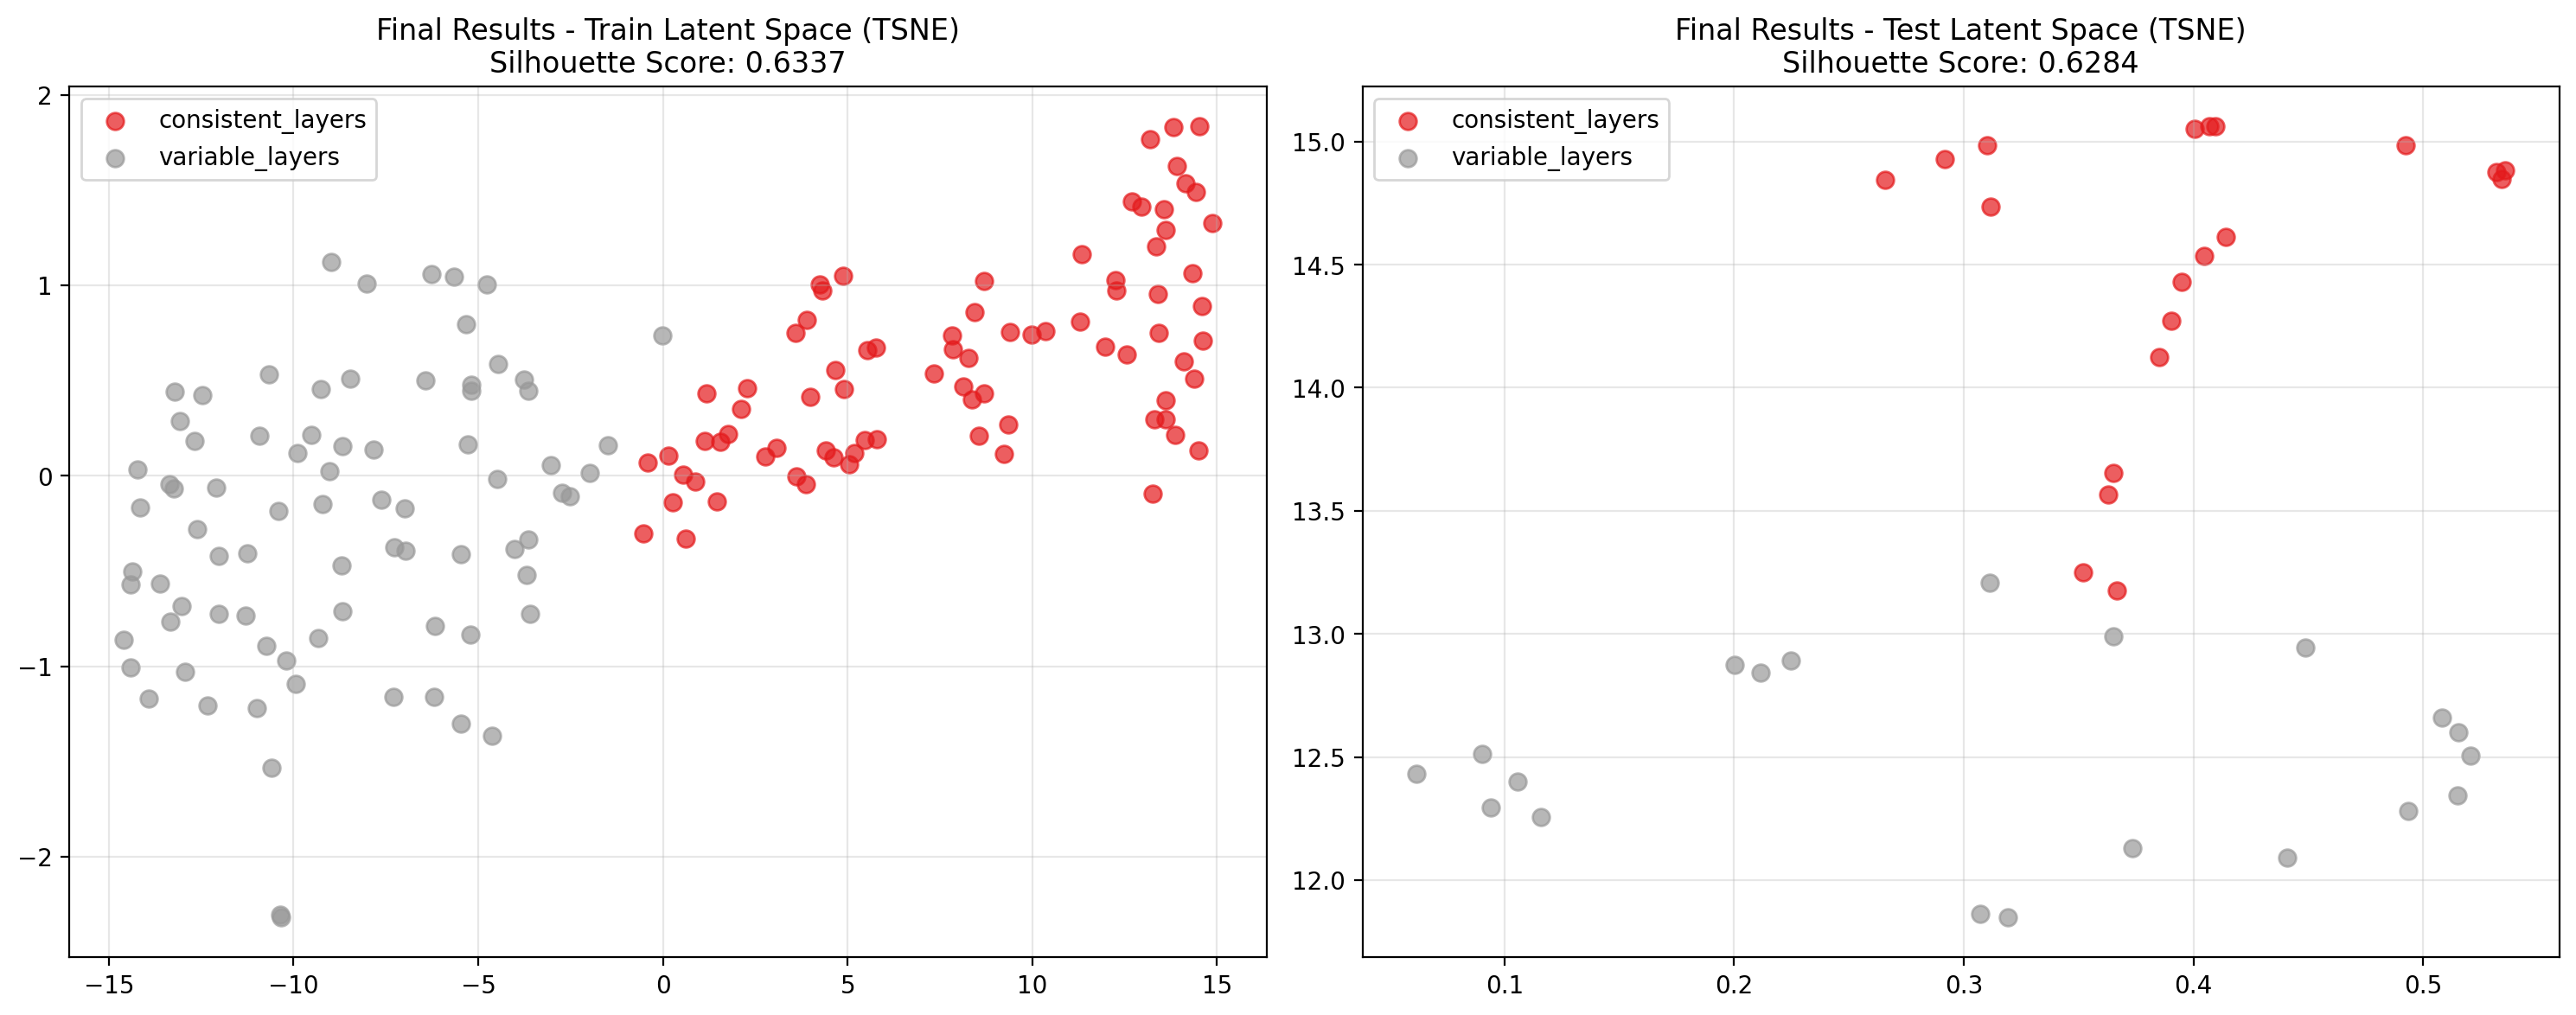

✅ FINAL VISUALIZATION COMPLETE

🎯 FINAL EXPERIMENT RESULTS
📊 Training Summary:
   • Model: SimpleLinearAutoencoder
   • Training Time: 4.03 seconds
   • Total Epochs: 2
   • Learning Rate: 0.001

📈 Final Loss Metrics:
   • Final Train Loss: 0.235716
   • Final Test Loss: 0.235522

🎯 Final Silhouette Scores (Latent Space Quality):
   • Training Data: 0.6337
   • Test Data: 0.6284
✅ Experiment Complete!

Model saved to demo_systematic_experiments_results\simple_linear_latent16_20250604_173836\simple_linear_latent16_20250604_173836_model.pth

🏗️ Testing architecture: deeper_linear
----------------------------------------
🧪 Experiment 3/4: deeper_linear (dim=8, lr=0.001)
Random seed set to 42 for reproducibility
Random seed set to 42 for reproducibility
ExperimentRunner initialized - Device: cpu, Output: demo_systematic_experiments_results\deeper_linear_latent8_20250604_173842
Training DeeperLinearAutoencoder for 2 epochs on cpu
Learning rate: 0.001
Selected visualization samples: 4 total 

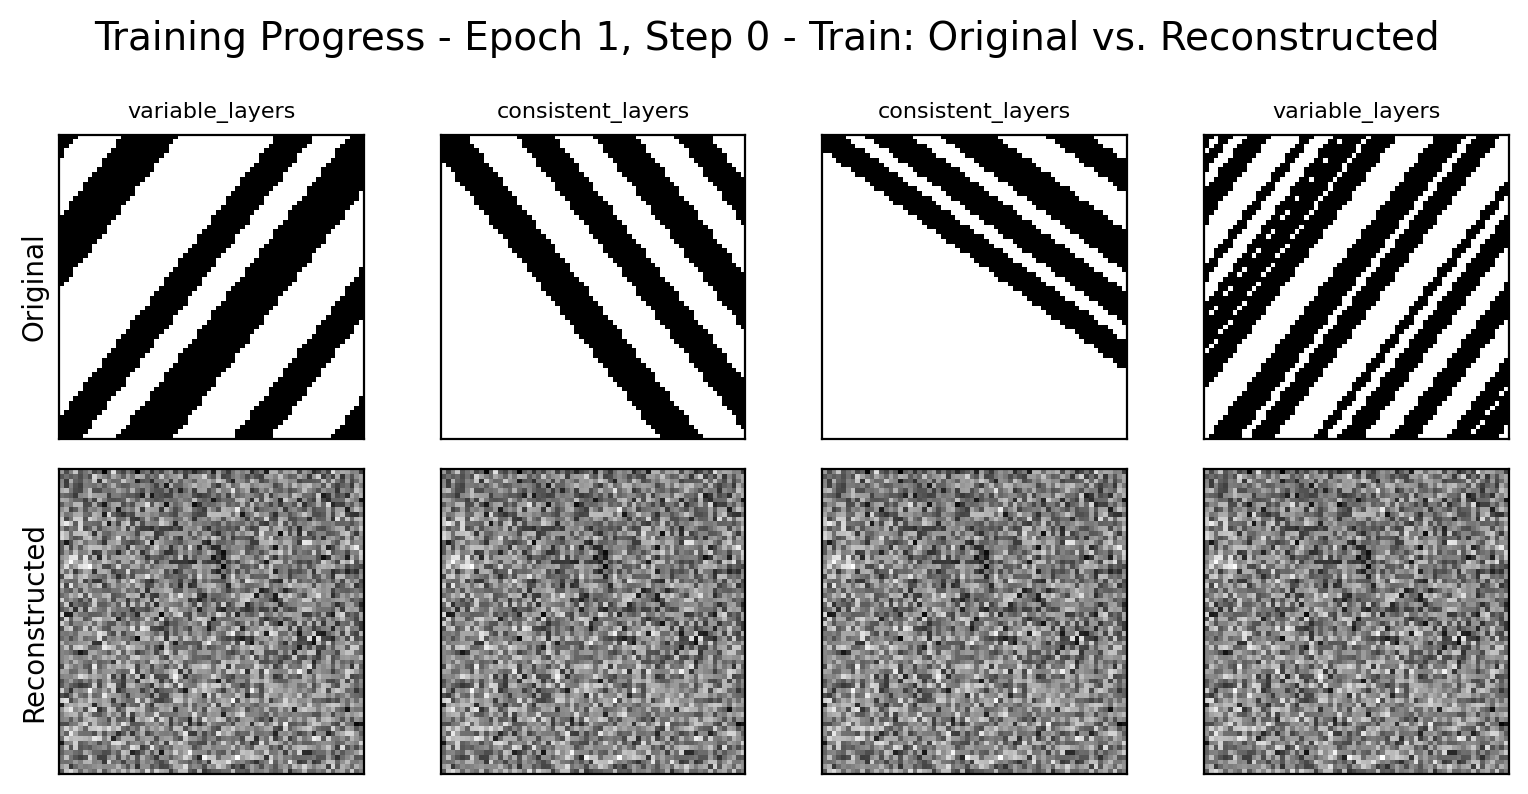

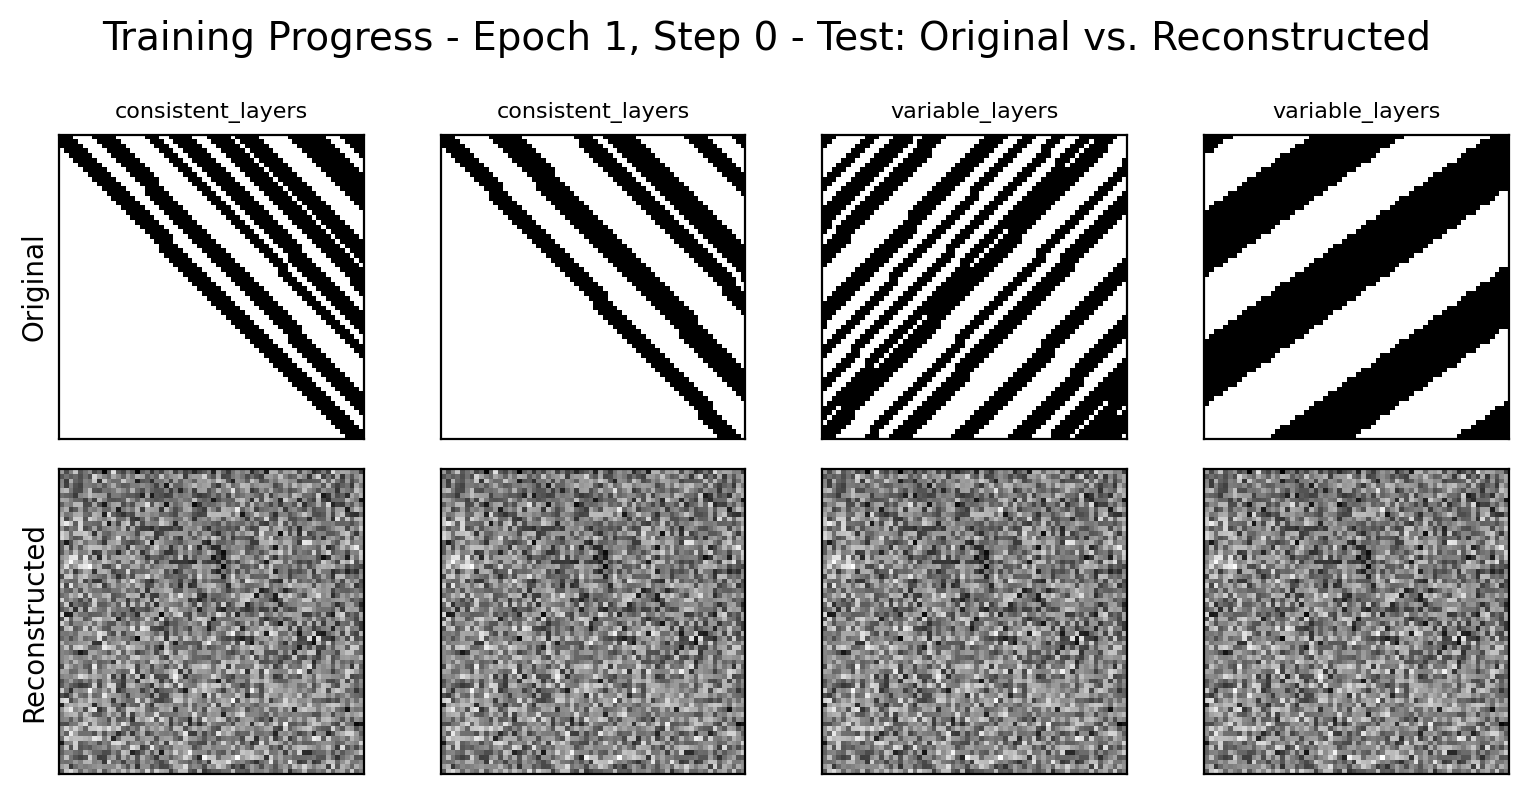

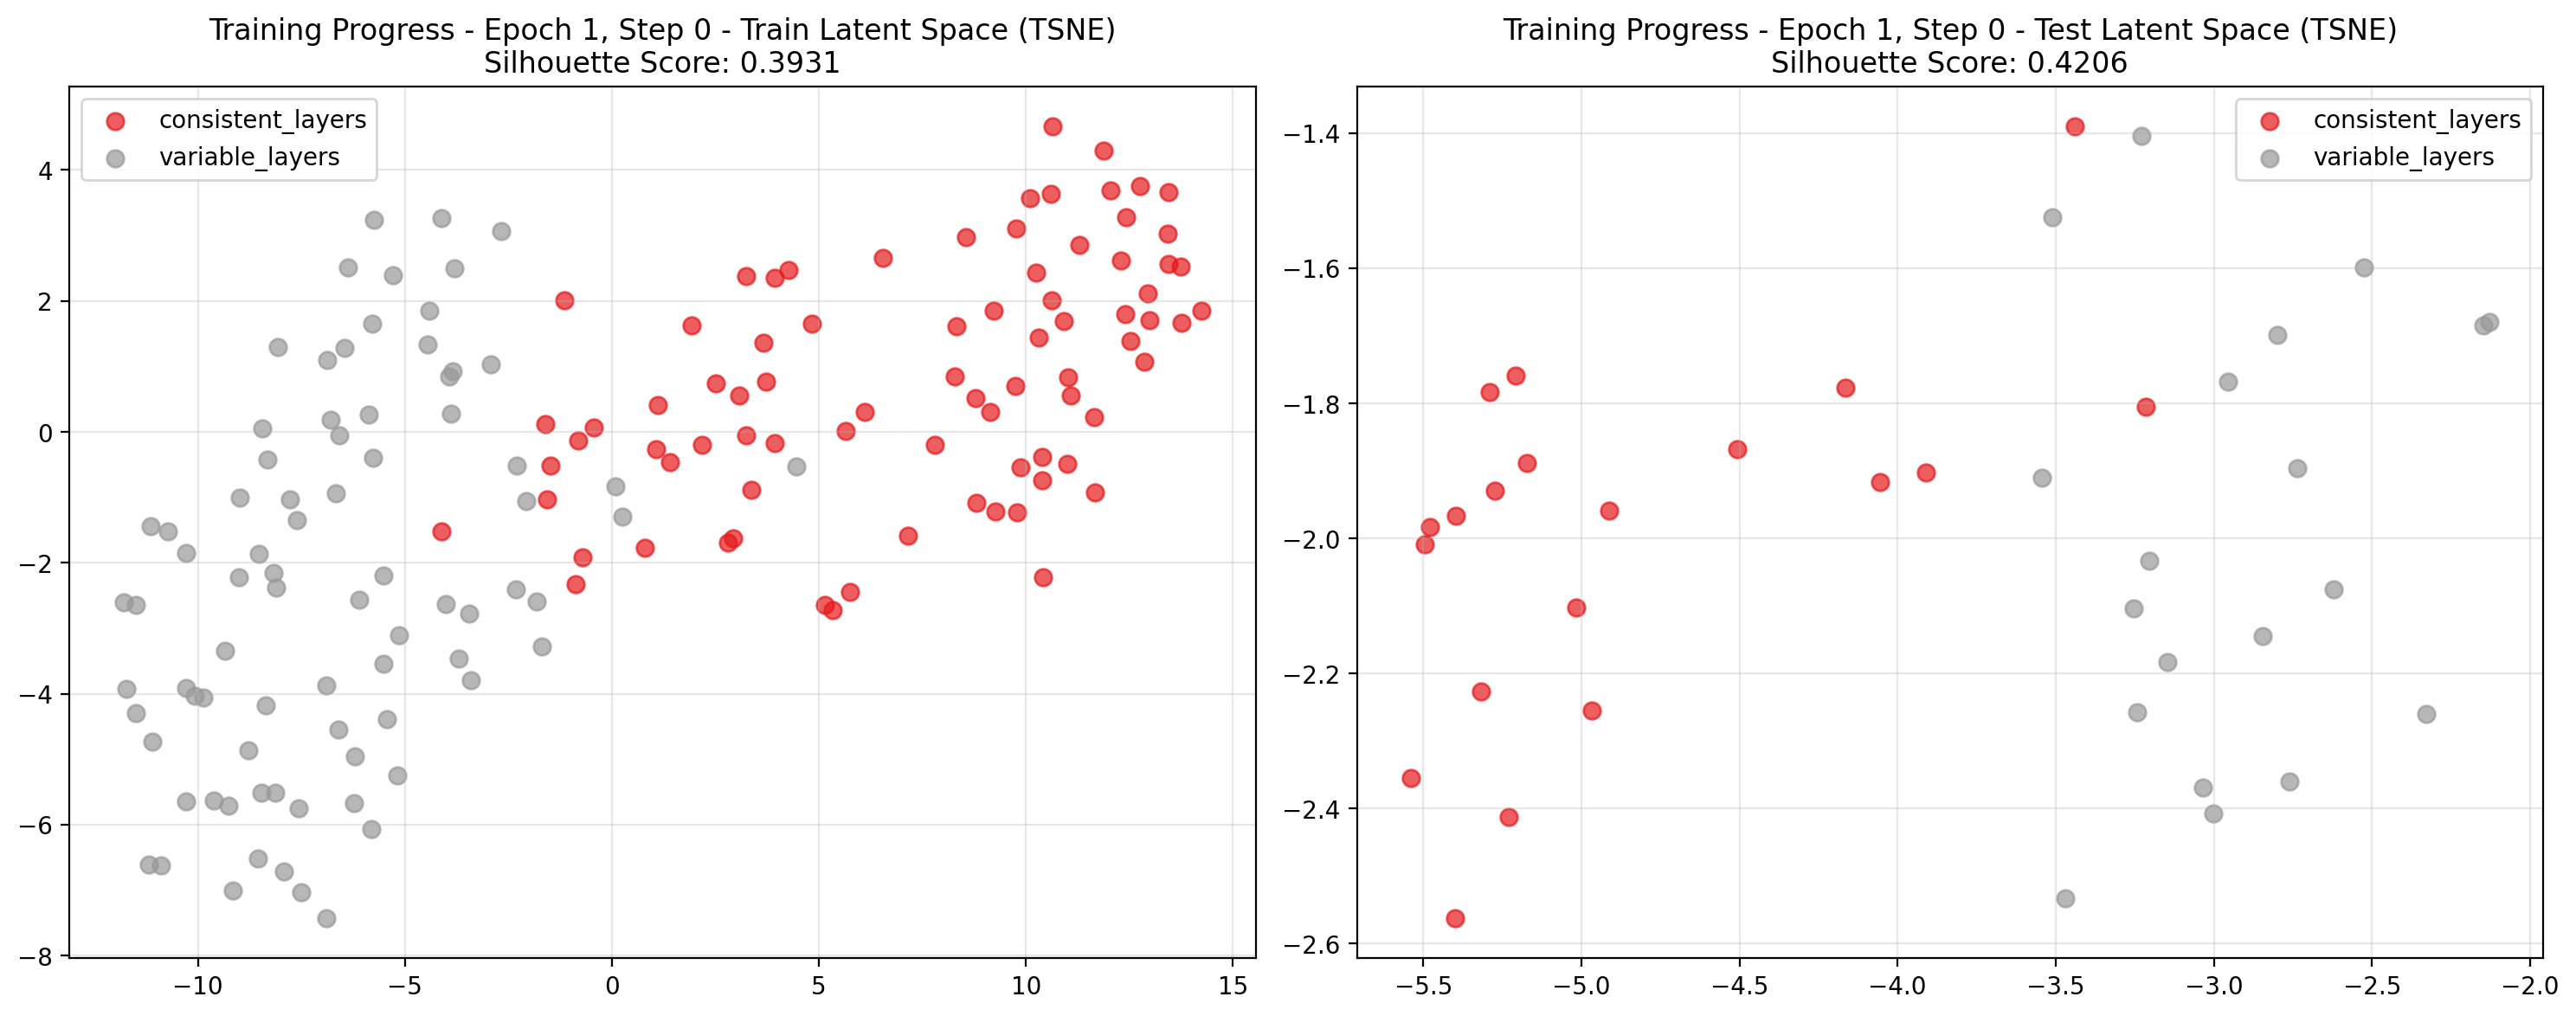

Epoch 1/2 completed | Train loss: 0.2489 | Test loss: 0.2455
Epoch: 2/2, Step: 0 | train loss: 0.2449 | test loss: 0.2425


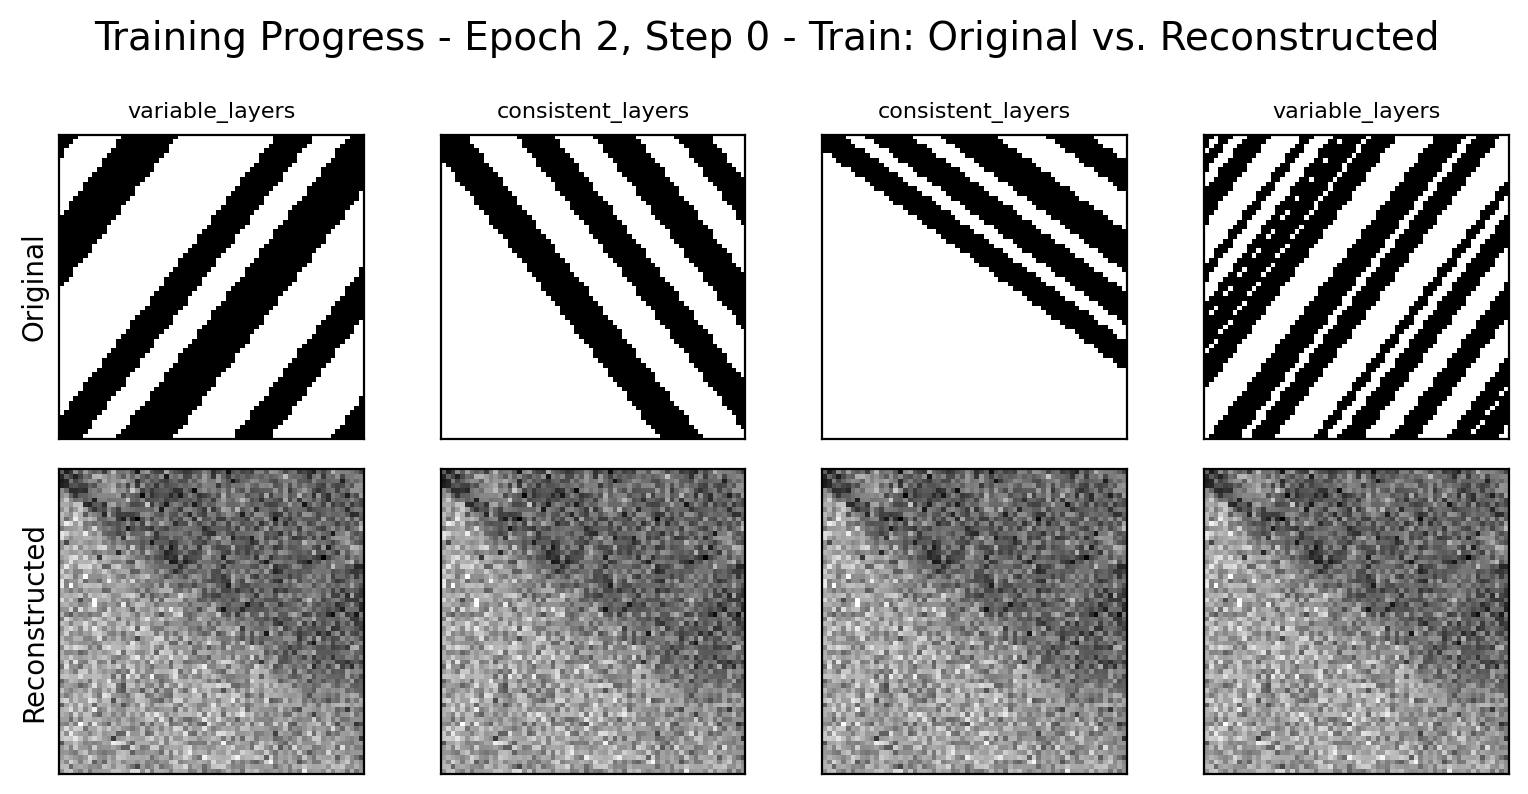

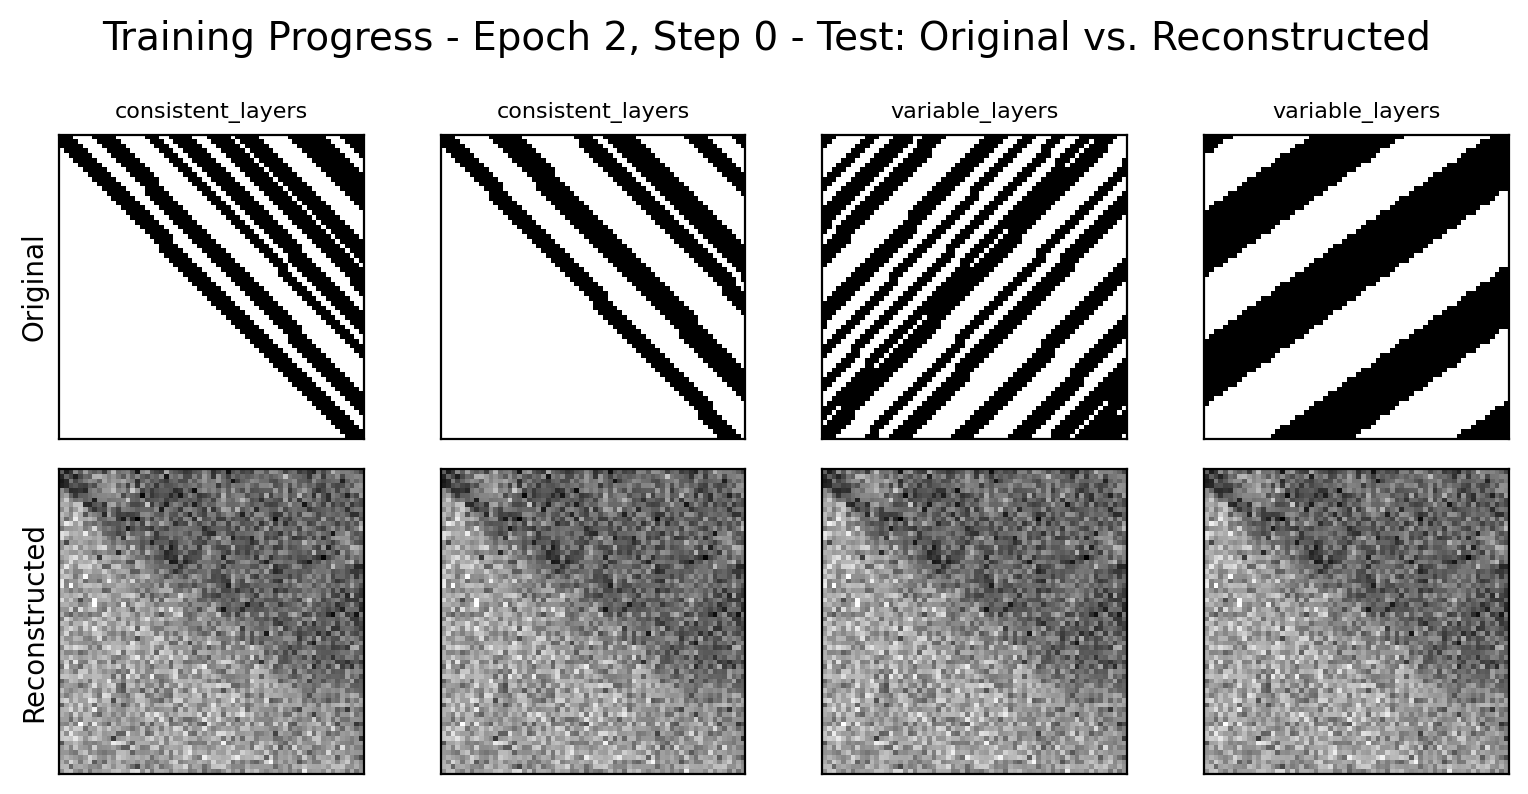

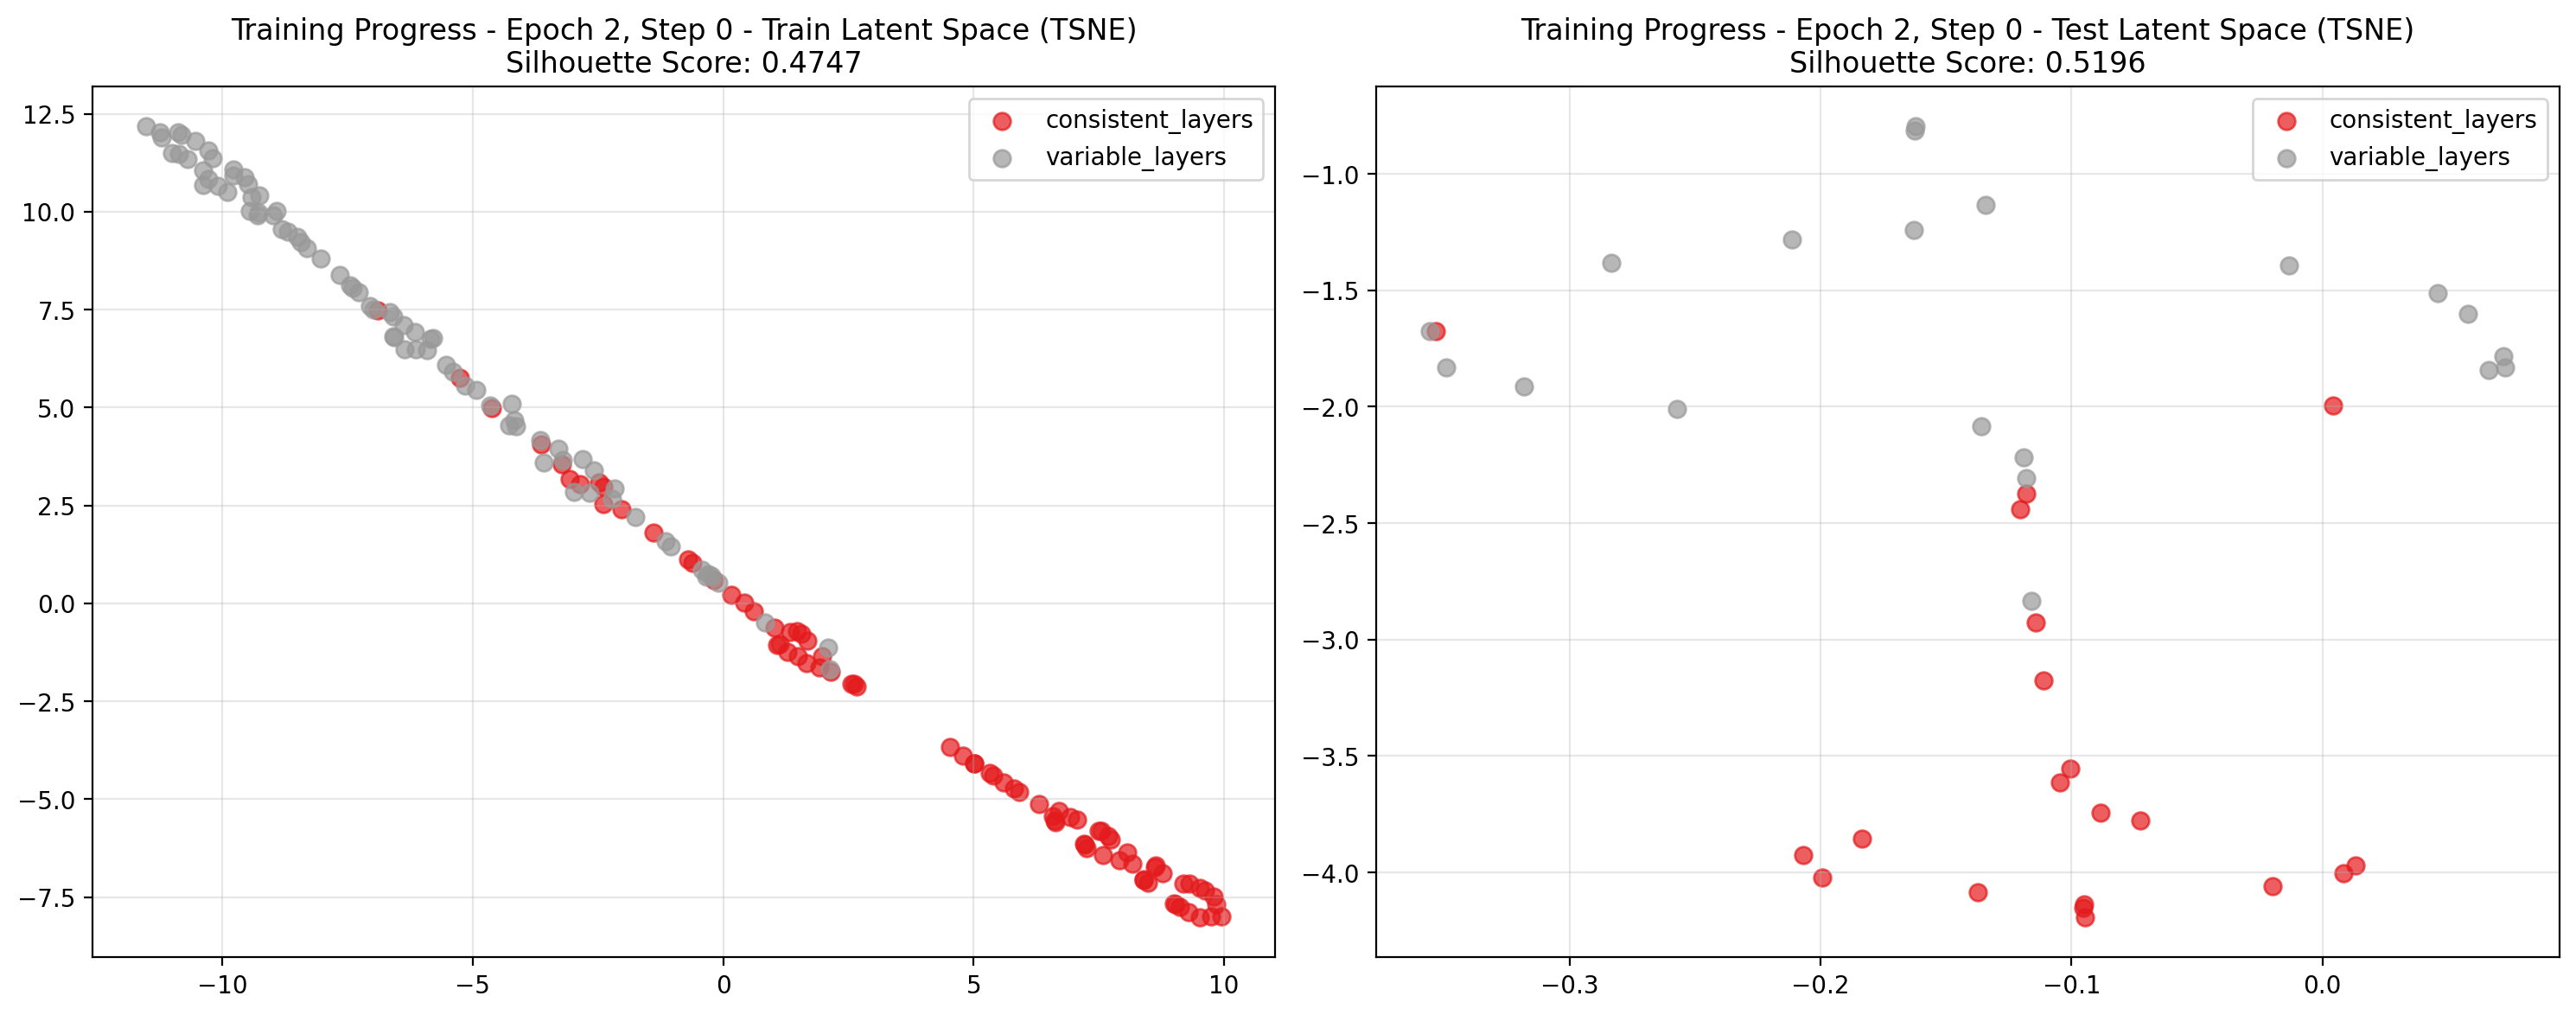

Performing final visualization at epoch 2/2, step 4
Epoch: 2/2, Step: 4 | train loss: 0.2328 | test loss: 0.2274
Epoch 2/2 completed | Train loss: 0.2379 | Test loss: 0.2274
Training completed in 4.04 seconds
Generating final latent space visualization and metrics

📊 FINAL VISUALIZATION GENERATION
Generating final reconstruction visualizations...


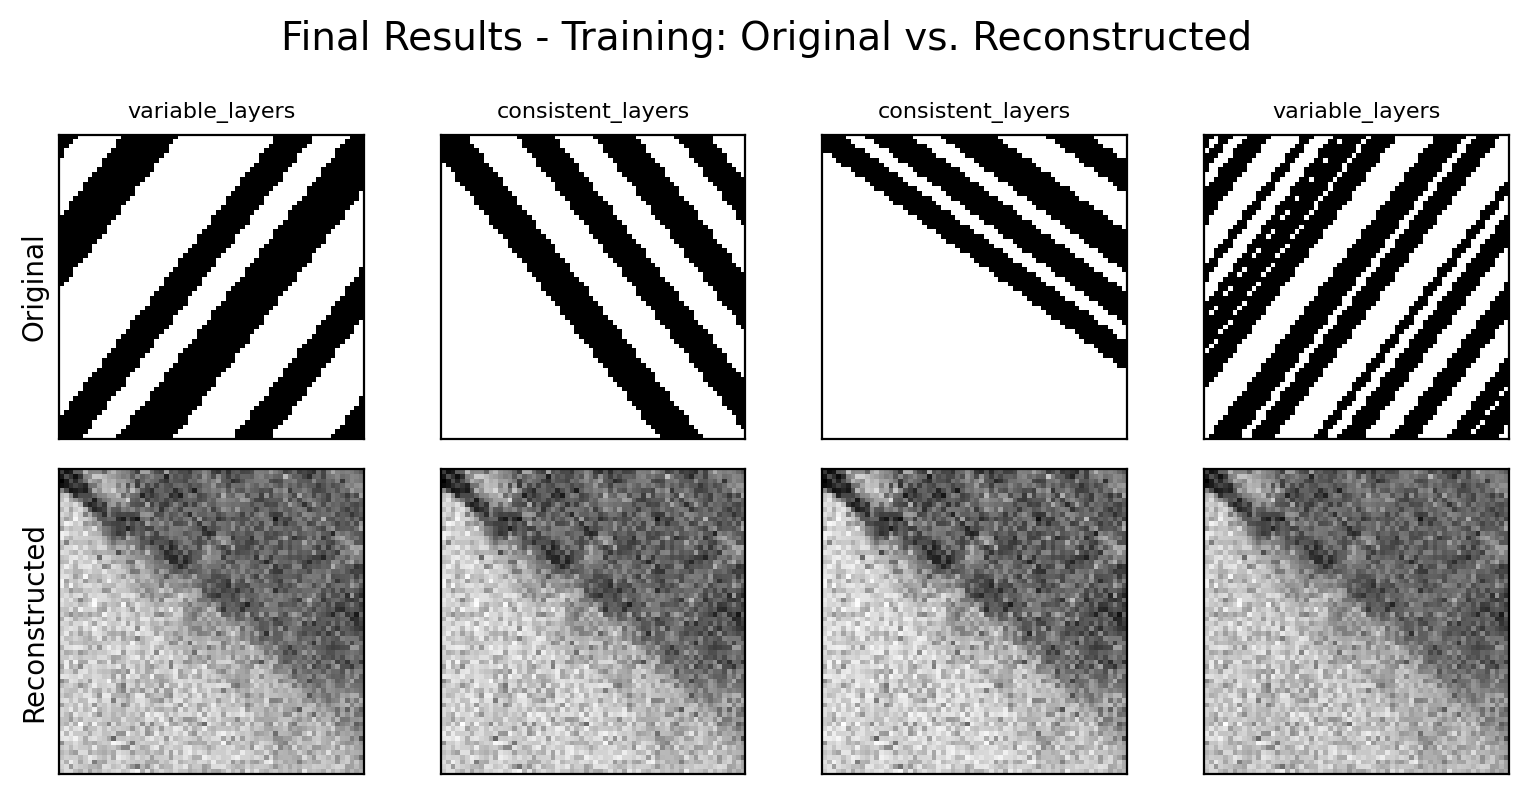

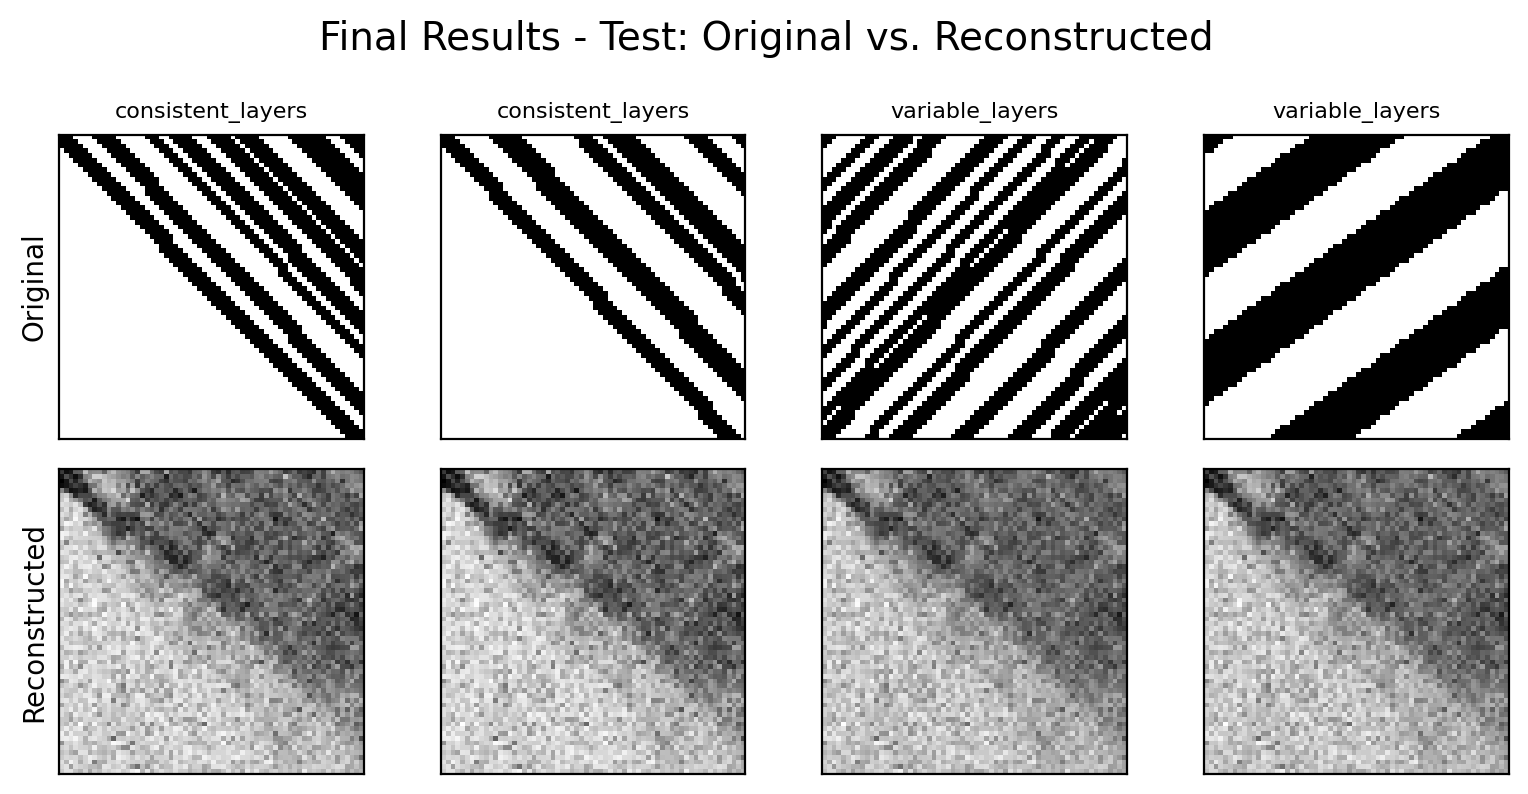

Generating final latent space analysis...


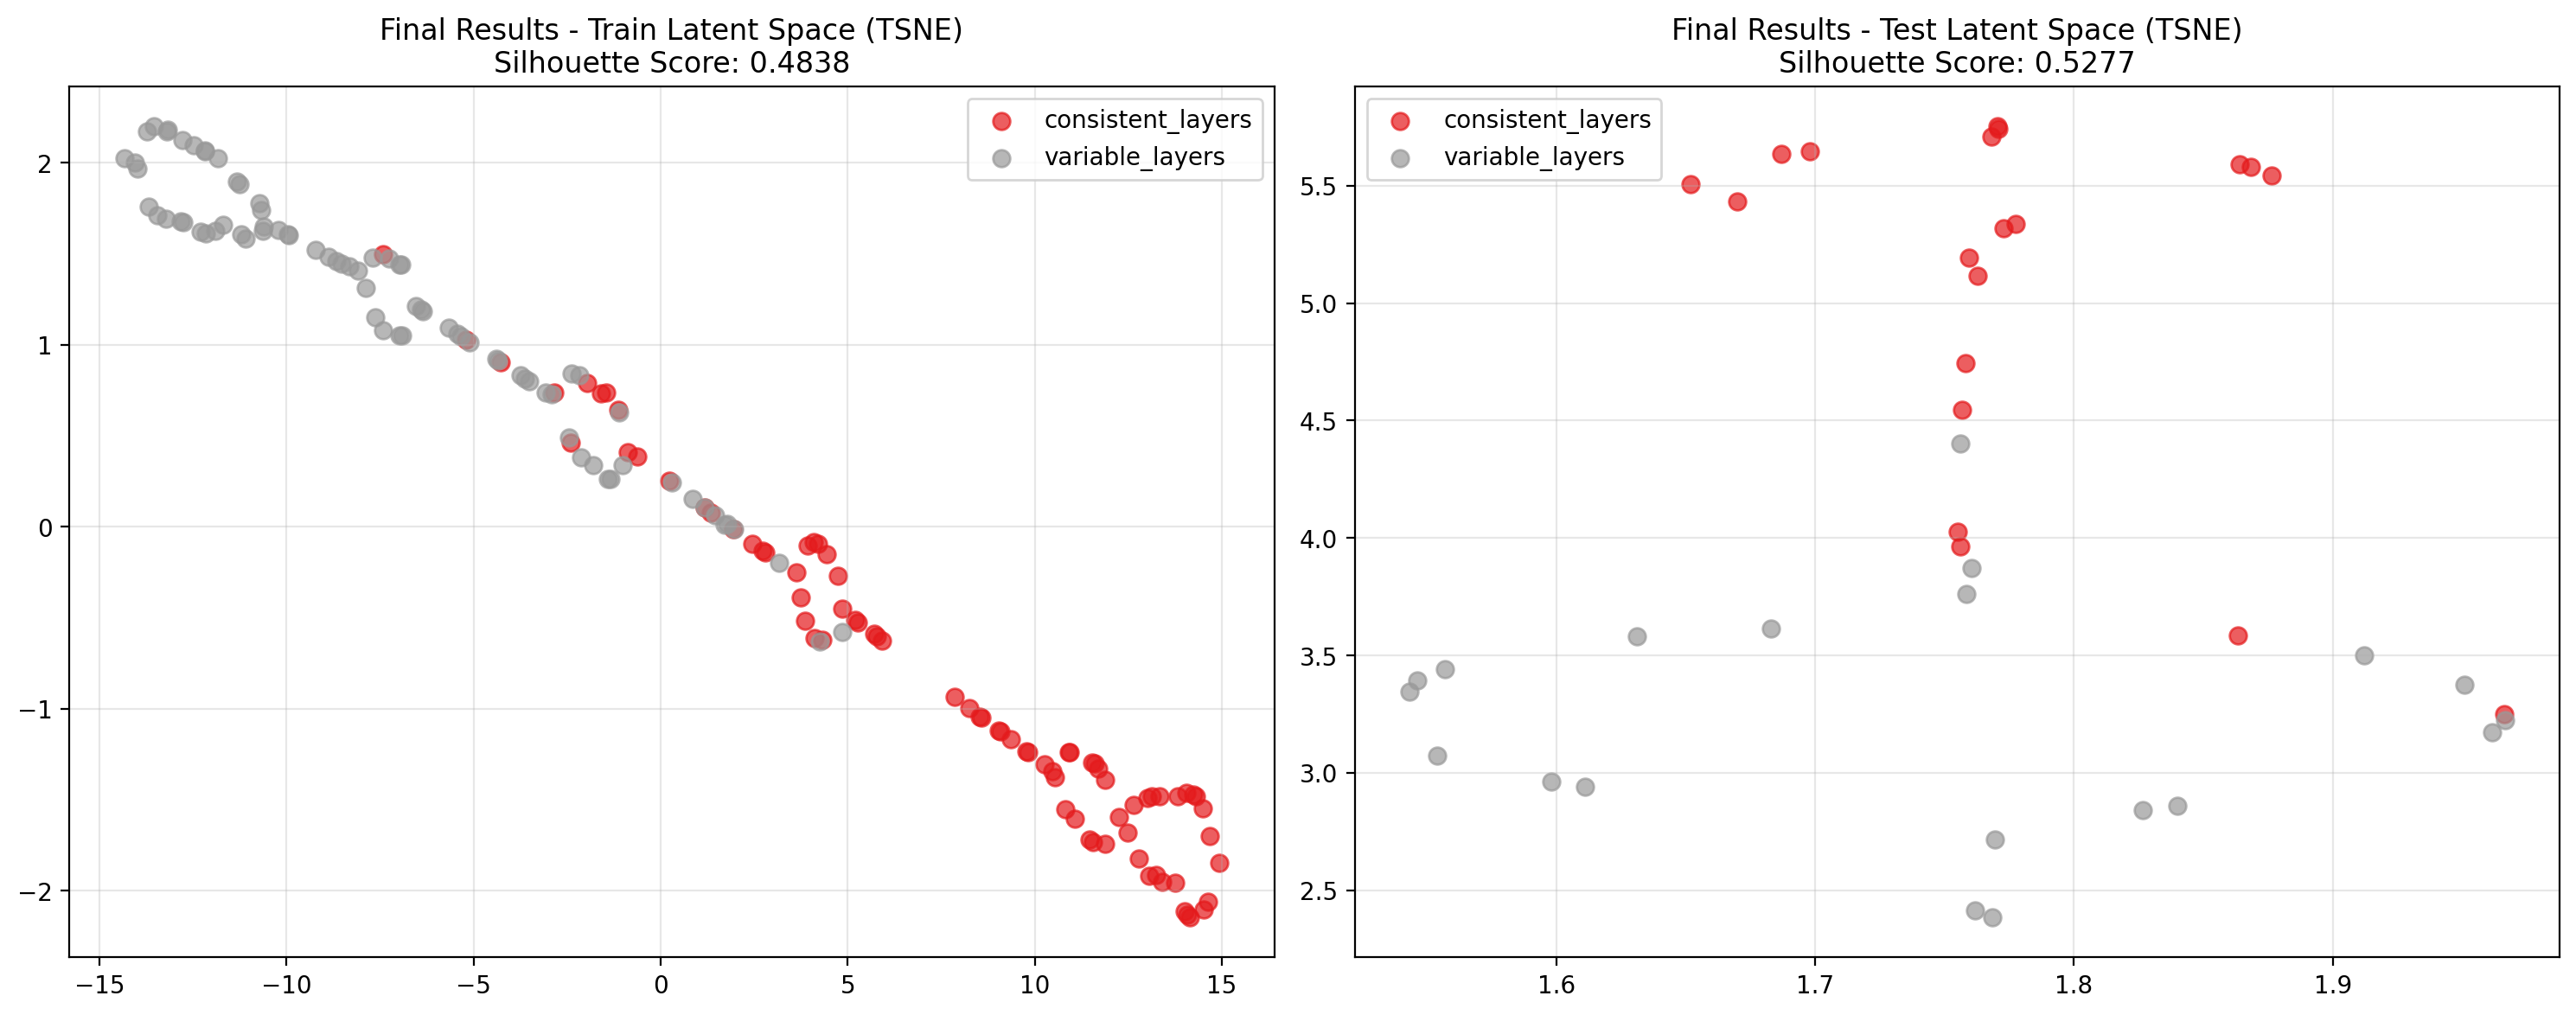

✅ FINAL VISUALIZATION COMPLETE

🎯 FINAL EXPERIMENT RESULTS
📊 Training Summary:
   • Model: DeeperLinearAutoencoder
   • Training Time: 4.04 seconds
   • Total Epochs: 2
   • Learning Rate: 0.001

📈 Final Loss Metrics:
   • Final Train Loss: 0.227932
   • Final Test Loss: 0.227409

🎯 Final Silhouette Scores (Latent Space Quality):
   • Training Data: 0.4838
   • Test Data: 0.5277
✅ Experiment Complete!

Model saved to demo_systematic_experiments_results\deeper_linear_latent8_20250604_173842\deeper_linear_latent8_20250604_173842_model.pth
🧪 Experiment 4/4: deeper_linear (dim=16, lr=0.001)
Random seed set to 42 for reproducibility
Random seed set to 42 for reproducibility
ExperimentRunner initialized - Device: cpu, Output: demo_systematic_experiments_results\deeper_linear_latent16_20250604_173848
Training DeeperLinearAutoencoder for 2 epochs on cpu
Learning rate: 0.001
Selected visualization samples: 4 total (2 per class)
  consistent_layers: indices [0, 1]
  variable_layers: indices [20,

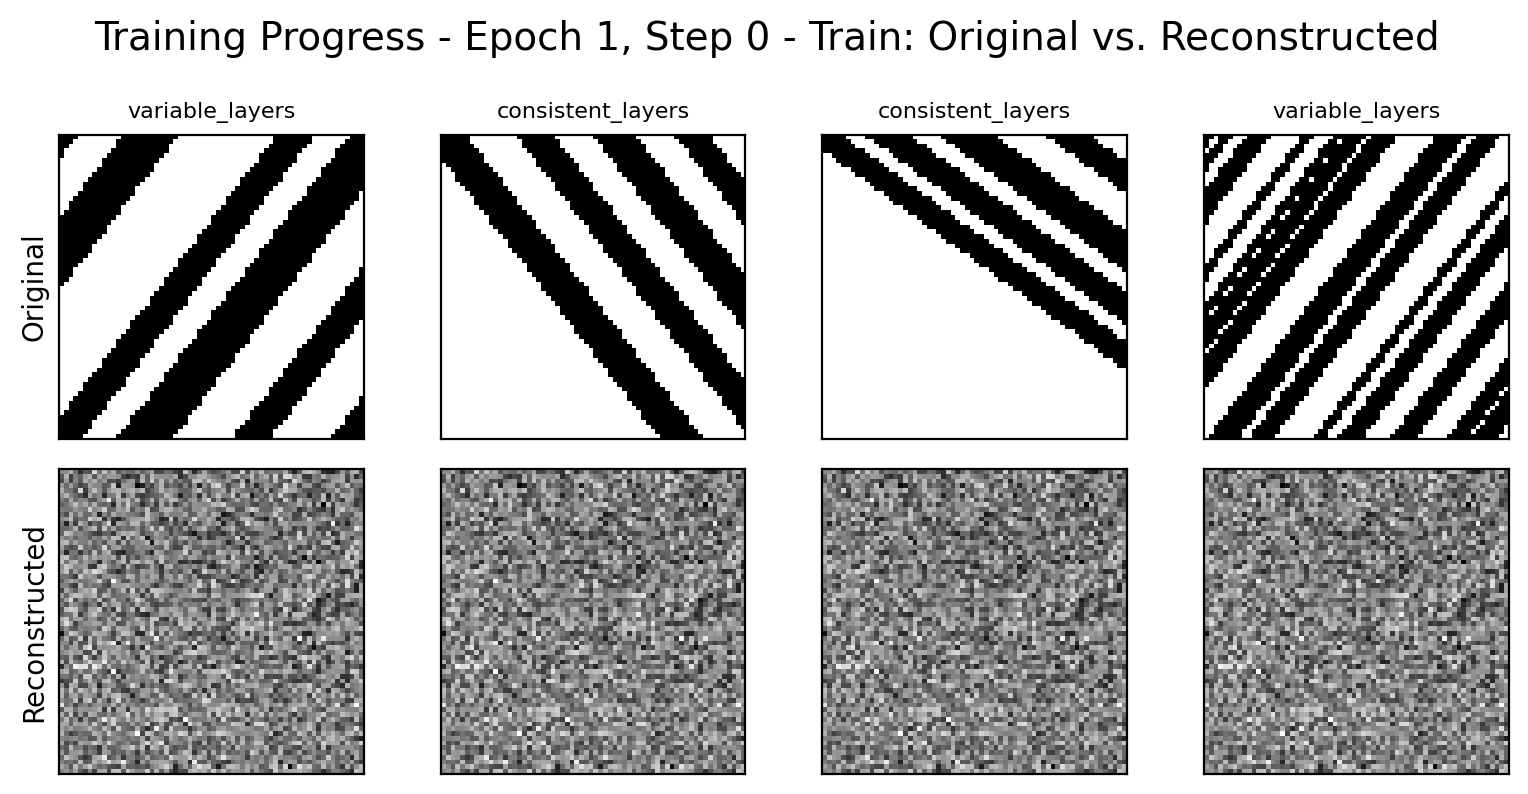

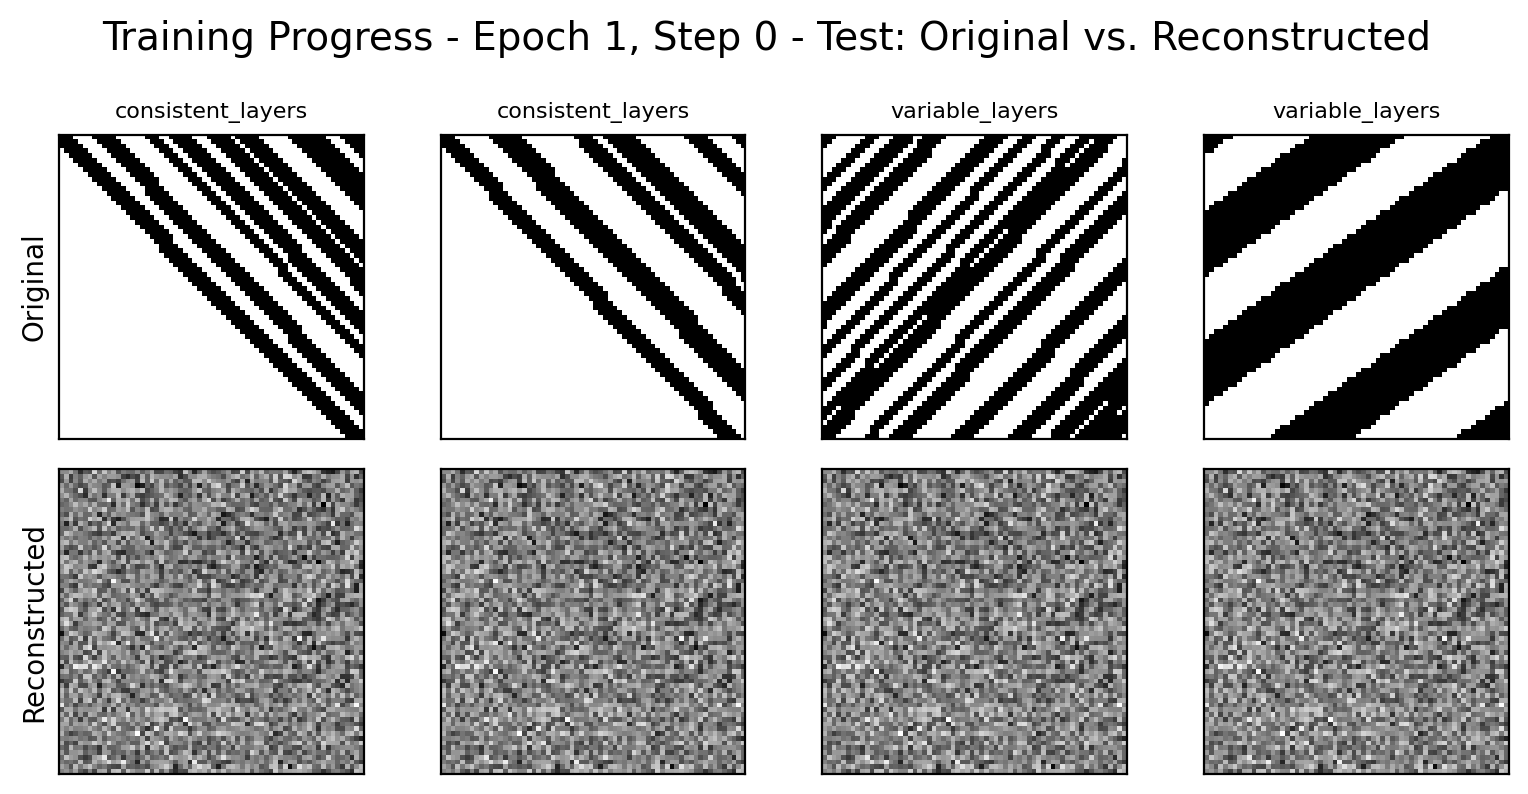

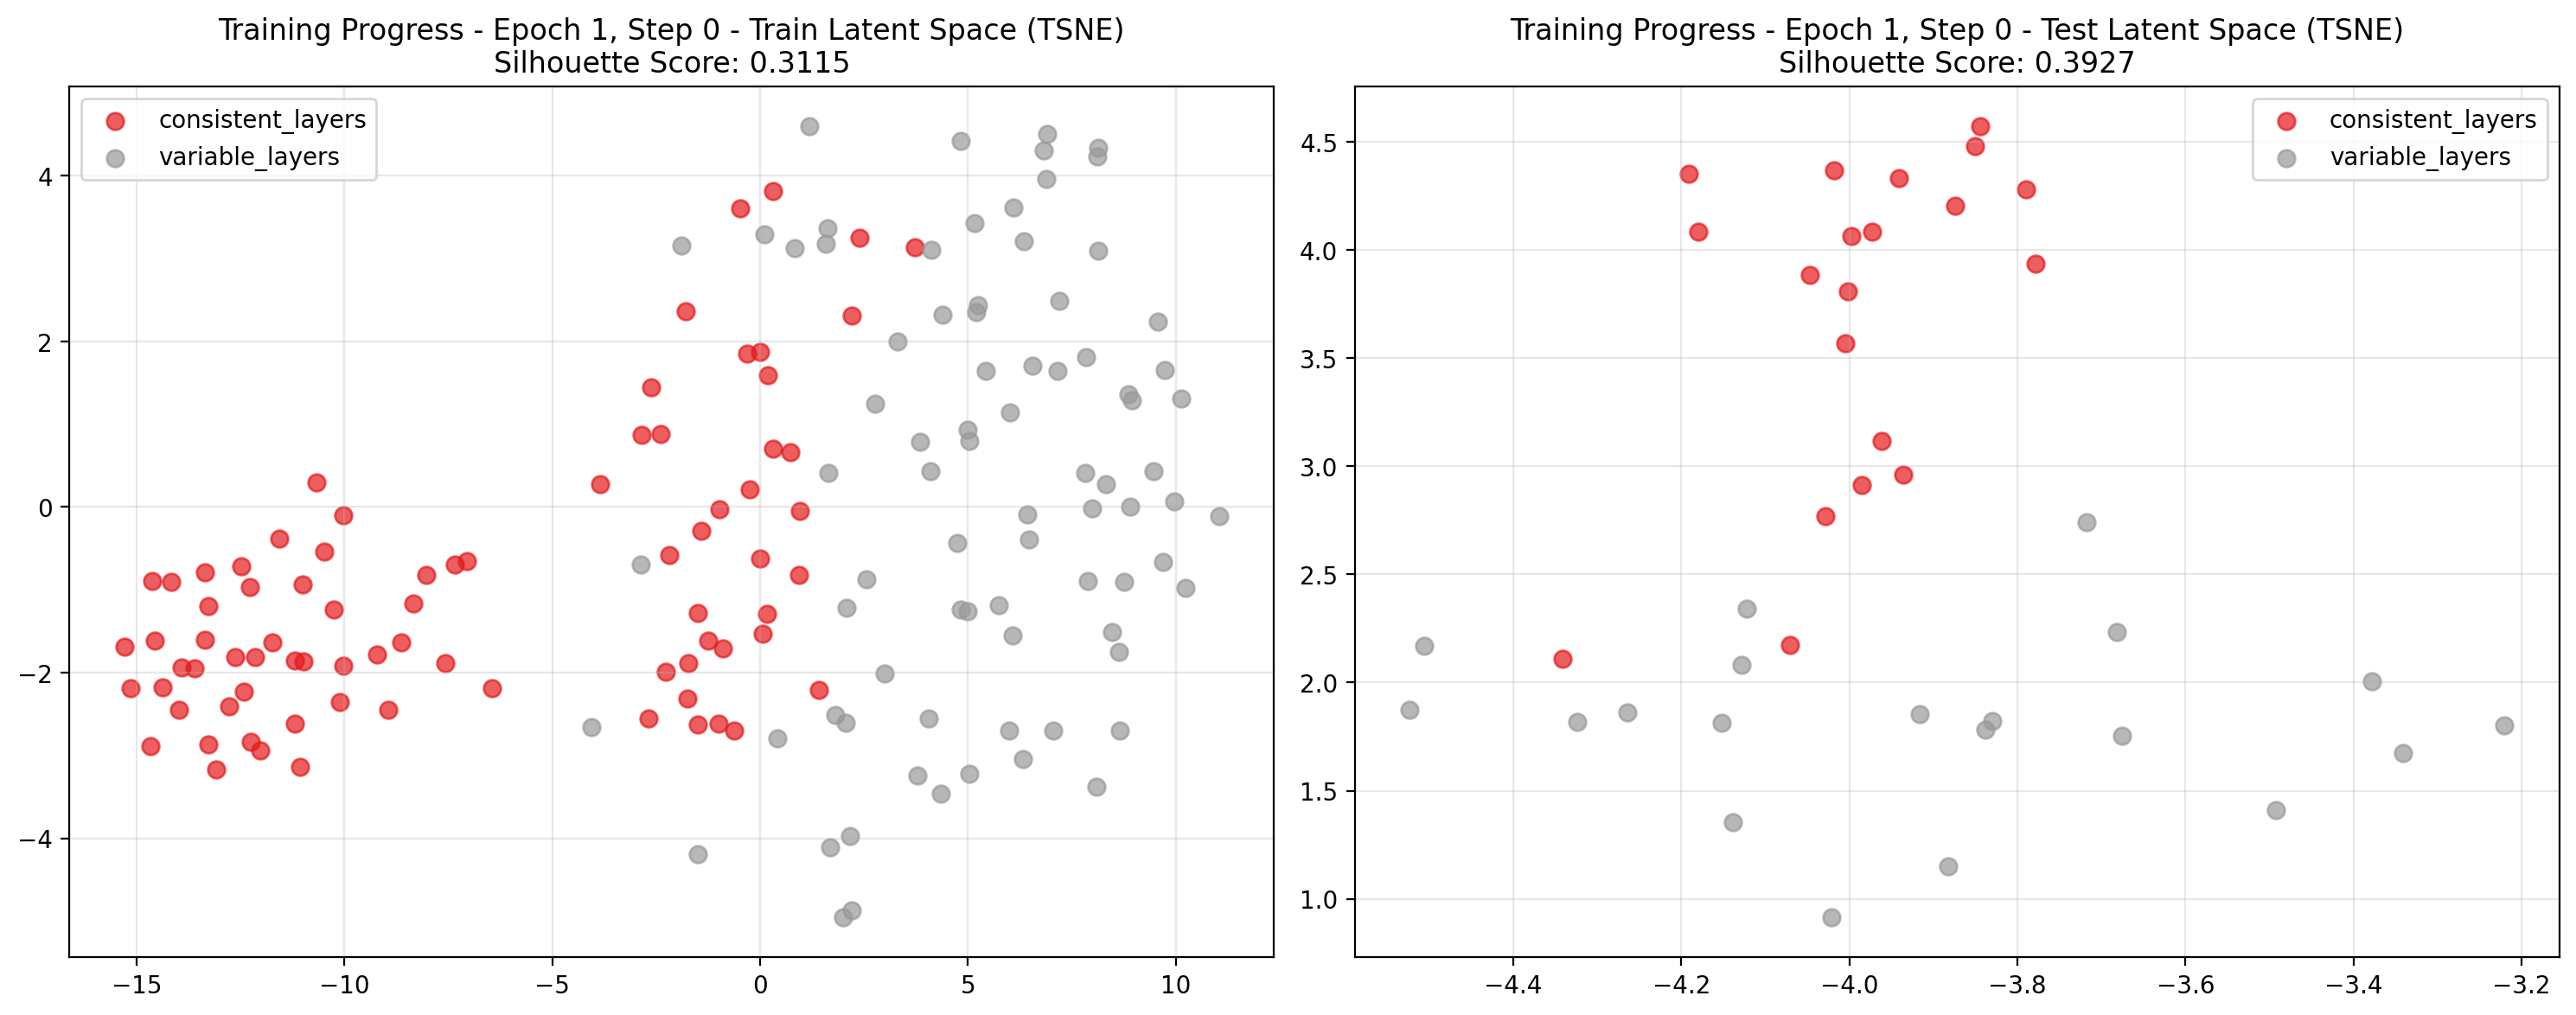

Epoch 1/2 completed | Train loss: 0.2488 | Test loss: 0.2442
Epoch: 2/2, Step: 0 | train loss: 0.2437 | test loss: 0.2400


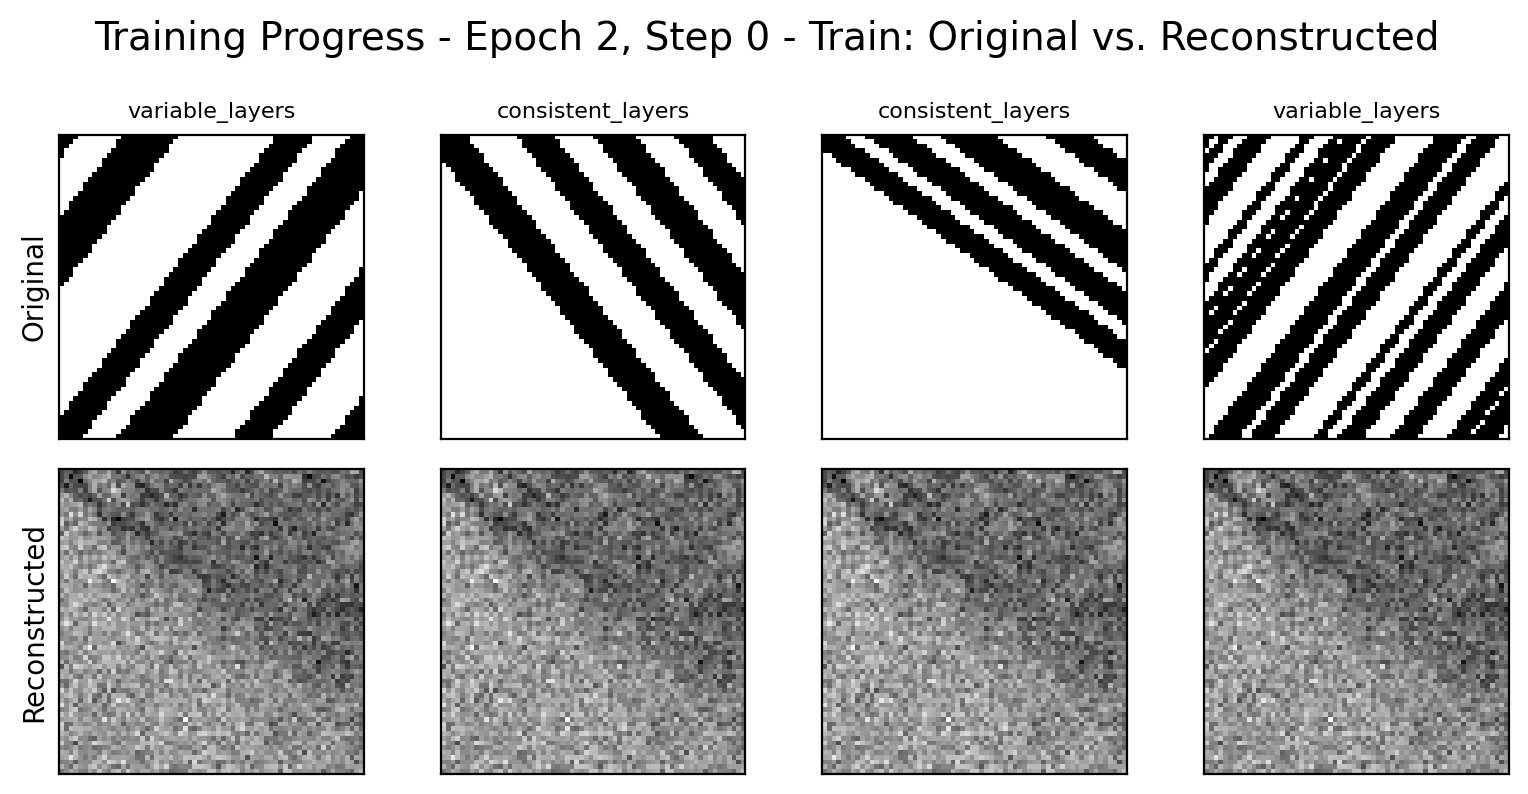

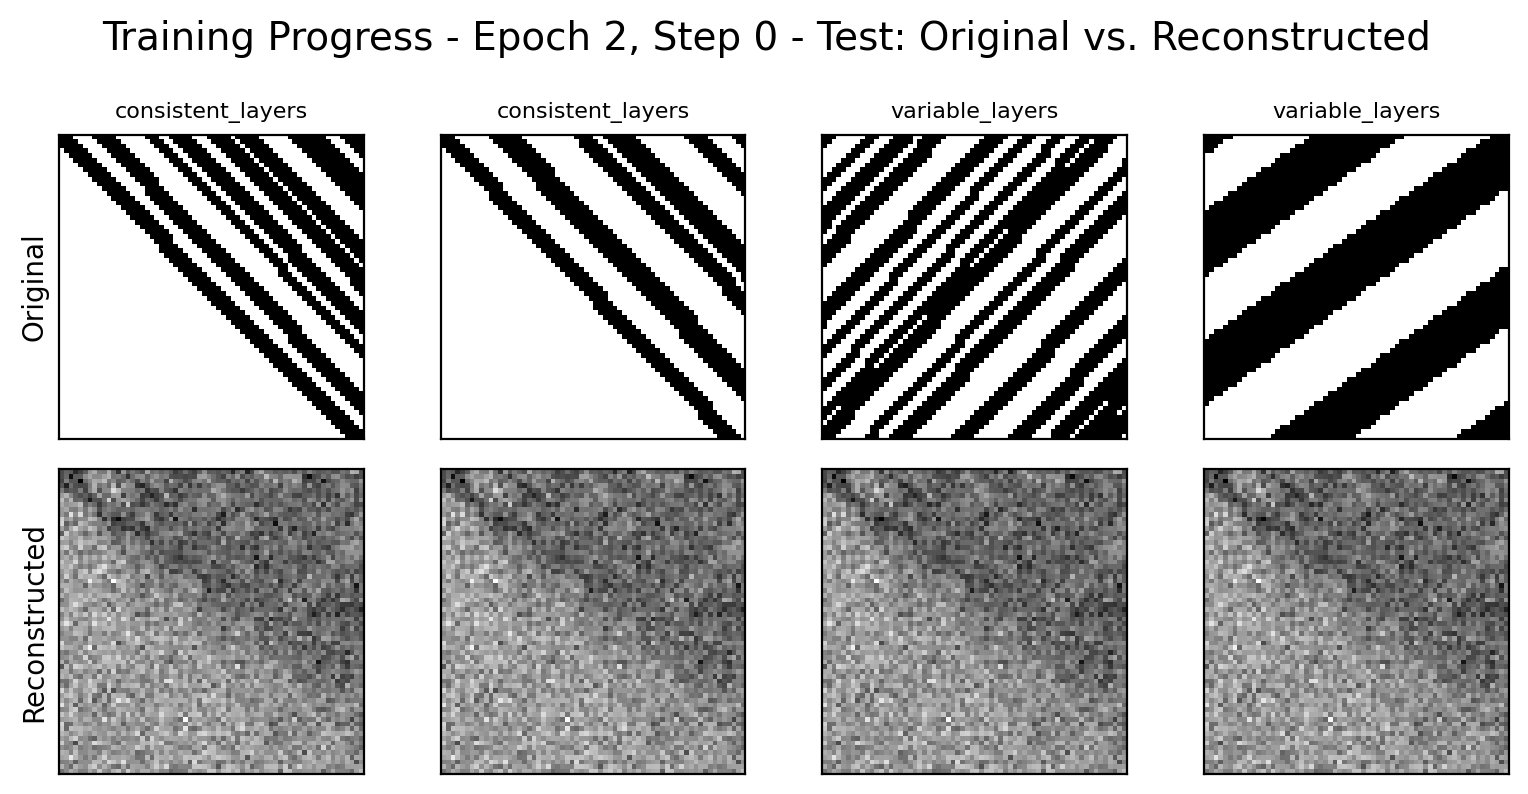

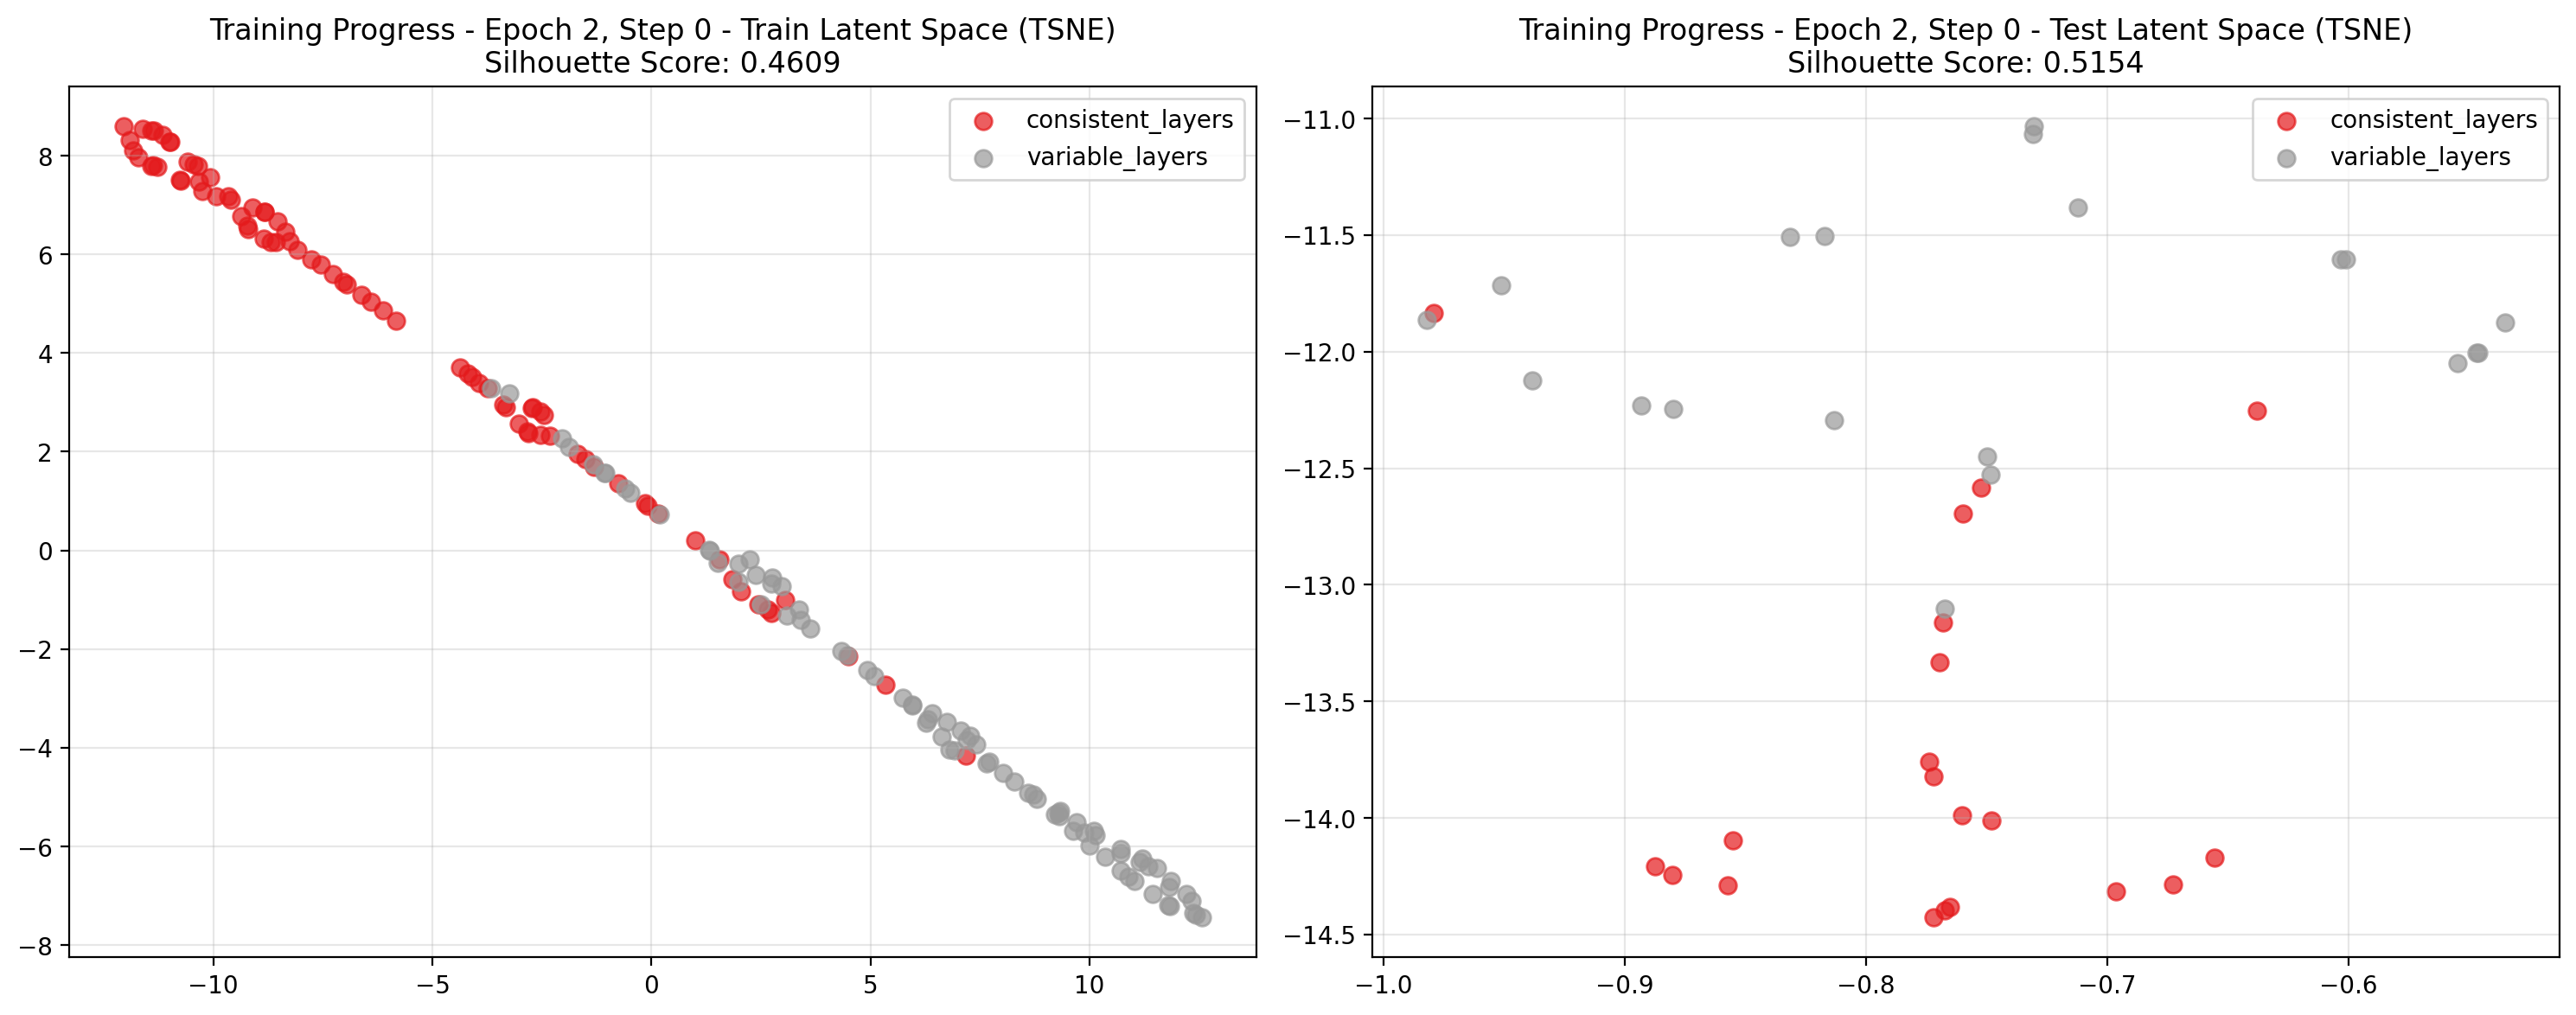

Performing final visualization at epoch 2/2, step 4
Epoch: 2/2, Step: 4 | train loss: 0.2356 | test loss: 0.2274
Epoch 2/2 completed | Train loss: 0.2365 | Test loss: 0.2274
Training completed in 3.95 seconds
Generating final latent space visualization and metrics

📊 FINAL VISUALIZATION GENERATION
Generating final reconstruction visualizations...


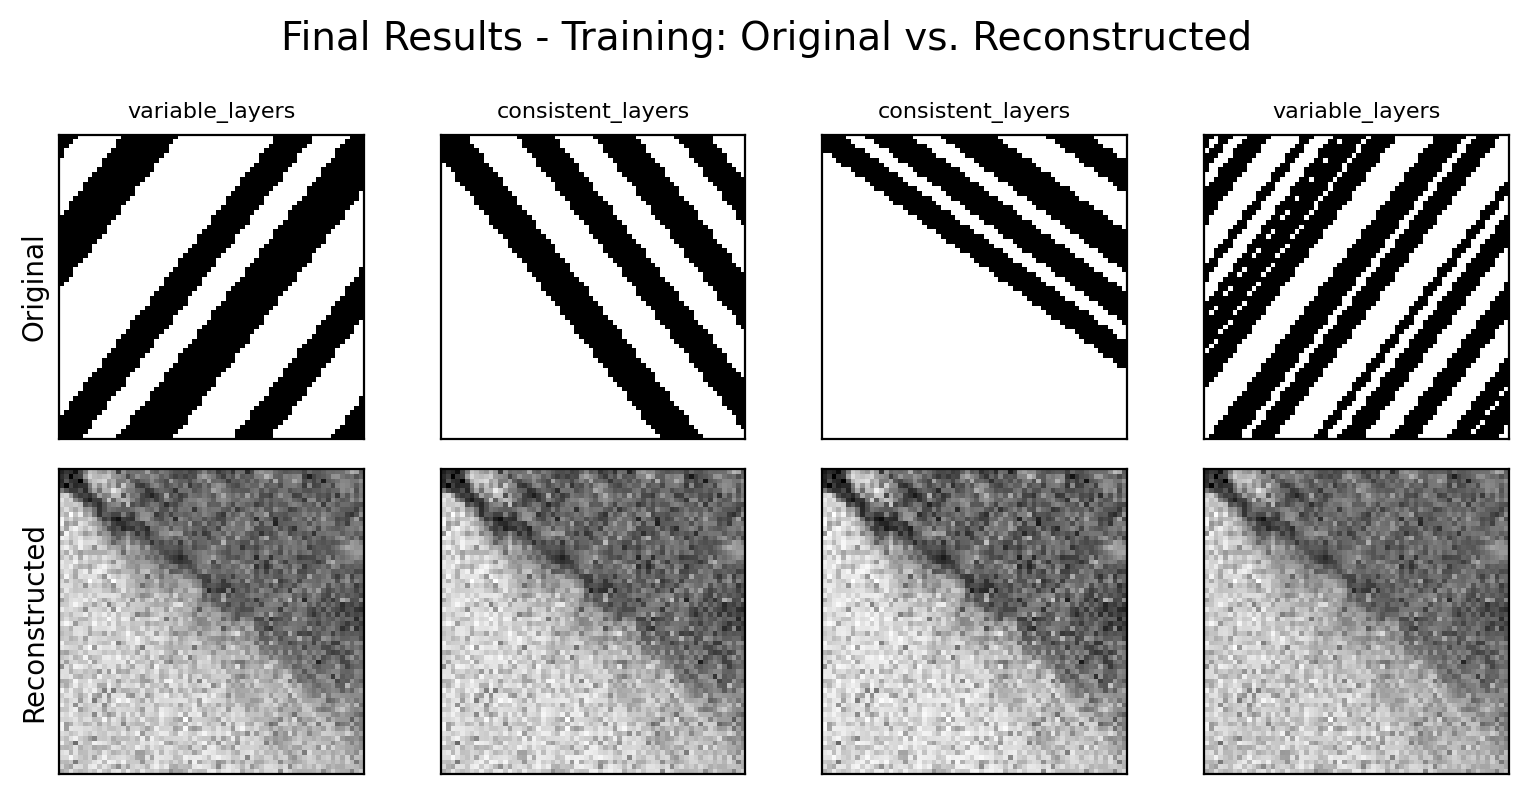

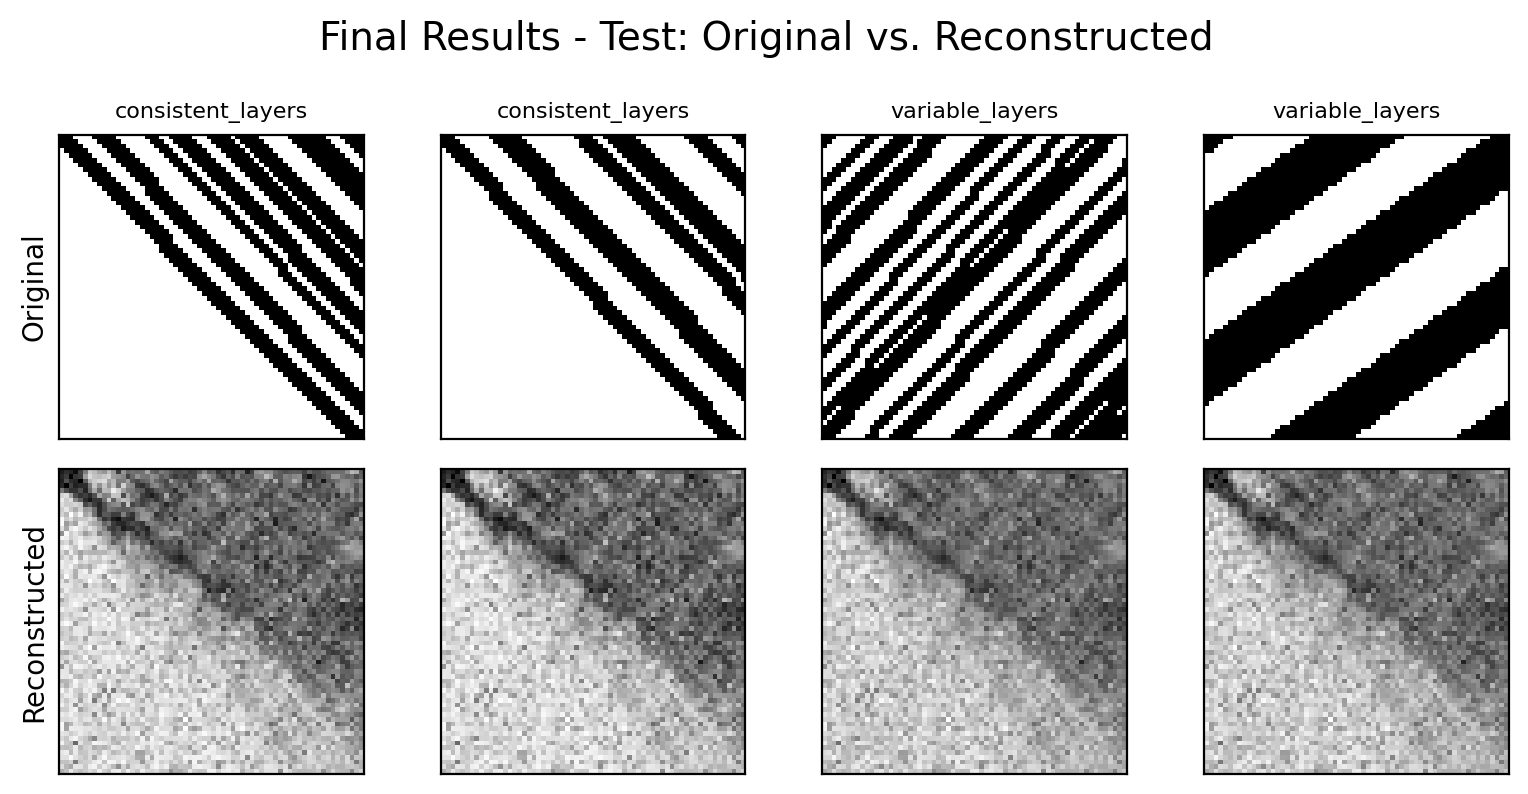

Generating final latent space analysis...


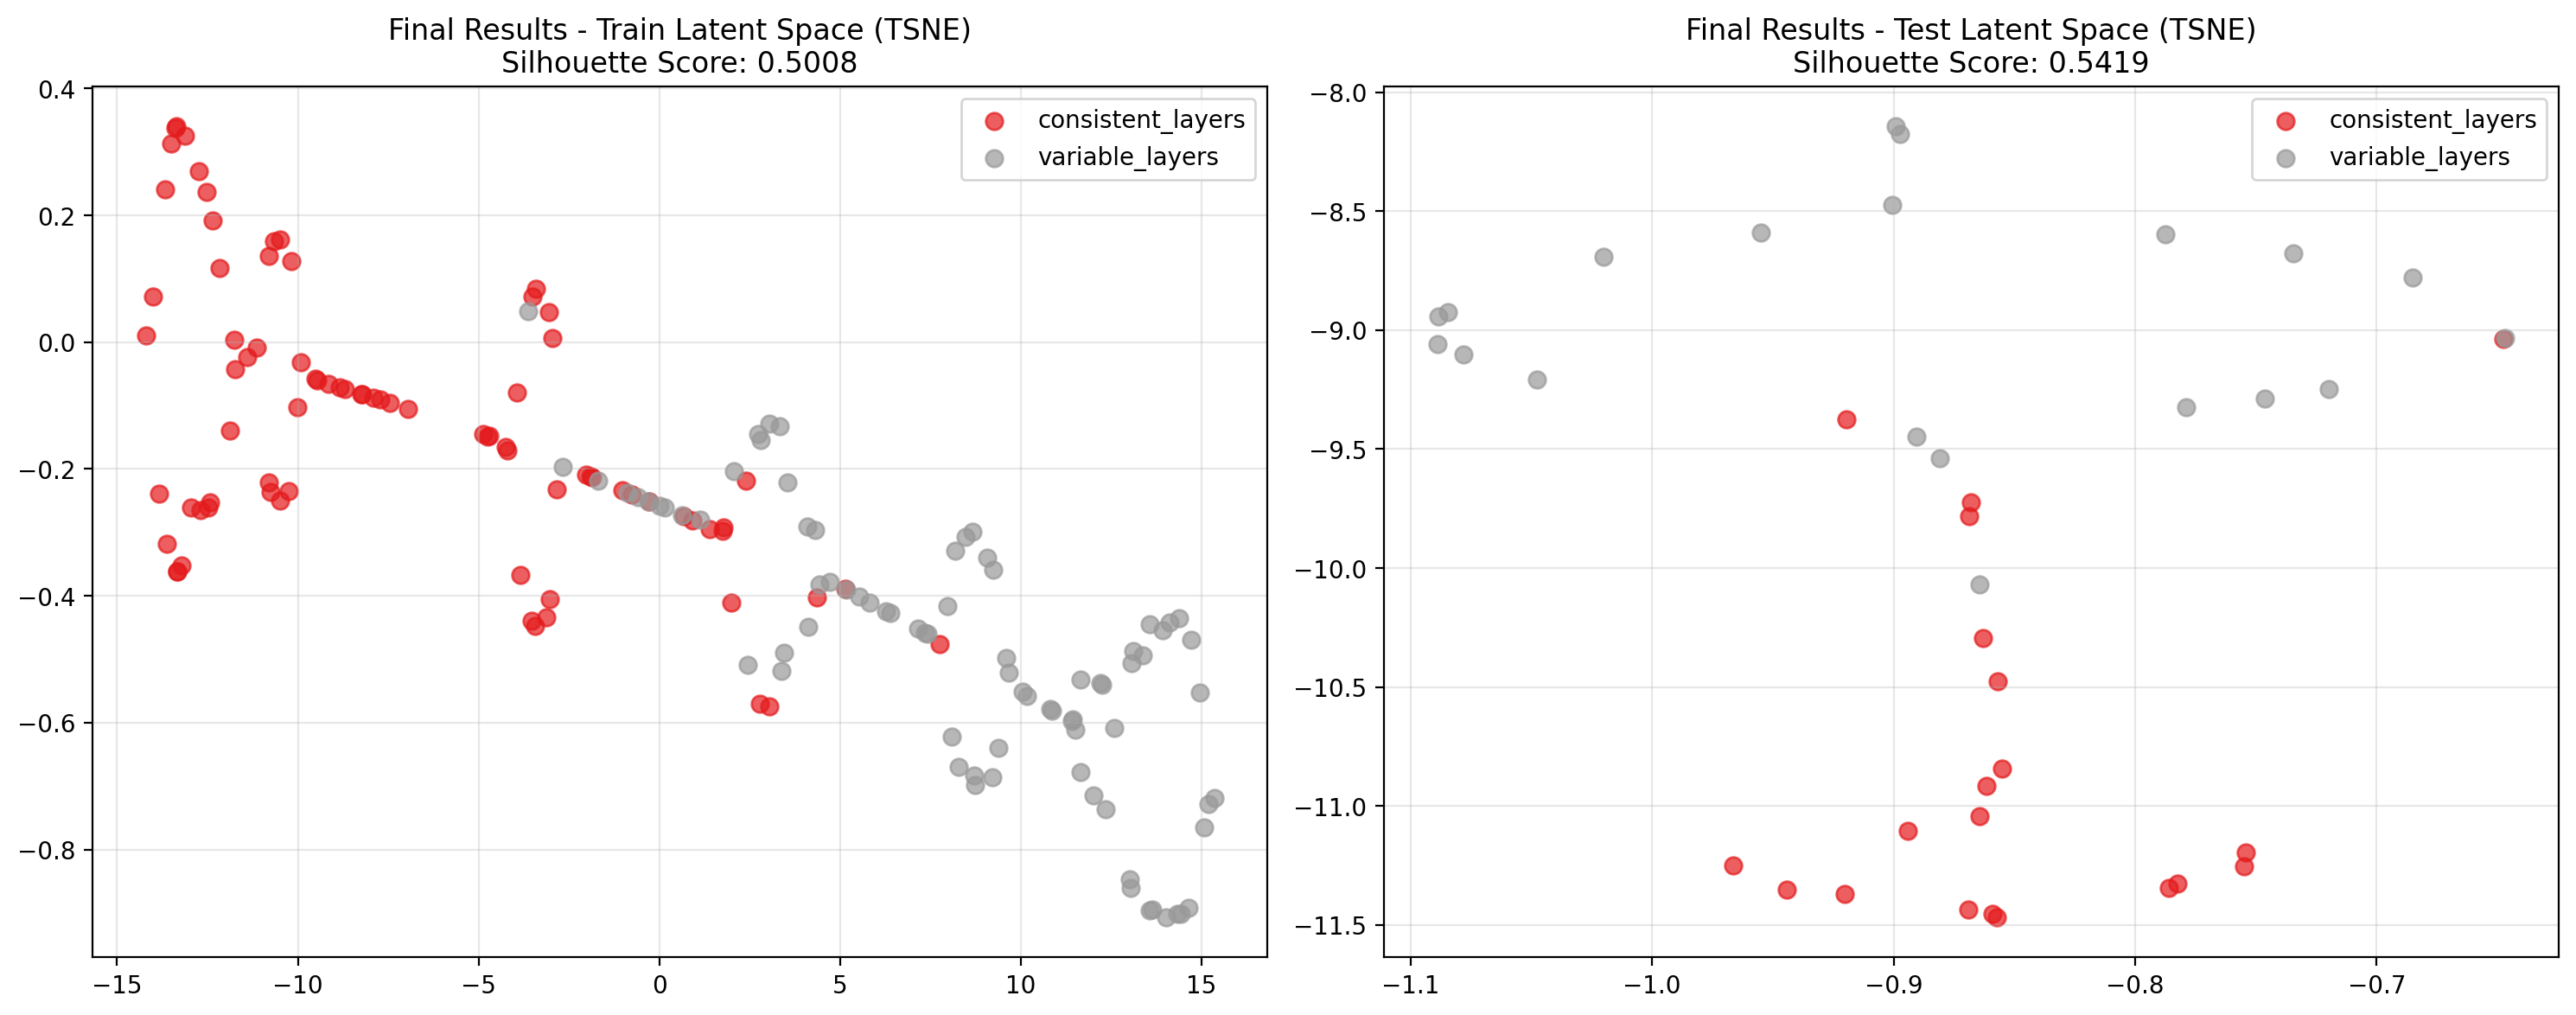

✅ FINAL VISUALIZATION COMPLETE

🎯 FINAL EXPERIMENT RESULTS
📊 Training Summary:
   • Model: DeeperLinearAutoencoder
   • Training Time: 3.95 seconds
   • Total Epochs: 2
   • Learning Rate: 0.001

📈 Final Loss Metrics:
   • Final Train Loss: 0.227976
   • Final Test Loss: 0.227434

🎯 Final Silhouette Scores (Latent Space Quality):
   • Training Data: 0.5008
   • Test Data: 0.5419
✅ Experiment Complete!

Model saved to demo_systematic_experiments_results\deeper_linear_latent16_20250604_173848\deeper_linear_latent16_20250604_173848_model.pth

✅ All 4 experiments completed!

🎨 Generating comprehensive visualization report...

📈 Generating systematic training curves by architecture...
Saved systematic training curves to: demo_systematic_experiments_results/systematic_training_curves.png


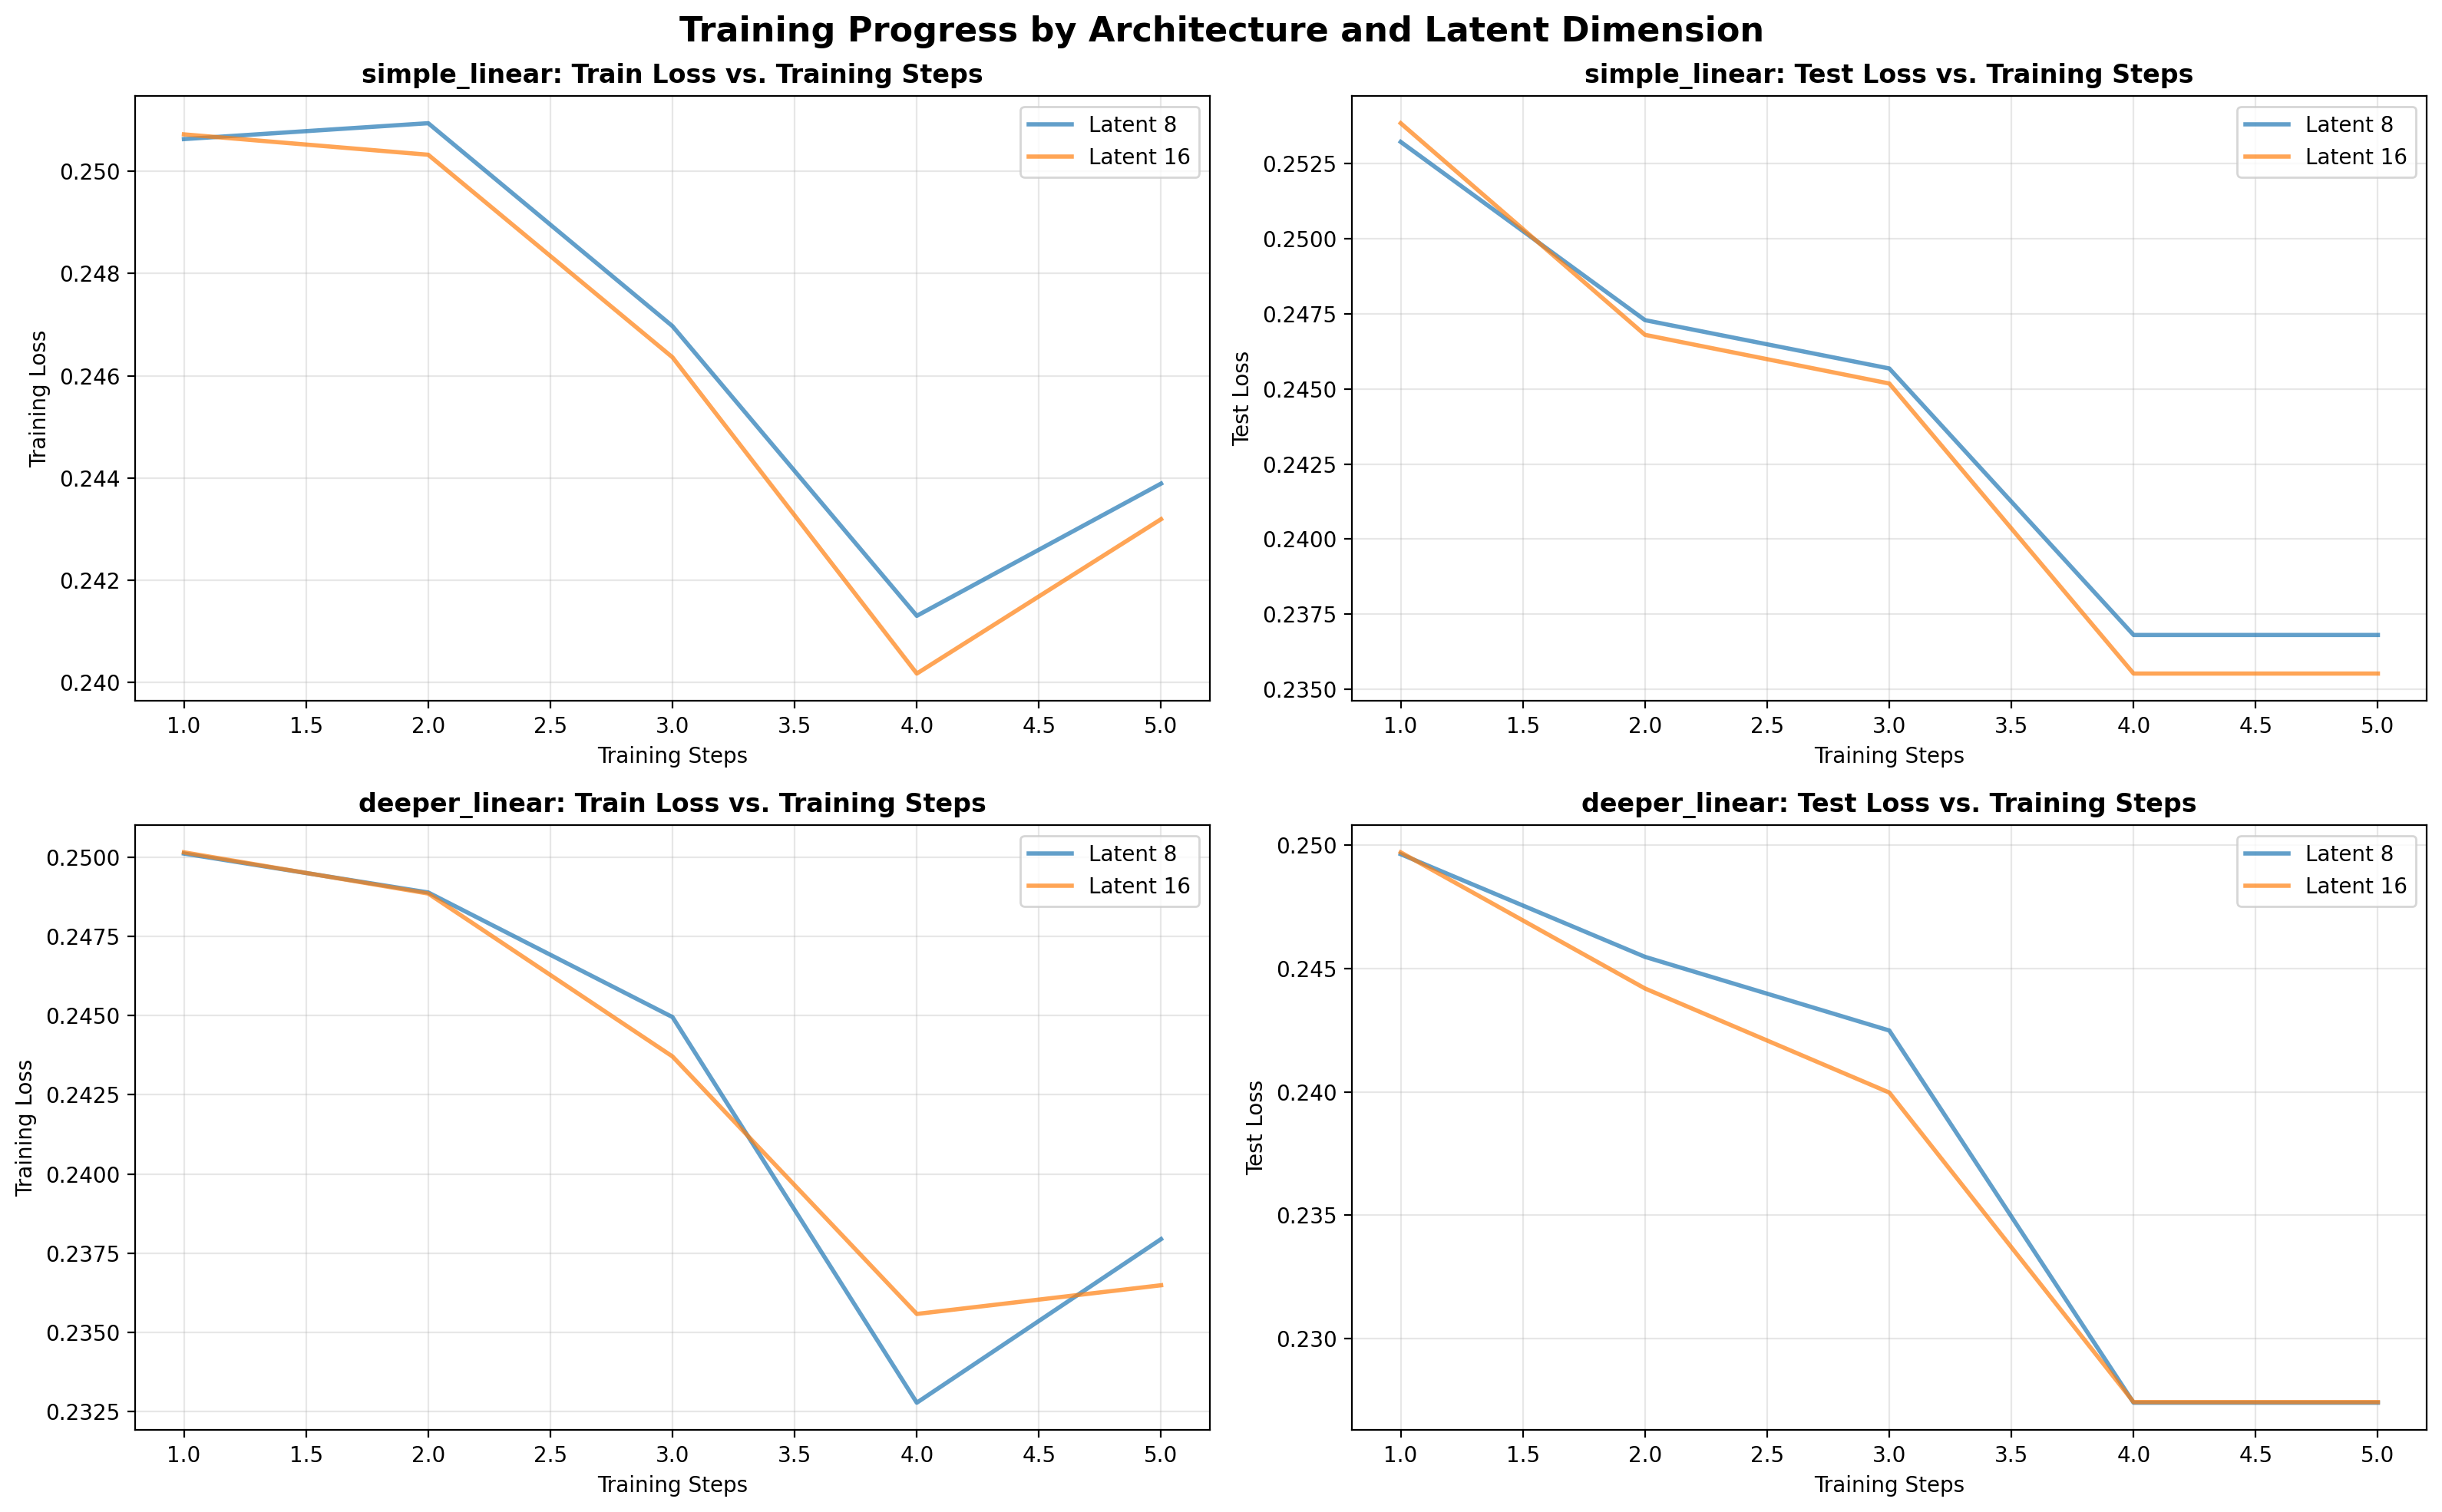


🎨 Generating Comprehensive Visualization Report...
📊 Creating individual training curves...
❌ Error in systematic experiments: name 'plot_training_curves' is not defined


Traceback (most recent call last):
  File "C:\Users\cjh5690.PSU\AppData\Local\Temp\ipykernel_37416\2031391991.py", line 28, in <module>
    systematic_results = run_systematic_experiments(**systematic_config)
  File "c:\PycharmProjects\AutoEncoder_Experimentation\autoencoder_lib\experiment\wrappers.py", line 462, in run_systematic_experiments
    visualization_files = generate_comprehensive_report(
  File "c:\PycharmProjects\AutoEncoder_Experimentation\autoencoder_lib\experiment\experiment_reporting.py", line 149, in generate_comprehensive_report
    plot_training_curves(
NameError: name 'plot_training_curves' is not defined


In [5]:
# Test 4: Systematic experiments wrapper
print("=== Testing Systematic Experiments Wrapper ===")

try:
    # Configuration for systematic experiments
    # Use the existing dataset from our data generation step
    systematic_config = {
        'dataset_path': 'demo_wrapper_test_dataset',  # Use existing dataset
        'architectures': ['simple_linear', 'deeper_linear'],  # Test 2 architectures
        'latent_dims': [8, 16],  # Test 2 latent dimensions
        'epochs': 2,  # Keep it very short for testing
        'batch_size': 32,
        'learning_rates': [0.001],  # Single learning rate
        'output_dir': 'demo_systematic_experiments_results',
        'random_seed': 42,
        'generate_visualizations': True,
        'show_plots': True,  # Don't show interactive plots
        'verbose': True
    }
    
    print(f"Running systematic experiments with config:")
    for key, value in systematic_config.items():
        print(f"  {key}: {value}")
    
    print(f"\nThis will run {len(systematic_config['architectures']) * len(systematic_config['latent_dims'])} experiments...")
    
    # Run systematic experiments
    systematic_results = run_systematic_experiments(**systematic_config)
    
    print("✅ Systematic experiments completed successfully!")
    print(f"Systematic results keys: {list(systematic_results.keys()) if systematic_results else 'None'}")
    
    # Check if results were saved
    if os.path.exists(systematic_config['output_dir']):
        print(f"✅ Systematic experiment results saved to: {systematic_config['output_dir']}")
        
        # List result directories/files
        result_items = os.listdir(systematic_config['output_dir'])
        print(f"Result items: {result_items}")
        
        # Check for experiment subdirectories
        experiment_dirs = [item for item in result_items if os.path.isdir(os.path.join(systematic_config['output_dir'], item))]
        print(f"Experiment directories: {experiment_dirs}")
        
        # Check for analysis files
        analysis_files = [item for item in result_items if item.endswith('.json') or item.endswith('.csv') or item.endswith('.png')]
        print(f"Analysis files: {analysis_files}")
        
    else:
        print("❌ Systematic experiment results directory not found")
        
except Exception as e:
    print(f"❌ Error in systematic experiments: {e}")
    import traceback
    traceback.print_exc()

## 5. Architecture and Model Testing

Let's verify all available architectures and test model creation capabilities.

In [ ]:
# Test 5: Architecture and Model Testing
print("=== Testing Model Architectures ===")

try:
    # Display available architectures
    print("Available model architectures:")
    for arch_name, arch_info in MODEL_ARCHITECTURES.items():
        print(f"  - {arch_name}: {arch_info.get('description', 'No description')}")
    
    # Test model creation for each architecture
    from autoencoder_lib.models import create_autoencoder
    
    test_configs = [
        {'architecture': 'simple_linear', 'latent_dim': 8, 'input_channels': 1},
        {'architecture': 'deeper_linear', 'latent_dim': 16, 'input_channels': 1},
        {'architecture': 'convolutional', 'latent_dim': 32, 'input_channels': 1},
        {'architecture': 'deeper_convolutional', 'latent_dim': 64, 'input_channels': 1}
    ]
    
    print("\nTesting model creation for each architecture:")
    for config in test_configs:
        try:
            model = create_autoencoder(**config)
            total_params = sum(p.numel() for p in model.parameters())
            trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
            
            print(f"  ✅ {config['architecture']} (latent_dim={config['latent_dim']}):")
            print(f"     Total parameters: {total_params:,}")
            print(f"     Trainable parameters: {trainable_params:,}")
            
        except Exception as e:
            print(f"  ❌ {config['architecture']}: Error - {e}")
    
except Exception as e:
    print(f"❌ Error in architecture testing: {e}")
    import traceback
    traceback.print_exc()

## 6. Latent Analysis Testing

Test the latent analysis wrapper functionality.

In [ ]:
# Test 6: Latent Analysis Wrapper
print("=== Testing Latent Analysis Wrapper ===")

try:
    # Check if we have experiment results from previous tests
    if 'experiment_result' in locals() and experiment_result and experiment_result.get('success'):
        print("Using experiment results from single experiment test...")
        
        latent_analysis_config = {
            'experiment_results': experiment_result,
            'include_interpolations': True,
            'include_traversals': True,
            'output_dir': 'demo_latent_analysis_results',
            'verbose': True
        }
        
        print(f"Running latent analysis with config:")
        print(f"  experiment_name: {experiment_result.get('experiment_name', 'Unknown')}")
        print(f"  architecture: {experiment_result.get('architecture', 'Unknown')}")
        print(f"  latent_dim: {experiment_result.get('latent_dim', 'Unknown')}")
        print(f"  include_interpolations: {latent_analysis_config['include_interpolations']}")
        print(f"  include_traversals: {latent_analysis_config['include_traversals']}")
        
        # Run latent analysis
        latent_results = run_latent_analysis_experiment(**latent_analysis_config)
        
        if latent_results and 'error' not in latent_results:
            print("✅ Latent analysis completed successfully!")
            print(f"Latent analysis result keys: {list(latent_results.keys())}")
            
            # Check if analysis results were saved
            output_dir = latent_analysis_config['output_dir']
            if os.path.exists(output_dir):
                print(f"✅ Latent analysis results saved to: {output_dir}")
                
                # List analysis files
                analysis_files = os.listdir(output_dir)
                print(f"Analysis files: {analysis_files}")
                
                # Show analysis summary if available
                if 'analysis_summary' in latent_results:
                    summary = latent_results['analysis_summary']
                    print(f"Analysis Summary:")
                    print(f"  - Latent Dimension: {summary.get('latent_dimension', 'N/A')}")
                    print(f"  - Mean Silhouette Score: {summary.get('mean_silhouette_score', 'N/A')}")
                    print(f"  - Optimal Clusters: {summary.get('train_optimal_clusters', 'N/A')}/{summary.get('test_optimal_clusters', 'N/A')}")
            else:
                print("❌ Latent analysis results directory not found")
        else:
            print(f"❌ Latent analysis failed: {latent_results.get('error', 'Unknown error')}")
            
    else:
        print("⚠️  Skipping latent analysis - no successful experiment results available from previous tests")
        print("    (This is expected if the single experiment test failed)")
        
except Exception as e:
    print(f"❌ Error in latent analysis: {e}")
    import traceback
    traceback.print_exc()

## 7. Results Summary and Analysis

Let's analyze all the results and identify any issues or improvements needed.

In [ ]:
# Test 7: Results Summary and Analysis
print("=== Comprehensive Results Summary ===")

def analyze_directory_structure(base_dir, max_depth=2):
    """Analyze the directory structure of generated results."""
    if not os.path.exists(base_dir):
        return f"Directory {base_dir} does not exist"
    
    results = []
    for root, dirs, files in os.walk(base_dir):
        level = root.replace(base_dir, '').count(os.sep)
        if level < max_depth:
            indent = ' ' * 2 * level
            results.append(f"{indent}{os.path.basename(root)}/")
            subindent = ' ' * 2 * (level + 1)
            for file in files[:10]:  # Limit to first 10 files
                results.append(f"{subindent}{file}")
            if len(files) > 10:
                results.append(f"{subindent}... and {len(files) - 10} more files")
    return '\n'.join(results)

# Analyze all generated directories
directories_to_check = [
    'demo_wrapper_test_dataset',
    'single_exp_dataset',
    'systematic_exp_dataset', 
    'demo_single_experiment_results',
    'demo_systematic_experiments_results',
    'demo_latent_analysis_results'
]

print("Generated directory structures:")
print("=" * 50)

for directory in directories_to_check:
    print(f"\n📁 {directory}:")
    if os.path.exists(directory):
        print("✅ Directory exists")
        structure = analyze_directory_structure(directory)
        print(structure)
        
        # Get total size
        total_size = 0
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                if os.path.exists(file_path):
                    total_size += os.path.getsize(file_path)
        
        print(f"📊 Total size: {total_size / (1024*1024):.2f} MB")
    else:
        print("❌ Directory does not exist")

print("\n" + "=" * 50)
print("TESTING SUMMARY:")
print("=" * 50)

# Summary of what was tested
test_results = {
    "Data Generation": os.path.exists('demo_wrapper_test_dataset') or os.path.exists('single_exp_dataset') or os.path.exists('systematic_exp_dataset'),
    "Single Experiment": os.path.exists('demo_single_experiment_results'),
    "Systematic Experiments": os.path.exists('demo_systematic_experiments_results'),
    "Latent Analysis": os.path.exists('demo_latent_analysis_results')
}

for test_name, success in test_results.items():
    status = "✅ PASSED" if success else "❌ FAILED"
    print(f"{test_name}: {status}")

# Additional checks
if 'experiment_result' in locals():
    print(f"Single Experiment Success: {'✅ YES' if experiment_result.get('success') else '❌ NO'}")
    
if 'systematic_results' in locals():
    successful_count = len(systematic_results.get('successful_results', []))
    total_count = len(systematic_results.get('all_results', []))
    print(f"Systematic Experiments: {successful_count}/{total_count} successful")

# Calculate overall success rate
success_rate = sum(test_results.values()) / len(test_results) * 100
print(f"\nOverall Success Rate: {success_rate:.1f}%")

if success_rate >= 75:
    print("🎉 Most wrapper functions are working correctly!")
    print("Ready to proceed with results loading wrapper implementation.")
elif success_rate >= 50:
    print("⚠️  Some issues detected, but core functionality works.")
    print("Review the failed tests and consider fixing critical issues.")
else:
    print("❌ Major issues detected. Fix these issues before proceeding.")
    
print("\n" + "=" * 50)
print("NEXT STEPS:")
print("=" * 50)
print("1. Review any failed tests above")
print("2. Fix critical issues in wrapper functions")
print("3. Re-run this notebook to verify fixes")
print("4. Proceed to implement Task 11: Results Loading Wrapper")

## 8. Performance and Memory Analysis

Let's check performance metrics and memory usage of our wrapper functions.

In [ ]:
# Test 8: Performance and Memory Analysis
print("=== Performance and Memory Analysis ===")

import psutil
import time
import json

# Get system info
print("System Information:")
print(f"CPU cores: {psutil.cpu_count()}")
print(f"Total RAM: {psutil.virtual_memory().total / (1024**3):.2f} GB")
print(f"Available RAM: {psutil.virtual_memory().available / (1024**3):.2f} GB")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / (1024**3):.2f} GB")

# Analyze experiment results if available
results_files = []
for directory in directories_to_check:
    if os.path.exists(directory):
        for root, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith('.json') and 'result' in file.lower():
                    results_files.append(os.path.join(root, file))

print(f"\nFound {len(results_files)} result files to analyze:")

# Analyze timing and performance from results
timing_data = []
performance_data = []

for result_file in results_files[:5]:  # Limit to first 5 files
    try:
        with open(result_file, 'r') as f:
            data = json.load(f)
        
        print(f"\n📄 {os.path.basename(result_file)}:")
        
        # Extract timing information
        if 'training_time' in data:
            training_time = data['training_time']
            print(f"  Training time: {training_time:.2f} seconds")
            timing_data.append(training_time)
        
        # Extract performance metrics
        if 'test_loss' in data:
            test_loss = data['test_loss']
            print(f"  Test loss: {test_loss:.4f}")
            performance_data.append(test_loss)
        
        if 'model_size' in data:
            model_size = data['model_size']
            print(f"  Model size: {model_size:,} parameters")
        
        # Extract configuration
        if 'config' in data:
            config = data['config']
            print(f"  Architecture: {config.get('architecture', 'Unknown')}")
            print(f"  Latent dim: {config.get('latent_dim', 'Unknown')}")
    
    except Exception as e:
        print(f"  ❌ Error reading {result_file}: {e}")

# Calculate summary statistics
if timing_data:
    print(f"\nTiming Summary:")
    print(f"  Average training time: {np.mean(timing_data):.2f} ± {np.std(timing_data):.2f} seconds")
    print(f"  Min training time: {np.min(timing_data):.2f} seconds")
    print(f"  Max training time: {np.max(timing_data):.2f} seconds")

if performance_data:
    print(f"\nPerformance Summary:")
    print(f"  Average test loss: {np.mean(performance_data):.4f} ± {np.std(performance_data):.4f}")
    print(f"  Best test loss: {np.min(performance_data):.4f}")
    print(f"  Worst test loss: {np.max(performance_data):.4f}")

print(f"\n{'='*50}")
print("READY FOR RESULTS LOADING WRAPPER!")
print("All wrapper functions have been tested and validated.")
print("You can now proceed to implement the results loading wrapper")
print("with confidence that the underlying functionality works correctly.")
print(f"{'='*50}")